### Data Analysis with Pandas

* Merging and Concatenating Dataframes
    * Merge multiple dataframes using common columns/keys using pd.merge()
    * Concatenate dataframes using pd.concat()

* Indexing and Selecting Data

    * Select rows from a dataframe
    * Select columns from a dataframe
    * Select subsets of dataframes 
    * Position and Label Based Indexing: df.iloc and df.loc
        *  You have seen some ways of selecting rows and columns from dataframes. Let's now see some other ways of indexing dataframes, which pandas recommends, since they are more explicit (and less ambiguous).
        * There are two main ways of indexing dataframes:
                * Position based indexing using df.iloc
                * Label based indexing using df.loc
* Grouping and Summarising Dataframes
    * Grouping and aggregation are some of the most frequently used operations in data analysis, especially while doing exploratory data analysis (EDA), where comparing summary statistics across groups of data is common.
    
    * Grouping analysis can be thought of as having three parts:
        1. **Splitting** the data into groups (e.g. groups of customer segments, product categories, etc.)
        2. **Applying** a function to each group (e.g. mean or total sales of each customer segment)
        3. **Combining** the results into a data structure showing the summary statistics
* Features
    * Quantitative vs. categorical
* Filtering  
    * Masking
* Sorting 
    * Label sorting (values sorting)
    * Index sorting 
* Statistical  
    * Min,Max,Mean,Median,Mode.. etc
* Plotting  
* Saving


# 4. Merging  Dataframes

In [5]:
import pandas as pd
IPL_2020 = { "IPL Team" : ["RCB","CSK","MI","DC","RR"],
            "Matches Played" : [20, 19,12,10,15],
            "Matches Win"  : [15, 14, 5,9,10]    
}
df8 = pd.DataFrame(IPL_2020)
df8

,IPL Team,Matches Played,Matches Win
0,RCB,20,15
1,CSK,19,14
2,MI,12,5
3,DC,10,9
4,RR,15,10


In [6]:
IPL_2019 = { "IPL Team" : ["SRH", "RCB","CSK","DC","RR", "kkr"],
            "Matches Played" : [19,20, 19,12,10,15],
            "Matches Win"  : [18,15, 14, 5,9,10]    
}
df9 = pd.DataFrame(IPL_2019)
df9

,IPL Team,Matches Played,Matches Win
0,SRH,19,18
1,RCB,20,15
2,CSK,19,14
3,DC,12,5
4,RR,10,9
5,kkr,15,10


In [7]:
merged_files = pd.merge(df8,df9)
merged_files   # it gives only common records

,IPL Team,Matches Played,Matches Win
0,RCB,20,15
1,CSK,19,14


In [8]:
merged_files = pd.merge(df8,df9,on = "IPL Team" ) # IPL Team -- Based label 
merged_files

,IPL Team,Matches Played_x,Matches Win_x,Matches Played_y,Matches Win_y
0,RCB,20,15,20,15
1,CSK,19,14,19,14
2,DC,10,9,12,5
3,RR,15,10,10,9


In [9]:
merged_files = pd.merge(df8,df9, on = "IPL Team", how = "left") # df8 
merged_files

,IPL Team,Matches Played_x,Matches Win_x,Matches Played_y,Matches Win_y
0,RCB,20,15,20.0,15.0
1,CSK,19,14,19.0,14.0
2,MI,12,5,NaN,NaN
3,DC,10,9,12.0,5.0
4,RR,15,10,10.0,9.0


In [10]:
df8.columns

Index(['IPL Team', 'Matches Played', 'Matches Win'], dtype='object')

In [11]:
merged_files = pd.merge(df8,df9, on = "IPL Team", how = "right") # df9
merged_files

,IPL Team,Matches Played_x,Matches Win_x,Matches Played_y,Matches Win_y
0,RCB,20.0,15.0,20,15
1,CSK,19.0,14.0,19,14
2,DC,10.0,9.0,12,5
3,RR,15.0,10.0,10,9
4,SRH,NaN,NaN,19,18
5,kkr,NaN,NaN,15,10


In [12]:
merged_files = pd.merge(df8,df9, on = "IPL Team", how = "inner") # use intersection (common)of keys from both frames
merged_files

,IPL Team,Matches Played_x,Matches Win_x,Matches Played_y,Matches Win_y
0,RCB,20,15,20,15
1,CSK,19,14,19,14
2,DC,10,9,12,5
3,RR,15,10,10,9


In [13]:
merged_files = pd.merge(df8,df9, on = "IPL Team", how = "outer") # use union (all)of keys from both frames
merged_files

,IPL Team,Matches Played_x,Matches Win_x,Matches Played_y,Matches Win_y
0,RCB,20.0,15.0,20.0,15.0
1,CSK,19.0,14.0,19.0,14.0
2,MI,12.0,5.0,NaN,NaN
3,DC,10.0,9.0,12.0,5.0
4,RR,15.0,10.0,10.0,9.0
5,SRH,NaN,NaN,19.0,18.0
6,kkr,NaN,NaN,15.0,10.0


In [14]:
help(pd.merge)

Help on function merge in module pandas.core.reshape.merge:

merge(left, right, how: str = 'inner', on=None, left_on=None, right_on=None, left_index: bool = False, right_index: bool = False, sort: bool = False, suffixes=('_x', '_y'), copy: bool = True, indicator: bool = False, validate=None) -> 'DataFrame'
    Merge DataFrame or named Series objects with a database-style join.
    
    The join is done on columns or indexes. If joining columns on
    columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
    on indexes or indexes on a column or columns, the index will be passed on.
    
    Parameters
    ----------
    left : DataFrame
    right : DataFrame or named Series
        Object to merge with.
    how : {'left', 'right', 'outer', 'inner'}, default 'inner'
        Type of merge to be performed.
    
        * left: use only keys from left frame, similar to a SQL left outer join;
          preserve key order.
        * right: use only keys from right fra

# 5. Indexing and Selecting Data

In [15]:
market = pd.read_csv("https://raw.githubusercontent.com/APSSDC-Data-Analysis/Data-Analysis-batch8/main/Datasets/market_fact.csv")
market.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35,1219.87,26.30,0.38


In [16]:
market.shape

(8399, 10)

In [17]:
market[1000]   # market df is 2D data 

KeyError: 1000

In [18]:
market[1000:1001] # start:end

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
1000,Ord_1895,Prod_4,SHP_2601,Cust_686,2433.55,0.05,23,355.93,8.08,0.57


In [19]:
market[100:1000:100] # step is 100

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
100,Ord_1638,Prod_8,SHP_5892,Cust_1433,220.79,0.00,7,-91.51,4.00,0.74
200,Ord_2725,Prod_9,SHP_3735,Cust_997,806.08,0.08,31,402.37,1.39,0.38
300,Ord_5180,Prod_9,SHP_7237,Cust_1756,862.64,0.04,23,122.11,14.72,0.40
400,Ord_4168,Prod_5,SHP_5808,Cust_1418,301.60,0.01,30,-24.93,6.22,0.55
500,Ord_1127,Prod_3,SHP_1554,Cust_434,136.85,0.01,14,-4.43,5.60,0.36
600,Ord_4841,Prod_6,SHP_6752,Cust_1675,208.47,0.01,29,-125.60,8.74,0.36
700,Ord_2839,Prod_5,SHP_3904,Cust_1048,3491.06,0.09,27,921.70,24.49,0.59
800,Ord_2375,Prod_12,SHP_3263,Cust_939,90.15,0.07,13,33.05,0.49,0.38
900,Ord_1193,Prod_3,SHP_1646,Cust_443,191.36,0.05,37,-82.09,4.97,0.38


In [20]:
market.sample(2)

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
3166,Ord_5258,Prod_2,SHP_7341,Cust_1777,304.52,0.04,14,25.34,5.94,0.50
8150,Ord_3337,Prod_13,SHP_4630,Cust_1187,48.83,0.06,23,1.00,0.70,0.57


In [23]:
market.set_index("Ord_id", inplace = True)  # setting index

In [24]:
market.head()

,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
Ord_id,,,,,,,,,
Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56
Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54
Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59
Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37
Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35,1219.87,26.30,0.38


In [25]:
market.reset_index()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.8100,0.01,23,-30.51,3.60,0.56
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.2700,0.01,13,4.56,0.93,0.54
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.6900,0.00,26,1148.90,2.50,0.59
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.8900,0.09,43,729.34,14.30,0.37
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.1500,0.08,35,1219.87,26.30,0.38
...,...,...,...,...,...,...,...,...,...,...
8394,Ord_5353,Prod_4,SHP_7479,Cust_1798,2841.4395,0.08,28,374.63,7.69,0.59
8395,Ord_5411,Prod_6,SHP_7555,Cust_1798,127.1600,0.10,20,-74.03,6.92,0.37
8396,Ord_5388,Prod_6,SHP_7524,Cust_1798,243.0500,0.02,39,-70.85,5.35,0.40
8397,Ord_5348,Prod_15,SHP_7469,Cust_1798,3872.8700,0.03,23,565.34,30.00,0.62


In [26]:
# direct method to create index 
ind = pd.Index([12,34,45,67,78])
ind

Int64Index([12, 34, 45, 67, 78], dtype='int64')

In [27]:
list(ind)

[12, 34, 45, 67, 78]

In [29]:
# it convertes index object to list data
ind.tolist()

[12, 34, 45, 67, 78]

* Select rows from a dataframe
* Select columns from a dataframe
* Select subsets of dataframes

In [34]:
market[100:120]

,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
Ord_id,,,,,,,,,
Ord_1638,Prod_8,SHP_5892,Cust_1433,220.7900,0.00,7,-91.51,4.00,0.74
Ord_1638,Prod_7,SHP_2261,Cust_565,201.1400,0.08,37,-51.25,3.37,0.54
Ord_1557,Prod_2,SHP_2152,Cust_565,1736.5300,0.10,46,457.03,3.99,0.56
Ord_209,Prod_13,SHP_285,Cust_45,30.5100,0.09,11,-17.68,2.40,0.58
Ord_246,Prod_8,SHP_341,Cust_45,862.2000,0.10,29,-45.10,4.00,0.75
Ord_122,Prod_17,SHP_165,Cust_45,42.3100,0.06,2,-53.08,8.51,0.40
Ord_121,Prod_8,SHP_164,Cust_45,1143.4500,0.06,31,304.42,1.99,0.51
Ord_250,Prod_15,SHP_346,Cust_45,8901.7800,0.04,31,2795.36,24.49,NaN
Ord_122,Prod_3,SHP_166,Cust_45,152.6700,0.04,11,12.76,4.98,0.40


In [35]:
market.reset_index(inplace = True)

In [41]:
market["Ord_id"]  # ord_id column as series object

0       Ord_5446
1       Ord_5406
2       Ord_5446
3       Ord_5456
4       Ord_5485
          ...   
8394    Ord_5353
8395    Ord_5411
8396    Ord_5388
8397    Ord_5348
8398    Ord_5459
Name: Ord_id, Length: 8399, dtype: object

In [37]:
type(market["Ord_id"])

pandas.core.series.Series

In [42]:
market[["Ord_id", "Ship_id"]] # access subdf from df 

,Ord_id,Ship_id
0,Ord_5446,SHP_7609
1,Ord_5406,SHP_7549
2,Ord_5446,SHP_7610
3,Ord_5456,SHP_7625
4,Ord_5485,SHP_7664
...,...,...
8394,Ord_5353,SHP_7479
8395,Ord_5411,SHP_7555
8396,Ord_5388,SHP_7524
8397,Ord_5348,SHP_7469


In [39]:
type(market[["Ord_id"]])

pandas.core.frame.DataFrame

In [43]:
ind1 = pd.Index([12,34,45,67,78])
ind2 = pd.Index([34,54,23,56,76])
ind1 | ind2 # bitwise or --- union

Int64Index([12, 23, 34, 45, 54, 56, 67, 76, 78], dtype='int64')

In [44]:
ind1 & ind2   # bitwise and

Int64Index([34], dtype='int64')

In [45]:
ind ^ ind2   # symmetric difference

Int64Index([12, 23, 45, 54, 56, 67, 76, 78], dtype='int64')

In [46]:
market.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35,1219.87,26.30,0.38


In [47]:
market["Profit"][2]  # accessing single value from 2D data

1148.9

In [57]:
# access 100th record Profit and Order_Quantity
market[["Order_Quantity","Profit"]][100:101]


,Order_Quantity,Profit
100,7,-91.51


In [63]:
market["Profit"][100]

-91.51

In [64]:
market.at[100,"Profit"]  # where / Pointer   

-91.51

In [65]:
market[100:110]["Profit"] 

100     -91.51
101     -51.25
102     457.03
103     -17.68
104     -45.10
105     -53.08
106     304.42
107    2795.36
108      12.76
109     636.18
Name: Profit, dtype: float64

* Loc  --- Label indexing
* iLoc  --- Integer index

In [66]:
market.iloc[100]

Ord_id                  Ord_1638
Prod_id                   Prod_8
Ship_id                 SHP_5892
Cust_id                Cust_1433
Sales                     220.79
Discount                       0
Order_Quantity                 7
Profit                    -91.51
Shipping_Cost                  4
Product_Base_Margin         0.74
Name: 100, dtype: object

In [67]:
market.iloc[100:1000:200]

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
100,Ord_1638,Prod_8,SHP_5892,Cust_1433,220.79,0.00,7,-91.51,4.00,0.74
300,Ord_5180,Prod_9,SHP_7237,Cust_1756,862.64,0.04,23,122.11,14.72,0.40
500,Ord_1127,Prod_3,SHP_1554,Cust_434,136.85,0.01,14,-4.43,5.60,0.36
700,Ord_2839,Prod_5,SHP_3904,Cust_1048,3491.06,0.09,27,921.70,24.49,0.59
900,Ord_1193,Prod_3,SHP_1646,Cust_443,191.36,0.05,37,-82.09,4.97,0.38


In [70]:
market.loc[3, "Profit"]

729.34

In [71]:
market.loc[[100,110],"Profit"]

100    -91.51
110    519.25
Name: Profit, dtype: float64

In [72]:
market.loc[[100,101,1000],["Profit","Ord_id"]]  # getting sub dataframe

,Profit,Ord_id
100,-91.51,Ord_1638
101,-51.25,Ord_1638
1000,355.93,Ord_1895


# 6. Grouping and Summarising Dataframes

In [73]:
market.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35,1219.87,26.30,0.38


In [76]:
len(market["Ord_id"].value_counts())

5506

In [77]:
market["Ord_id"].value_counts()

Ord_542     6
Ord_2506    6
Ord_2164    5
Ord_996     5
Ord_56      5
           ..
Ord_4607    1
Ord_1716    1
Ord_2672    1
Ord_2297    1
Ord_4251    1
Name: Ord_id, Length: 5506, dtype: int64

In [78]:
market.shape

(8399, 10)

In [79]:
# 1. Splitting data into group
df_group_market = market.groupby("Ord_id")
df_group_market

In [81]:
df_group_market.get_group("Ord_542")

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
4365,Ord_542,Prod_3,SHP_736,Cust_188,47.79,0.04,12,-57.75,6.83,0.38
4368,Ord_542,Prod_8,SHP_733,Cust_188,446.46,0.04,22,-1.88,4.00,0.60
4374,Ord_542,Prod_3,SHP_735,Cust_188,1252.89,0.05,31,339.75,10.55,0.37
4377,Ord_542,Prod_1,SHP_735,Cust_188,63.84,0.02,3,-47.97,17.78,0.59
4379,Ord_542,Prod_3,SHP_734,Cust_188,331.83,0.05,46,-101.25,6.05,0.39
4383,Ord_542,Prod_3,SHP_733,Cust_188,31.01,0.03,4,-4.49,2.99,0.35


In [83]:
# 2. Applying Functions
df_group_market.get_group("Ord_542")["Shipping_Cost"].sum()

48.2

In [86]:
# 3. combing into data structure
df_group_market["Shipping_Cost"].sum()

Ord_id
Ord_1       35.00
Ord_10       2.99
Ord_100      1.99
Ord_1000     6.47
Ord_1001     8.66
            ...  
Ord_995      8.99
Ord_996     35.99
Ord_997     24.49
Ord_998     30.49
Ord_999     30.00
Name: Shipping_Cost, Length: 5506, dtype: float64

In [88]:
pd.DataFrame(df_group_market["Profit"].sum())

,Profit
Ord_id,
Ord_1,-213.25
Ord_10,-4.72
Ord_100,-118.82
Ord_1000,31.74
Ord_1001,100.80
...,...
Ord_995,2311.96
Ord_996,884.95
Ord_997,285.11


In [89]:
df_group_market.first()

,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
Ord_id,,,,,,,,,
Ord_1,Prod_1,SHP_1,Cust_1,261.5400,0.04,6,-213.25,35.00,0.80
Ord_10,Prod_3,SHP_13,Cust_10,80.6100,0.02,15,-4.72,2.99,0.37
Ord_100,Prod_8,SHP_138,Cust_58,121.1200,0.10,3,-118.82,1.99,0.44
Ord_1000,Prod_6,SHP_1384,Cust_373,334.7100,0.01,25,31.74,6.47,0.38
Ord_1001,Prod_5,SHP_1385,Cust_374,1981.2600,0.07,49,100.80,8.66,0.76
...,...,...,...,...,...,...,...,...,...
Ord_995,Prod_4,SHP_1376,Cust_370,7965.9025,0.01,46,2311.96,8.99,0.60
Ord_996,Prod_13,SHP_1378,Cust_371,41.9700,0.05,12,-37.03,4.20,0.56
Ord_997,Prod_14,SHP_1379,Cust_365,28761.5200,0.04,8,285.11,24.49,0.37


In [90]:
df_group_market.last()  # accessing each and every ord id last record 

,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
Ord_id,,,,,,,,,
Ord_1,Prod_1,SHP_1,Cust_1,261.5400,0.04,6,-213.25,35.00,0.80
Ord_10,Prod_3,SHP_13,Cust_10,80.6100,0.02,15,-4.72,2.99,0.37
Ord_100,Prod_8,SHP_138,Cust_58,121.1200,0.10,3,-118.82,1.99,0.44
Ord_1000,Prod_6,SHP_1384,Cust_373,334.7100,0.01,25,31.74,6.47,0.38
Ord_1001,Prod_5,SHP_1385,Cust_374,1981.2600,0.07,49,100.80,8.66,0.76
...,...,...,...,...,...,...,...,...,...
Ord_995,Prod_4,SHP_1376,Cust_370,7965.9025,0.01,46,2311.96,8.99,0.60
Ord_996,Prod_7,SHP_1378,Cust_371,35.6400,0.05,10,-0.71,1.63,0.36
Ord_997,Prod_14,SHP_1379,Cust_365,28761.5200,0.04,8,285.11,24.49,0.37


In [92]:
for name,group in df_group_market:
    print(name,"****", group)

Ord_1 ****      Ord_id Prod_id Ship_id Cust_id   Sales  Discount  Order_Quantity  Profit  \
5858  Ord_1  Prod_1   SHP_1  Cust_1  261.54      0.04               6 -213.25   

      Shipping_Cost  Product_Base_Margin  
5858           35.0                  0.8  
Ord_10 ****       Ord_id Prod_id Ship_id  Cust_id  Sales  Discount  Order_Quantity  \
1770  Ord_10  Prod_3  SHP_13  Cust_10  80.61      0.02              15   

      Profit  Shipping_Cost  Product_Base_Margin  
1770   -4.72           2.99                 0.37  
Ord_100 ****        Ord_id Prod_id  Ship_id  Cust_id   Sales  Discount  Order_Quantity  \
5675  Ord_100  Prod_8  SHP_138  Cust_58  121.12       0.1               3   

      Profit  Shipping_Cost  Product_Base_Margin  
5675 -118.82           1.99                 0.44  
Ord_1000 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
7384  Ord_1000  Prod_6  SHP_1384  Cust_373  334.71      0.01              25   

      Profit  Shipping_Cost  Pro

Ord_1020 ****         Ord_id Prod_id   Ship_id    Cust_id     Sales  Discount  \
5962  Ord_1020  Prod_3  SHP_1410   Cust_386   562.800      0.02   
5974  Ord_1020  Prod_5  SHP_4314  Cust_1143  4039.720      0.02   
5976  Ord_1020  Prod_8  SHP_4313  Cust_1143  4584.730      0.07   
5977  Ord_1020  Prod_4  SHP_4314  Cust_1143  2570.944      0.03   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
5962              36  -17.45           9.73                 0.36  
5974              44 -237.60          39.61                 0.67  
5976              27  812.38          19.99                 0.48  
5977              25  553.36           5.92                 0.58  
Ord_1021 ****         Ord_id  Prod_id   Ship_id   Cust_id    Sales  Discount  \
5328  Ord_1021  Prod_15  SHP_1411  Cust_387  5544.99      0.04   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
5328              43 -3404.24          130.0                 0.78  
Ord_1022 ****        Ord_id Prod

4652 -127.23           5.89                 0.75  
Ord_1052 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
1209  Ord_1052  Prod_3  SHP_1451  Cust_398  438.47      0.02              14   

      Profit  Shipping_Cost  Product_Base_Margin  
1209  157.89           2.99                 0.35  
Ord_1053 ****         Ord_id  Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
5161  Ord_1053  Prod_13  SHP_1453  Cust_402   88.70      0.06              33   
5162  Ord_1053   Prod_8  SHP_1452  Cust_402  230.72      0.08              11   
5163  Ord_1053   Prod_1  SHP_1453  Cust_402  142.15      0.09              10   
5164  Ord_1053  Prod_16  SHP_1454  Cust_402  262.78      0.04              23   
5165  Ord_1053   Prod_6  SHP_1453  Cust_402  293.47      0.06              45   

      Profit  Shipping_Cost  Product_Base_Margin  
5161  -89.13           4.28                 0.44  
5162  -68.76           5.99                 0.65  
5163  -58.18      

Ord_1077 ****         Ord_id Prod_id   Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
5171  Ord_1077  Prod_1  SHP_1490  Cust_411   523.58      0.01               3   
5172  Ord_1077  Prod_8  SHP_1489  Cust_411  1307.35      0.05              43   

      Profit  Shipping_Cost  Product_Base_Margin  
5171 -179.36          19.99                 0.66  
5172 -154.24           8.65                 0.74  
Ord_1078 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
1214  Ord_1078  Prod_3  SHP_1491  Cust_413  257.97      0.03              19   

      Profit  Shipping_Cost  Product_Base_Margin  
1214   33.18           4.98                  0.4  
Ord_1079 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
1173  Ord_1079  Prod_3  SHP_1492  Cust_414  619.77      0.02              42   

      Profit  Shipping_Cost  Product_Base_Margin  
1173   50.24           7.17                 0.38  
Ord_108 ****        Ord_id  Prod_id

5097              26     3.92           7.27                 0.38  
Ord_1102 ****         Ord_id  Prod_id   Ship_id   Cust_id    Sales  Discount  \
3731  Ord_1102   Prod_8  SHP_1522  Cust_427    54.80      0.00   
3732  Ord_1102  Prod_13  SHP_1523  Cust_427  1038.19      0.07   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
3731               5  -15.30           1.99                 0.43  
3732              40  230.69           4.08                 0.57  
Ord_1103 ****         Ord_id  Prod_id   Ship_id   Cust_id  Sales  Discount  Order_Quantity  \
5012  Ord_1103  Prod_13  SHP_1524  Cust_410  51.75      0.05               9   

      Profit  Shipping_Cost  Product_Base_Margin  
5012    4.16            0.7                  0.6  
Ord_1104 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
5176  Ord_1104  Prod_2  SHP_1525  Cust_411  772.56      0.04              34   

      Profit  Shipping_Cost  Product_Base_Margin  
5176  143.87   

5487              50 -6474.65           60.0                  NaN  
Ord_1125 ****         Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
6799  Ord_1125   Prod_3  SHP_1552   Cust_432   372.69      0.01   
6802  Ord_1125  Prod_12  SHP_5193  Cust_1312    32.03      0.09   
6804  Ord_1125   Prod_2  SHP_5192  Cust_1312  1846.20      0.04   
6805  Ord_1125   Prod_6  SHP_5194  Cust_1312   185.82      0.05   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
6799              42 -177.03           8.94                 0.40  
6802              11    7.41           0.50                 0.37  
6804              26 -584.93          60.00                 0.41  
6805              44   11.45           2.26                 0.36  
Ord_1126 ****         Ord_id Prod_id   Ship_id   Cust_id  Sales  Discount  Order_Quantity  \
3590  Ord_1126  Prod_8  SHP_1553  Cust_433   65.5      0.08              11   

      Profit  Shipping_Cost  Product_Base_Margin  
3590  -55.94           

Ord_1147 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
1579  Ord_1147  Prod_5  SHP_1581  Cust_439  244.85      0.06              14   

      Profit  Shipping_Cost  Product_Base_Margin  
1579   38.06           8.99                 0.47  
Ord_1148 ****        Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
982  Ord_1148  Prod_5  SHP_1582  Cust_440  316.35      0.06              21   

     Profit  Shipping_Cost  Product_Base_Margin  
982  117.91           3.73                 0.46  
Ord_1149 ****        Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
981  Ord_1149  Prod_6  SHP_1583  Cust_440  109.37      0.07              11   

     Profit  Shipping_Cost  Product_Base_Margin  
981   25.96           1.79                 0.38  
Ord_115 ****        Ord_id Prod_id  Ship_id  Cust_id      Sales  Discount  Order_Quantity  \
2472  Ord_115  Prod_6  SHP_156  Cust_79   207.0800      0.09              48   
2473

4032   89.29           6.67                 0.49  
Ord_1171 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
4030  Ord_1171  Prod_1  SHP_1616  Cust_448  150.33      0.08              15   

      Profit  Shipping_Cost  Product_Base_Margin  
4030  -98.23           9.45                  0.6  
Ord_1172 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
1011  Ord_1172  Prod_6  SHP_1617  Cust_449  240.18      0.06              40   
1014  Ord_1172  Prod_1  SHP_1618  Cust_449  529.28      0.10              45   

      Profit  Shipping_Cost  Product_Base_Margin  
1011 -160.21           7.64                 0.36  
1014  -30.27           4.81                 0.58  
Ord_1173 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
1009  Ord_1173  Prod_6  SHP_1619  Cust_449  355.97      0.03               7   
1012  Ord_1173  Prod_3  SHP_1619  Cust_449  887.45      0.10              47   

      Pro

7128              24  2080.48          24.49                 0.55  
Ord_1199 ****         Ord_id  Prod_id   Ship_id   Cust_id  Sales  Discount  Order_Quantity  \
7129  Ord_1199  Prod_13  SHP_1654  Cust_458  14.49      0.09               3   

      Profit  Shipping_Cost  Product_Base_Margin  
7129  -12.58            5.0                 0.56  
Ord_12 ****      Ord_id Prod_id Ship_id  Cust_id   Sales  Discount  Order_Quantity  \
294  Ord_12  Prod_9  SHP_15  Cust_11  248.26      0.07              16   

     Profit  Shipping_Cost  Product_Base_Margin  
294    93.8           1.39                  0.4  
Ord_120 ****        Ord_id Prod_id  Ship_id  Cust_id  Sales  Discount  Order_Quantity  \
1325  Ord_120  Prod_1  SHP_163  Cust_82  387.0      0.01              30   

      Profit  Shipping_Cost  Product_Base_Margin  
1325  -31.45           6.13                 0.57  
Ord_1200 ****         Ord_id  Prod_id   Ship_id   Cust_id    Sales  Discount  \
7297  Ord_1200   Prod_7  SHP_3603  Cust_456   

5918 -121.75           7.07                 0.59  
Ord_1226 ****        Ord_id Prod_id   Ship_id   Cust_id      Sales  Discount  \
448  Ord_1226  Prod_4  SHP_1693  Cust_470  1297.4485      0.04   

     Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
448              18    4.21          10.78                 0.58  
Ord_1227 ****         Ord_id  Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
6385  Ord_1227  Prod_12  SHP_1694  Cust_464   79.44      0.06              27   
6389  Ord_1227   Prod_5  SHP_1695  Cust_464  110.03      0.06               5   

      Profit  Shipping_Cost  Product_Base_Margin  
6385   29.85           0.50                 0.39  
6389  -31.33          10.49                 0.49  
Ord_1228 ****         Ord_id  Prod_id   Ship_id   Cust_id    Sales  Discount  \
6913  Ord_1228  Prod_17  SHP_1697  Cust_473   851.24      0.10   
6916  Ord_1228  Prod_17  SHP_1696  Cust_473  2451.41      0.07   

      Order_Quantity  Profit  Shipping_Cost  P

Ord_1264 ****         Ord_id  Prod_id   Ship_id   Cust_id    Sales  Discount  \
6790  Ord_1264   Prod_7  SHP_1747  Cust_466    47.48      0.07   
6795  Ord_1264  Prod_11  SHP_1746  Cust_466  7556.61      0.08   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
6790              33    3.35            0.7                 0.37  
6795              18 -352.24          110.2                 0.67  
Ord_1265 ****         Ord_id  Prod_id   Ship_id   Cust_id     Sales  Discount  \
6791  Ord_1265  Prod_10  SHP_1748  Cust_466   8704.08      0.05   
6797  Ord_1265  Prod_14  SHP_1749  Cust_466  24051.49      0.07   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
6791              10  1034.54          44.55                 0.62  
6797              41  9791.04          24.49                 0.37  
Ord_1266 ****         Ord_id Prod_id   Ship_id   Cust_id     Sales  Discount  \
2923  Ord_1266  Prod_6  SHP_1750  Cust_477    21.460      0.05   
2925  Ord_1266  Prod

5590              48  3829.63          26.53                 0.56  
Ord_1288 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
6493  Ord_1288  Prod_6  SHP_1777  Cust_483  199.46      0.08              48   
6495  Ord_1288  Prod_5  SHP_1776  Cust_483  522.97      0.04              48   

      Profit  Shipping_Cost  Product_Base_Margin  
6493 -121.20           4.79                 0.40  
6495   29.98           5.40                 0.51  
Ord_1289 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
4923  Ord_1289  Prod_3  SHP_1778  Cust_454  513.74      0.02              32   
4926  Ord_1289  Prod_5  SHP_1779  Cust_454   36.80      0.00               4   

      Profit  Shipping_Cost  Product_Base_Margin  
4923  -28.68          10.13                 0.38  
4926   14.19           5.21                 0.56  
Ord_129 ****        Ord_id  Prod_id  Ship_id  Cust_id  Sales  Discount  Order_Quantity  \
3463  Ord_129  Prod_13  SH

Ord_132 ****       Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
859  Ord_132  Prod_5   SHP_179    Cust_67  465.83      0.10              49   
875  Ord_132  Prod_3  SHP_3976  Cust_1065  515.37      0.04              20   

     Profit  Shipping_Cost  Product_Base_Margin  
859  -79.72           6.22                 0.55  
875    9.82          12.98                 0.39  
Ord_1320 ****         Ord_id  Prod_id   Ship_id   Cust_id    Sales  Discount  \
7794  Ord_1320  Prod_10  SHP_1818  Cust_495  3363.14       0.1   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
7794              14   98.75          41.91                 0.59  
Ord_1321 ****         Ord_id  Prod_id   Ship_id   Cust_id     Sales  Discount  \
7736  Ord_1321  Prod_17  SHP_1819  Cust_486  16587.13      0.08   
7737  Ord_1321   Prod_6  SHP_1820  Cust_486    507.98      0.05   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
7736               7 -3476.86     

7735    8.33           1.93                 0.35  
Ord_1346 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
3678  Ord_1346  Prod_5  SHP_1850  Cust_501  153.44      0.05              12   

      Profit  Shipping_Cost  Product_Base_Margin  
3678   -6.15           6.02                 0.43  
Ord_1347 ****         Ord_id Prod_id   Ship_id   Cust_id      Sales  Discount  \
1581  Ord_1347  Prod_8  SHP_1851  Cust_514  4335.3400      0.07   
1584  Ord_1347  Prod_4  SHP_1852  Cust_514  1150.5345      0.01   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
1581              46  524.09          19.99                 0.52  
1584              15  361.65           1.25                 0.39  
Ord_1348 ****        Ord_id  Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
161  Ord_1348  Prod_13  SHP_1854  Cust_515   68.97      0.02              24   
162  Ord_1348   Prod_6  SHP_1853  Cust_515  199.80      0.08              31   



3528   21.77           6.22                 0.55  
Ord_1367 ****         Ord_id Prod_id   Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
4581  Ord_1367  Prod_2  SHP_1884  Cust_493  1562.97      0.01              34   

      Profit  Shipping_Cost  Product_Base_Margin  
4581  501.59           4.62                 0.56  
Ord_1368 ****         Ord_id  Prod_id   Ship_id   Cust_id    Sales  Discount  \
2115  Ord_1368  Prod_12  SHP_1885  Cust_527    66.19      0.02   
2126  Ord_1368   Prod_8  SHP_2873  Cust_803  1100.21      0.03   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
2115              22   15.84           0.99                 0.36  
2126              50  433.59           1.99                 0.43  
Ord_1369 ****         Ord_id  Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
2622  Ord_1369  Prod_12  SHP_1886  Cust_502  141.49      0.03              39   
2624  Ord_1369   Prod_6  SHP_1887  Cust_502  211.55      0.05              31   

Ord_1392 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
4716  Ord_1392  Prod_2  SHP_1922  Cust_539  514.86      0.09              50   

      Profit  Shipping_Cost  Product_Base_Margin  
4716  -53.18            4.5                 0.59  
Ord_1393 ****         Ord_id  Prod_id   Ship_id   Cust_id       Sales  Discount  \
5128  Ord_1393  Prod_15  SHP_1923  Cust_540  14521.3900      0.03   
5131  Ord_1393   Prod_4  SHP_1924  Cust_540   3925.9715      0.06   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
5128              44  5034.15          24.49                 0.55  
5131              39   671.95           8.80                 0.59  
Ord_1394 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
3074  Ord_1394  Prod_5  SHP_1925  Cust_508  894.64      0.01              31   

      Profit  Shipping_Cost  Product_Base_Margin  
3074  -27.79          19.46                 0.44  
Ord_1395 ****       

4148  -232.8            2.5                 0.83  
Ord_1421 ****         Ord_id  Prod_id   Ship_id   Cust_id    Sales  Discount  \
2845  Ord_1421  Prod_15  SHP_1964  Cust_487  5394.40      0.01   
2856  Ord_1421  Prod_15  SHP_1963  Cust_487  3945.95      0.03   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
2845              33   788.79          30.00                 0.62  
2856              31  1031.32          12.65                  NaN  
Ord_1422 ****         Ord_id Prod_id   Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
4865  Ord_1422  Prod_5  SHP_1965  Cust_543   233.92      0.10              27   
4867  Ord_1422  Prod_6  SHP_1966  Cust_543  1642.05      0.03              28   

      Profit  Shipping_Cost  Product_Base_Margin  
4865  -80.75           8.54                 0.43  
4867  829.73           4.86                 0.36  
Ord_1423 ****         Ord_id Prod_id   Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
2072  Ord_1423  Prod_4  SH

2859              27    2.73           5.63                 0.40  
Ord_1447 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
5519  Ord_1447  Prod_1  SHP_2000  Cust_519  476.06      0.04              33   

      Profit  Shipping_Cost  Product_Base_Margin  
5519 -120.48           9.37                 0.56  
Ord_1448 ****         Ord_id Prod_id   Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
5744  Ord_1448  Prod_1  SHP_2001  Cust_548  1756.11       0.1              29   

      Profit  Shipping_Cost  Product_Base_Margin  
5744 -888.07           35.0                  0.8  
Ord_1449 ****         Ord_id Prod_id   Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
2833  Ord_1449  Prod_8  SHP_2002  Cust_511   325.81      0.02               2   
2837  Ord_1449  Prod_3  SHP_2002  Cust_511  1136.47      0.10              10   

      Profit  Shipping_Cost  Product_Base_Margin  
2833 -522.78           6.50                 0.74  
2837  323.32     

7709  176.67          64.20                 0.59  
Ord_1470 ****         Ord_id Prod_id   Ship_id   Cust_id     Sales  Discount  \
3144  Ord_1470  Prod_4  SHP_2031  Cust_554  340.6885       0.0   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
3144              18  -10.85           4.81                 0.58  
Ord_1471 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
1238  Ord_1471  Prod_3  SHP_2032  Cust_489  709.91      0.09              37   

      Profit  Shipping_Cost  Product_Base_Margin  
1238  -93.43          12.79                 0.39  
Ord_1472 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
2655  Ord_1472  Prod_9  SHP_2033  Cust_492  365.24      0.09              44   

      Profit  Shipping_Cost  Product_Base_Margin  
2655 -163.13           8.29                 0.38  
Ord_1473 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
3148  Ord_1473  Prod

5894              29  -112.54           5.00                 0.55  
Ord_1492 ****         Ord_id  Prod_id   Ship_id   Cust_id    Sales  Discount  \
3108  Ord_1492   Prod_5  SHP_2062  Cust_503   235.12      0.09   
3111  Ord_1492  Prod_10  SHP_2063  Cust_503  1814.82      0.00   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
3108              49   -29.62           3.05                 0.52  
3111               2 -1128.66          44.55                 0.62  
Ord_1493 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
4173  Ord_1493  Prod_2  SHP_2064  Cust_556  318.56      0.08              30   

      Profit  Shipping_Cost  Product_Base_Margin  
4173  -30.97            4.5                 0.59  
Ord_1494 ****         Ord_id  Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
2542  Ord_1494  Prod_13  SHP_2065  Cust_529  1511.7      0.02              43   

      Profit  Shipping_Cost  Product_Base_Margin  
2542  221.

Ord_1520 ****        Ord_id Prod_id   Ship_id   Cust_id  Sales  Discount  Order_Quantity  \
151  Ord_1520  Prod_6  SHP_2099  Cust_498  30.47      0.02               4   

     Profit  Shipping_Cost  Product_Base_Margin  
151   -10.7           5.15                 0.36  
Ord_1521 ****        Ord_id  Prod_id   Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
314  Ord_1521  Prod_15  SHP_2100  Cust_560  2230.97      0.06              12   
315  Ord_1521   Prod_5  SHP_2101  Cust_560   200.77      0.01              25   

     Profit  Shipping_Cost  Product_Base_Margin  
314  273.27          26.20                 0.59  
315  -60.61           7.98                 0.42  
Ord_1522 ****         Ord_id  Prod_id   Ship_id   Cust_id    Sales  Discount  \
2020  Ord_1522  Prod_11  SHP_2103  Cust_512  2062.75      0.01   
2022  Ord_1522  Prod_10  SHP_2102  Cust_512    71.57      0.02   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
2020              32  559.59          19.

2627  -144.2            6.5                 0.79  
Ord_1554 ****         Ord_id Prod_id   Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
5890  Ord_1554  Prod_9  SHP_2148  Cust_555  1112.54      0.01              38   

      Profit  Shipping_Cost  Product_Base_Margin  
5890  352.96           8.23                 0.38  
Ord_1555 ****         Ord_id  Prod_id   Ship_id   Cust_id     Sales  Discount  \
2607  Ord_1555  Prod_17  SHP_2150  Cust_496  11277.05      0.01   
2610  Ord_1555  Prod_13  SHP_2149  Cust_496    110.64      0.06   
2620  Ord_1555   Prod_5  SHP_2149  Cust_496    125.31      0.00   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
2607              45  3497.45          17.86                 0.58  
2610              43   -62.60           2.40                 0.58  
2620              14    26.24           4.95                 0.41  
Ord_1556 ****         Ord_id Prod_id   Ship_id   Cust_id     Sales  Discount  \
6943  Ord_1556  Prod_4  SHP_2151  C

2875   50.16           0.71                 0.52  
Ord_1584 ****         Ord_id Prod_id   Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
1523  Ord_1584  Prod_3  SHP_2189  Cust_567   129.06      0.10              27   
1528  Ord_1584  Prod_8  SHP_2189  Cust_567  1236.64      0.01              43   

      Profit  Shipping_Cost  Product_Base_Margin  
1523  -75.13           4.97                 0.38  
1528  518.81           1.99                 0.40  
Ord_1585 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
6119  Ord_1585  Prod_5  SHP_2190  Cust_568  3234.1      0.03              32   

      Profit  Shipping_Cost  Product_Base_Margin  
6119  2033.5           8.99                 0.35  
Ord_1586 ****         Ord_id Prod_id   Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
2206  Ord_1586  Prod_4  SHP_2191  Cust_569  428.723      0.06               6   

      Profit  Shipping_Cost  Product_Base_Margin  
2206 -147.72           1.25      

Ord_1609 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
2675  Ord_1609  Prod_1  SHP_2222  Cust_500  460.71      0.02               6   

      Profit  Shipping_Cost  Product_Base_Margin  
2675 -231.95           35.0                  0.8  
Ord_161 ****        Ord_id Prod_id  Ship_id  Cust_id      Sales  Discount  Order_Quantity  \
5674  Ord_161  Prod_4  SHP_216  Cust_99  4688.9485       0.0              26   

       Profit  Shipping_Cost  Product_Base_Margin  
5674  1215.44           5.26                 0.56  
Ord_1610 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
2027  Ord_1610  Prod_5  SHP_2224  Cust_512   88.06      0.04              12   
2032  Ord_1610  Prod_8  SHP_2224  Cust_512  183.33      0.05              30   

      Profit  Shipping_Cost  Product_Base_Margin  
2027  -69.05           9.68                 0.44  
2032 -106.54           4.38                 0.75  
Ord_1611 ****         Ord_id Prod_id 

4844               6  -192.49          66.67                 0.65  
Ord_164 ****       Ord_id Prod_id  Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
703  Ord_164  Prod_8  SHP_221  Cust_101  538.22      0.01              48   

     Profit  Shipping_Cost  Product_Base_Margin  
703 -154.66            6.5                 0.64  
Ord_1640 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
2892  Ord_1640  Prod_5  SHP_2264  Cust_517   43.61      0.04               5   
2893  Ord_1640  Prod_6  SHP_2265  Cust_517  343.05      0.05              39   
2894  Ord_1640  Prod_6  SHP_2266  Cust_517   44.63      0.10               7   

      Profit  Shipping_Cost  Product_Base_Margin  
2892   22.85           4.00                 0.42  
2893   98.86           2.15                 0.40  
2894  -21.19           5.67                 0.36  
Ord_1641 ****         Ord_id Prod_id   Ship_id   Cust_id     Sales  Discount  \
6120  Ord_1641  Prod_4  SHP_2267  Cust_568  5

5127  122.42           6.88                 0.73  
Ord_1679 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
3981  Ord_1679  Prod_5  SHP_2323  Cust_530  562.91      0.10              46   
3982  Ord_1679  Prod_2  SHP_2322  Cust_530  505.20      0.05              12   

      Profit  Shipping_Cost  Product_Base_Margin  
3981 -560.29          14.37                 0.73  
3982   78.98           5.33                 0.57  
Ord_168 ****        Ord_id Prod_id  Ship_id  Cust_id      Sales  Discount  Order_Quantity  \
3986  Ord_168  Prod_1  SHP_227  Cust_61  18235.470      0.03              48   
3990  Ord_168  Prod_4  SHP_228  Cust_61   2631.107      0.00              16   

       Profit  Shipping_Cost  Product_Base_Margin  
3986  1166.93          99.00                 0.65  
3990   297.11          13.99                 0.57  
Ord_1680 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
2609  Ord_1680  Prod_6  SHP_2325  Cus

6225              25   14.11           2.04                 0.36  
Ord_1706 ****         Ord_id Prod_id   Ship_id   Cust_id      Sales  Discount  \
5532  Ord_1706  Prod_4  SHP_2364  Cust_576  6121.1985      0.08   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
5532              38  1312.34            2.5                 0.59  
Ord_1707 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
5657  Ord_1707  Prod_1  SHP_2365  Cust_585  614.34      0.02              44   

      Profit  Shipping_Cost  Product_Base_Margin  
5657  -171.7           9.37                 0.56  
Ord_1708 ****         Ord_id Prod_id   Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
5542  Ord_1708  Prod_4  SHP_2366  Cust_576  278.902      0.04              39   

      Profit  Shipping_Cost  Product_Base_Margin  
5542 -104.47           5.03                  0.6  
Ord_1709 ****         Ord_id Prod_id   Ship_id   Cust_id     Sales  Discount  \
7876  Ord_17

5646    4.41           1.99                 0.48  
Ord_1733 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
5540  Ord_1733  Prod_6  SHP_2396  Cust_576  792.21      0.05              43   

      Profit  Shipping_Cost  Product_Base_Margin  
5540   42.24           9.54                 0.37  
Ord_1734 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
5190  Ord_1734  Prod_6  SHP_2397  Cust_591  214.64      0.08              34   

      Profit  Shipping_Cost  Product_Base_Margin  
5190  -76.88           5.86                 0.36  
Ord_1735 ****         Ord_id  Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
5954  Ord_1735  Prod_16  SHP_2398  Cust_589  253.38       0.0              17   

      Profit  Shipping_Cost  Product_Base_Margin  
5954  -35.78           7.59                 0.56  
Ord_1736 ****         Ord_id  Prod_id   Ship_id   Cust_id    Sales  Discount  \
8279  Ord_1736   Prod_9  SHP_2400  C

5650              31  2081.48          24.49                 0.55  
Ord_1755 ****         Ord_id  Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
6220  Ord_1755   Prod_3  SHP_2433  Cust_578  577.42      0.00              42   
6221  Ord_1755  Prod_12  SHP_2434  Cust_578   95.08      0.06              20   

      Profit  Shipping_Cost  Product_Base_Margin  
6220  253.50           1.49                 0.35  
6221   39.91           0.50                 0.36  
Ord_1756 ****         Ord_id Prod_id   Ship_id   Cust_id  Sales  Discount  Order_Quantity  \
7277  Ord_1756  Prod_6  SHP_2435  Cust_580  82.21      0.04              25   

      Profit  Shipping_Cost  Product_Base_Margin  
7277   15.25           1.09                 0.39  
Ord_1757 ****         Ord_id  Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
6224  Ord_1757  Prod_13  SHP_2436  Cust_578  117.88       0.1              47   

      Profit  Shipping_Cost  Product_Base_Margin  
6224   -71.0      

1321 -517.47          11.37                 0.57  
Ord_1780 ****         Ord_id Prod_id   Ship_id   Cust_id     Sales  Discount  \
7236  Ord_1780  Prod_4  SHP_2467  Cust_587  706.3925      0.06   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
7236              39  346.14           0.99                 0.37  
Ord_1781 ****         Ord_id  Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
4859  Ord_1781  Prod_13  SHP_3869  Cust_579   46.42      0.04              21   
4863  Ord_1781   Prod_2  SHP_2468  Cust_579  154.99      0.07              24   

       Profit  Shipping_Cost  Product_Base_Margin  
4859     2.38            0.7                 0.57  
4863 -1085.52           49.0                 0.60  
Ord_1782 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
7329  Ord_1782  Prod_3  SHP_2469  Cust_596  115.78      0.07              32   
7333  Ord_1782  Prod_1  SHP_2469  Cust_596  210.22      0.00              13   


3558              16  -24.87           1.99                 0.55  
Ord_1801 ****        Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
694  Ord_1801  Prod_5  SHP_2494  Cust_611  461.55      0.09              14   
698  Ord_1801  Prod_3  SHP_2731  Cust_680  418.82      0.02              48   

     Profit  Shipping_Cost  Product_Base_Margin  
694  -12.00          19.99                 0.55  
698  -60.21           6.19                 0.38  
Ord_1802 ****        Ord_id  Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
693  Ord_1802  Prod_17  SHP_2495  Cust_611  799.98      0.04               9   
696  Ord_1802  Prod_11  SHP_2495  Cust_680  363.57      0.02               7   

     Profit  Shipping_Cost  Product_Base_Margin  
693   15.36          14.00                 0.36  
696   33.99          46.59                 0.67  
Ord_1803 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
1866  Ord_1803  Prod_5  SHP_2496

6737  -21.06           6.64                 0.70  
Ord_1822 ****         Ord_id  Prod_id   Ship_id   Cust_id  Sales  Discount  Order_Quantity  \
2676  Ord_1822  Prod_13  SHP_2516  Cust_627  71.32      0.08              42   

      Profit  Shipping_Cost  Product_Base_Margin  
2676    -4.9            1.0                  0.4  
Ord_1823 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
2964  Ord_1823  Prod_3  SHP_2517  Cust_628  750.86       0.0              33   
2965  Ord_1823  Prod_8  SHP_2766  Cust_704  379.78       0.1              48   

      Profit  Shipping_Cost  Product_Base_Margin  
2964  302.12           2.99                 0.36  
2965  -71.59           2.38                 0.74  
Ord_1824 ****        Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
653  Ord_1824  Prod_3  SHP_2518  Cust_629  215.31      0.09              14   

     Profit  Shipping_Cost  Product_Base_Margin  
653  -51.75          10.91               

Ord_1843 ****         Ord_id Prod_id   Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
1827  Ord_1843  Prod_4  SHP_2537  Cust_645  596.156       0.1              26   

      Profit  Shipping_Cost  Product_Base_Margin  
1827  -97.92           8.59                 0.56  
Ord_1844 ****         Ord_id  Prod_id   Ship_id    Cust_id   Sales  Discount  \
5405  Ord_1844   Prod_3  SHP_2538  Cust_1621   36.46      0.10   
5406  Ord_1844  Prod_13  SHP_2538   Cust_646   47.40      0.03   
5407  Ord_1844   Prod_2  SHP_2538   Cust_722  773.83      0.06   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
5405               4   -7.41           2.99                 0.39  
5406              18  -63.03           5.20                 0.41  
5407              19  146.79           5.33                 0.57  
Ord_1845 ****         Ord_id Prod_id   Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
5879  Ord_1845  Prod_3  SHP_2539  Cust_647   934.87      0.09              31  

6487   -1.25            1.2                 0.44  
Ord_1873 ****         Ord_id Prod_id   Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
4409  Ord_1873  Prod_3  SHP_2573  Cust_660  1193.65      0.07              29   

      Profit  Shipping_Cost  Product_Base_Margin  
4409  507.58           2.99                 0.36  
Ord_1874 ****         Ord_id  Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
7490  Ord_1874  Prod_13  SHP_2574  Cust_661   40.02      0.02               4   
7494  Ord_1874   Prod_3  SHP_2574  Cust_822  315.02      0.02              50   

      Profit  Shipping_Cost  Product_Base_Margin  
7490   -1.28           1.09                 0.43  
7494   95.16           1.49                 0.39  
Ord_1875 ****         Ord_id Prod_id   Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
3793  Ord_1875  Prod_8  SHP_2575  Cust_662  1895.55      0.06              46   

      Profit  Shipping_Cost  Product_Base_Margin  
3793  807.62           1.99    

4449   11.02           1.49                 0.39  
Ord_1897 ****         Ord_id  Prod_id   Ship_id   Cust_id    Sales  Discount  \
2807  Ord_1897   Prod_9  SHP_2603  Cust_689   229.43      0.08   
2813  Ord_1897  Prod_13  SHP_3081  Cust_864  1200.13      0.09   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
2807              28   61.09           2.50                 0.38  
2813              46   -7.80           8.99                 0.57  
Ord_1898 ****         Ord_id  Prod_id   Ship_id   Cust_id    Sales  Discount  \
8057  Ord_1898   Prod_7  SHP_2604  Cust_690   123.13      0.05   
8058  Ord_1898  Prod_15  SHP_2738  Cust_690  1425.21      0.10   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
8057              36   20.57           1.35                 0.40  
8058               9  -65.02          30.00                 0.62  
Ord_1899 ****         Ord_id Prod_id   Ship_id   Cust_id     Sales  Discount  \
2687  Ord_1899  Prod_4  SHP_2605  Cust_69

Ord_1918 ****         Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  \
3557  Ord_1918  Prod_1  SHP_2630   Cust_678  5072.34      0.06   
3560  Ord_1918  Prod_1  SHP_4137  Cust_1108   260.08      0.10   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
3557              36  369.46          19.99                 0.73  
3560              23  -37.85           4.81                 0.58  
Ord_1919 ****        Ord_id  Prod_id   Ship_id   Cust_id  Sales  Discount  Order_Quantity  \
414  Ord_1919  Prod_12  SHP_2631  Cust_701  45.63      0.02              12   

     Profit  Shipping_Cost  Product_Base_Margin  
414   15.42            0.5                 0.38  
Ord_192 ****        Ord_id Prod_id  Ship_id  Cust_id   Sales  Discount  Order_Quantity  \
5680  Ord_192  Prod_5  SHP_258  Cust_58  254.76      0.06               6   

      Profit  Shipping_Cost  Product_Base_Margin  
5680  109.88          14.45                 0.57  
Ord_1920 ****         Ord_id  Prod_id   Shi

412  -76.89          19.99                 0.41  
Ord_194 ****       Ord_id Prod_id  Ship_id  Cust_id   Sales  Discount  Order_Quantity  \
869  Ord_194  Prod_1  SHP_262  Cust_67  789.01      0.07               2   

     Profit  Shipping_Cost  Product_Base_Margin  
869 -539.59          11.37                 0.57  
Ord_1940 ****         Ord_id Prod_id   Ship_id   Cust_id     Sales  Discount  \
1107  Ord_1940  Prod_6  SHP_2787  Cust_719   64.2500      0.07   
1108  Ord_1940  Prod_4  SHP_2657  Cust_719  623.1265      0.09   
1109  Ord_1940  Prod_3  SHP_2786  Cust_719   62.6200      0.10   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
1107               5   -7.94           4.86                 0.38  
1108              38  122.29           0.99                 0.57  
1109              15  -67.06           6.27                 0.40  
Ord_1941 ****         Ord_id Prod_id   Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
1693  Ord_1941  Prod_1  SHP_2658  Cust_696

Ord_1964 ****         Ord_id Prod_id   Ship_id   Cust_id  Sales  Discount  Order_Quantity  \
2677  Ord_1964  Prod_5  SHP_2688  Cust_718   26.5      0.05               3   

      Profit  Shipping_Cost  Product_Base_Margin  
2677   20.12            4.0                 0.42  
Ord_1965 ****        Ord_id Prod_id   Ship_id   Cust_id  Sales  Discount  Order_Quantity  \
307  Ord_1965  Prod_3  SHP_2689  Cust_669  267.0      0.09              19   

     Profit  Shipping_Cost  Product_Base_Margin  
307   -2.83           7.17                 0.38  
Ord_1966 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
5577  Ord_1966  Prod_3  SHP_2690  Cust_733  265.75      0.06              25   

      Profit  Shipping_Cost  Product_Base_Margin  
5577    14.0           5.14                 0.36  
Ord_1967 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
5152  Ord_1967  Prod_3  SHP_2691  Cust_734  162.25      0.03              21   

  

5020              48 -433.29          29.21                 0.76  
Ord_1991 ****         Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
2937  Ord_1991  Prod_13  SHP_2720   Cust_667    24.72      0.06   
2941  Ord_1991   Prod_1  SHP_2720   Cust_872  2066.63      0.03   
2945  Ord_1991   Prod_8  SHP_6102  Cust_1495   900.06      0.05   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
2937               8  -21.47           3.50                 0.58  
2941              14   65.58          19.99                 0.73  
2945              12 -221.12          14.52                 0.65  
Ord_1992 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
2290  Ord_1992  Prod_6  SHP_2721  Cust_749  116.38      0.08              12   

      Profit  Shipping_Cost  Product_Base_Margin  
2290   29.68           2.03                 0.37  
Ord_1993 ****         Ord_id  Prod_id   Ship_id   Cust_id     Sales  Discount  \
2289  Ord_1993  Prod_11 

1453   37.33           0.99                 0.39  
Ord_2010 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
8128  Ord_2010  Prod_8  SHP_2748  Cust_760  282.58       0.1              36   

      Profit  Shipping_Cost  Product_Base_Margin  
8128   21.68           1.99                 0.52  
Ord_2011 ****        Ord_id Prod_id   Ship_id   Cust_id     Sales  Discount  Order_Quantity  \
657  Ord_2011  Prod_4  SHP_2750  Cust_756  324.3175      0.03              10   
658  Ord_2011  Prod_6  SHP_2749  Cust_756   61.5000      0.09              16   

     Profit  Shipping_Cost  Product_Base_Margin  
657 -169.74           5.00                 0.85  
658  -16.27           2.97                 0.35  
Ord_2012 ****         Ord_id  Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
2757  Ord_2012  Prod_17  SHP_2753  Cust_755  751.94      0.02               5   

      Profit  Shipping_Cost  Product_Base_Margin  
2757 -283.94          17.85         

2221              19   64.53           8.99                 0.56  
Ord_2037 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
7711  Ord_2037  Prod_4  SHP_2784  Cust_767  329.63      0.05               3   

      Profit  Shipping_Cost  Product_Base_Margin  
7711 -541.33           8.99                 0.59  
Ord_2038 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
6114  Ord_2038  Prod_3  SHP_2785  Cust_685  139.45      0.02              23   

      Profit  Shipping_Cost  Product_Base_Margin  
6114 -137.49           8.49                 0.39  
Ord_2039 ****         Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  \
6548  Ord_2039  Prod_1  SHP_2788   Cust_763  2617.13      0.00   
6549  Ord_2039  Prod_8  SHP_4151  Cust_1117   169.27      0.09   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
6548              39  368.87           6.88                 0.73  
6549               9  -68.93    

2420              19   45.54           30.0                 0.64  
Ord_2065 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
5699  Ord_2065  Prod_7  SHP_2826  Cust_780  100.95      0.05              17   
5705  Ord_2065  Prod_3  SHP_2826  Cust_780  218.27      0.03              34   

      Profit  Shipping_Cost  Product_Base_Margin  
5699  -21.30           3.37                 0.54  
5705  -44.14           4.92                 0.38  
Ord_2066 ****         Ord_id  Prod_id   Ship_id   Cust_id    Sales  Discount  \
2120  Ord_2066   Prod_5  SHP_2827  Cust_781   628.22      0.00   
2125  Ord_2066  Prod_11  SHP_2828  Cust_781  3366.10      0.07   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
2120              41  163.81           5.00                 0.49  
2125              24 -335.32          52.42                 0.74  
Ord_2067 ****         Ord_id  Prod_id   Ship_id   Cust_id    Sales  Discount  \
7158  Ord_2067   Prod_8  SHP_28

6602  -32.48          11.15                 0.37  
Ord_2087 ****         Ord_id  Prod_id   Ship_id    Cust_id      Sales  Discount  \
3766  Ord_2087   Prod_4  SHP_2856   Cust_794  1497.7595      0.04   
3772  Ord_2087  Prod_16  SHP_5481  Cust_1362    75.0300      0.02   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
3766              50  483.66           1.10                 0.55  
3772              22  -31.52           1.92                 0.84  
Ord_2088 ****         Ord_id  Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
5711  Ord_2088  Prod_11  SHP_2857  Cust_795  2811.7      0.09              41   

       Profit  Shipping_Cost  Product_Base_Margin  
5711 -3074.27           69.0                 0.68  
Ord_2089 ****         Ord_id Prod_id   Ship_id   Cust_id  Sales  Discount  Order_Quantity  \
5706  Ord_2089  Prod_2  SHP_2858  Cust_791  131.2      0.01              31   

      Profit  Shipping_Cost  Product_Base_Margin  
5706 -107.98         

Ord_2121 ****         Ord_id Prod_id   Ship_id   Cust_id  Sales  Discount  Order_Quantity  \
1383  Ord_2121  Prod_6  SHP_2897  Cust_786  123.1      0.06              19   

      Profit  Shipping_Cost  Product_Base_Margin  
1383  -75.44           7.37                 0.37  
Ord_2122 ****        Ord_id  Prod_id   Ship_id   Cust_id     Sales  Discount  \
713  Ord_2122  Prod_15  SHP_2898  Cust_783  12612.66      0.06   

     Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
713              37  3325.03           39.0                 0.55  
Ord_2123 ****         Ord_id Prod_id   Ship_id   Cust_id      Sales  Discount  \
8214  Ord_2123  Prod_4  SHP_2899  Cust_802  1564.1615       0.0   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
8214              20  682.48            2.5                 0.35  
Ord_2124 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
8334  Ord_2124  Prod_3  SHP_2900  Cust_790  926.85      0.09       

7256              39 -1008.73          75.23                 0.79  
Ord_2144 ****         Ord_id Prod_id   Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
8211  Ord_2144  Prod_1  SHP_2925  Cust_802  5318.89      0.06              48   

      Profit  Shipping_Cost  Product_Base_Margin  
8211  525.15           8.64                 0.78  
Ord_2145 ****         Ord_id Prod_id   Ship_id   Cust_id  Sales  Discount  Order_Quantity  \
5921  Ord_2145  Prod_6  SHP_2926  Cust_811  125.9      0.04              21   

      Profit  Shipping_Cost  Product_Base_Margin  
5921    5.85           3.04                 0.36  
Ord_2146 ****        Ord_id  Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
706  Ord_2146  Prod_13  SHP_2927  Cust_783  190.99       0.1              21   

     Profit  Shipping_Cost  Product_Base_Margin  
706  -27.15           4.82                 0.47  
Ord_2147 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
8295  Ord

Ord_2168 ****         Ord_id  Prod_id   Ship_id   Cust_id    Sales  Discount  \
1916  Ord_2168  Prod_11  SHP_2955  Cust_817  5288.89       0.0   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
1916              22  547.04          32.48                 0.68  
Ord_2169 ****         Ord_id Prod_id   Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
8328  Ord_2169  Prod_6  SHP_2956  Cust_810  1321.55       0.1              25   

      Profit  Shipping_Cost  Product_Base_Margin  
8328  448.24          10.75                 0.36  
Ord_217 ****        Ord_id  Prod_id  Ship_id  Cust_id    Sales  Discount  Order_Quantity  \
7889  Ord_217   Prod_2  SHP_301  Cust_71   199.86      0.03              49   
7891  Ord_217  Prod_17  SHP_301  Cust_71  1888.02      0.03              18   
7894  Ord_217   Prod_9  SHP_302  Cust_71   322.69      0.01              27   

      Profit  Shipping_Cost  Product_Base_Margin  
7889 -257.11           6.89                 0.60  
7891  19

8300  -19.06           6.72                 0.40  
Ord_2191 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
2054  Ord_2191  Prod_5  SHP_2987  Cust_820  203.49       0.0              33   

      Profit  Shipping_Cost  Product_Base_Margin  
2054   46.21            1.2                 0.74  
Ord_2192 ****         Ord_id Prod_id   Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
5664  Ord_2192  Prod_1  SHP_2989  Cust_812  5601.10      0.02              38   
5669  Ord_2192  Prod_3  SHP_2988  Cust_812   211.48      0.10              33   

       Profit  Shipping_Cost  Product_Base_Margin  
5664  1515.70          19.99                 0.56  
5669    18.15           2.99                 0.35  
Ord_2193 ****         Ord_id Prod_id   Ship_id   Cust_id  Sales  Discount  Order_Quantity  \
8019  Ord_2193  Prod_6  SHP_2990  Cust_818  21.01      0.03               2   

      Profit  Shipping_Cost  Product_Base_Margin  
8019  -13.13           8.19       

Ord_2213 ****         Ord_id  Prod_id   Ship_id   Cust_id    Sales  Discount  \
2762  Ord_2213   Prod_1  SHP_3012  Cust_845   150.33      0.10   
2764  Ord_2213   Prod_3  SHP_3118  Cust_845  2519.55      0.05   
2765  Ord_2213  Prod_13  SHP_3119  Cust_845  1634.17      0.05   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
2762              10  -47.88           4.53                 0.81  
2764              47  592.53          16.11                 0.39  
2765              46  232.80          13.89                 0.41  
Ord_2214 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
2149  Ord_2214  Prod_8  SHP_4140  Cust_1087  362.75      0.08              44   
2150  Ord_2214  Prod_6  SHP_3013   Cust_846  155.86      0.09              29   

      Profit  Shipping_Cost  Product_Base_Margin  
2149  -54.47           2.38                 0.74  
2150 -152.59           8.16                 0.40  
Ord_2215 ****         Ord_id  Prod_id   Sh

2294  -28.43           8.99                 0.59  
Ord_2244 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
5615  Ord_2244  Prod_5  SHP_3050  Cust_831  279.29      0.07              39   

      Profit  Shipping_Cost  Product_Base_Margin  
5615   14.15            4.0                 0.42  
Ord_2245 ****         Ord_id Prod_id   Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
5583  Ord_2245  Prod_6  SHP_3053  Cust_877  1734.72      0.04              48   

      Profit  Shipping_Cost  Product_Base_Margin  
5583   57.89          19.99                 0.38  
Ord_2246 ****        Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
178  Ord_2246  Prod_2  SHP_3054  Cust_878  294.52      0.09              14   

     Profit  Shipping_Cost  Product_Base_Margin  
178   15.34           5.94                  0.5  
Ord_2247 ****         Ord_id Prod_id   Ship_id   Cust_id     Sales  Discount  \
2403  Ord_2247  Prod_4  SHP_3055  Cust_8

5849  -99.55           5.89                 0.75  
Ord_2280 ****       Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
15  Ord_2280  Prod_5  SHP_3114  Cust_839  460.69      0.06              48   

    Profit  Shipping_Cost  Product_Base_Margin  
15 -103.48           7.29                 0.45  
Ord_2281 ****         Ord_id Prod_id   Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
1871  Ord_2281  Prod_1  SHP_3117  Cust_896  6863.95       0.1              41   

       Profit  Shipping_Cost  Product_Base_Margin  
1871  1662.92          19.99                 0.55  
Ord_2282 ****       Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
16  Ord_2282  Prod_9  SHP_3122  Cust_839  443.46      0.06              30   

    Profit  Shipping_Cost  Product_Base_Margin  
16  193.12           1.39                 0.38  
Ord_2283 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
4455  Ord_2283  Prod_3  SHP_3123  Cu

746   25.69            5.5                 0.51  
Ord_2303 ****         Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
7719  Ord_2303  Prod_15  SHP_3152   Cust_910  9517.60      0.09   
8307  Ord_2303  Prod_12  SHP_3748  Cust_1016    98.51      0.10   
8311  Ord_2303   Prod_8  SHP_3747  Cust_1016   904.93      0.08   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
7719              37 -1262.44           57.0                 0.78  
8307              21    45.93            0.5                 0.39  
8311              31   -53.40            4.0                 0.74  
Ord_2304 ****         Ord_id  Prod_id   Ship_id   Cust_id  Sales  Discount  Order_Quantity  \
6126  Ord_2304  Prod_13  SHP_3156  Cust_838  24.91       0.0               5   

      Profit  Shipping_Cost  Product_Base_Margin  
6126    -0.9           0.71                 0.52  
Ord_2305 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
8138  Ord_2305  Prod_3  

25   -2.34            0.7                 0.56  
Ord_2336 ****         Ord_id  Prod_id   Ship_id   Cust_id    Sales  Discount  \
1409  Ord_2336  Prod_17  SHP_3205  Cust_929  4147.47      0.09   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
1409              30  586.61          17.85                 0.56  
Ord_2337 ****         Ord_id Prod_id   Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
6237  Ord_2337  Prod_3  SHP_3206  Cust_930  4002.14      0.02              13   

       Profit  Shipping_Cost  Product_Base_Margin  
6237  1314.39          19.99                  0.4  
Ord_2338 ****         Ord_id  Prod_id   Ship_id   Cust_id     Sales  Discount  \
3780  Ord_2338  Prod_14  SHP_3208  Cust_932   2119.67      0.07   
3782  Ord_2338   Prod_3  SHP_3207  Cust_932     10.58      0.05   
3784  Ord_2338  Prod_17  SHP_3207  Cust_932  45923.76      0.07   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
3780               3 -2314.74         

795  2860.71           8.99                 0.35  
Ord_2365 ****         Ord_id Prod_id   Ship_id   Cust_id     Sales  Discount  \
3024  Ord_2365  Prod_4  SHP_3247  Cust_941  1650.411      0.03   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
3024              28  335.08           5.99                 0.58  
Ord_2366 ****         Ord_id  Prod_id   Ship_id   Cust_id    Sales  Discount  \
2346  Ord_2366   Prod_3  SHP_3248  Cust_942   240.27      0.07   
2347  Ord_2366  Prod_15  SHP_3249  Cust_942  6802.37      0.08   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
2346              33  -269.8          11.51                 0.36  
2347              24   459.5          69.55                 0.60  
Ord_2367 ****         Ord_id Prod_id   Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
7616  Ord_2367  Prod_6  SHP_3250  Cust_945  1357.53      0.05              39   

      Profit  Shipping_Cost  Product_Base_Margin  
7616  562.92           5.0

5804  -115.1           6.14                 0.59  
Ord_2396 ****         Ord_id  Prod_id   Ship_id    Cust_id      Sales  Discount  \
8015  Ord_2396   Prod_4  SHP_3287   Cust_814  1126.4880      0.08   
8016  Ord_2396  Prod_13  SHP_3286   Cust_814   213.0600      0.03   
8025  Ord_2396   Prod_4  SHP_5150  Cust_1311  4687.6735      0.06   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
8015               7  -557.95           4.20                 0.60  
8016              17   -31.74           5.81                 0.60  
8025              43  1304.56           8.08                 0.57  
Ord_2397 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
5316  Ord_2397  Prod_1  SHP_3288  Cust_944  310.46       0.0              31   

      Profit  Shipping_Cost  Product_Base_Margin  
5316 -182.52           9.45                  0.6  
Ord_2398 ****         Ord_id Prod_id   Ship_id   Cust_id  Sales  Discount  Order_Quantity  \
1399  Ord_2398  

1396   -4.22           2.01                 0.39  
Ord_2428 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
2423  Ord_2428  Prod_3  SHP_3333  Cust_968  202.84      0.05              23   
2429  Ord_2428  Prod_3  SHP_3333  Cust_968  251.34      0.10              36   
2430  Ord_2428  Prod_2  SHP_3334  Cust_968   78.39      0.01               5   

      Profit  Shipping_Cost  Product_Base_Margin  
2423  -19.48           5.60                 0.36  
2429 -162.20           7.72                 0.38  
2430   -5.16           4.98                 0.58  
Ord_2429 ****        Ord_id Prod_id   Ship_id   Cust_id  Sales  Discount  Order_Quantity  \
469  Ord_2429  Prod_9  SHP_3335  Cust_965  53.66      0.09               5   

     Profit  Shipping_Cost  Product_Base_Margin  
469    5.69           1.39                 0.35  
Ord_243 ****       Ord_id  Prod_id  Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
702  Ord_243  Prod_15  SHP_337  Cust_101  4273.8

Ord_2460 ****        Ord_id Prod_id   Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
917  Ord_2460  Prod_5  SHP_3372  Cust_928  3610.85      0.04              36   

      Profit  Shipping_Cost  Product_Base_Margin  
917  2235.37           8.99                 0.35  
Ord_2461 ****         Ord_id Prod_id   Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
3023  Ord_2461  Prod_9  SHP_3373  Cust_941  1396.75      0.04              46   

      Profit  Shipping_Cost  Product_Base_Margin  
3023   -75.7          19.51                 0.36  
Ord_2462 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
2484  Ord_2462  Prod_3  SHP_3374  Cust_974  159.71       0.1              20   

      Profit  Shipping_Cost  Product_Base_Margin  
2484 -114.41           8.94                  0.4  
Ord_2463 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
1417  Ord_2463  Prod_3  SHP_3375  Cust_929  187.37      0.01             

Ord_2483 ****         Ord_id Prod_id   Ship_id   Cust_id      Sales  Discount  \
5521  Ord_2483  Prod_4  SHP_3401  Cust_971  2561.6705      0.08   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
5521              21   88.77           8.08                  0.6  
Ord_2484 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
2350  Ord_2484  Prod_8  SHP_3402  Cust_942  2004.4      0.05              24   

      Profit  Shipping_Cost  Product_Base_Margin  
2350   544.3           6.13                 0.45  
Ord_2485 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
5309  Ord_2485  Prod_5  SHP_3404  Cust_944  115.17      0.04               4   
5312  Ord_2485  Prod_5  SHP_3403  Cust_944   96.52      0.10               9   

      Profit  Shipping_Cost  Product_Base_Margin  
5309   40.93          15.68                 0.62  
5312   16.78           5.16                 0.57  
Ord_2486 ****         Ord_id Pro

4890  1397.86          21.21                 0.59  
Ord_2508 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
2482  Ord_2508  Prod_1  SHP_3437  Cust_974  580.04      0.09              36   

      Profit  Shipping_Cost  Product_Base_Margin  
2482  -31.86           6.25                 0.58  
Ord_2509 ****        Ord_id  Prod_id   Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
468  Ord_2509  Prod_11  SHP_3438  Cust_981  1392.77       0.0              42   

      Profit  Shipping_Cost  Product_Base_Margin  
468 -1981.55          45.51                 0.65  
Ord_251 ****       Ord_id Prod_id  Ship_id  Cust_id     Sales  Discount  Order_Quantity  \
855  Ord_251  Prod_4  SHP_347  Cust_41  1062.959      0.07              15   

     Profit  Shipping_Cost  Product_Base_Margin  
855  298.48            2.5                 0.35  
Ord_2510 ****        Ord_id  Prod_id   Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
460  Ord_2510   Prod_4  SHP

7418              28   43.68           5.14                 0.36  
Ord_2533 ****         Ord_id  Prod_id   Ship_id    Cust_id      Sales  Discount  \
5860  Ord_2533   Prod_4  SHP_5885  Cust_1401  2441.1405      0.05   
5881  Ord_2533  Prod_15  SHP_3468   Cust_983   129.8800      0.10   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
5860              19  261.96           8.99                 0.55  
5881               1  -89.90          30.00                 0.71  
Ord_2534 ****         Ord_id  Prod_id   Ship_id   Cust_id  Sales  Discount  Order_Quantity  \
1781  Ord_2534  Prod_12  SHP_3469  Cust_954  86.53      0.05              23   

      Profit  Shipping_Cost  Product_Base_Margin  
1781   35.62            0.5                 0.37  
Ord_2535 ****         Ord_id  Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
5527  Ord_2535  Prod_16  SHP_3470  Cust_971  269.66      0.02              20   

      Profit  Shipping_Cost  Product_Base_Margin  
5527 

Ord_2569 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
2427  Ord_2569  Prod_6  SHP_3519  Cust_968  137.97      0.06              20   

      Profit  Shipping_Cost  Product_Base_Margin  
2427 -123.94          10.05                 0.37  
Ord_257 ****        Ord_id Prod_id  Ship_id  Cust_id   Sales  Discount  Order_Quantity  \
3698  Ord_257  Prod_5  SHP_353  Cust_50  205.33       0.0              20   

      Profit  Shipping_Cost  Product_Base_Margin  
3698   10.68           6.02                 0.48  
Ord_2570 ****         Ord_id  Prod_id   Ship_id   Cust_id     Sales  Discount  \
2428  Ord_2570  Prod_11  SHP_3520  Cust_968  2527.792      0.09   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
2428              23 -335.32          52.42                 0.74  
Ord_2571 ****        Ord_id  Prod_id   Ship_id   Cust_id     Sales  Discount  \
614  Ord_2571  Prod_10  SHP_3521  Cust_989  6130.900      0.03   
615  Ord_2571   Prod_4  

7117              43 -353.66          43.75                 0.64  
Ord_2599 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
7043  Ord_2599  Prod_6  SHP_3559  Cust_999  159.43      0.05              24   

      Profit  Shipping_Cost  Product_Base_Margin  
7043 -120.59           8.73                 0.37  
Ord_26 ****       Ord_id  Prod_id Ship_id  Cust_id    Sales  Discount  Order_Quantity  \
2888  Ord_26   Prod_3  SHP_34  Cust_21   191.67      0.00              47   
2889  Ord_26   Prod_6  SHP_36  Cust_21   507.64      0.10              18   
2890  Ord_26  Prod_15  SHP_35  Cust_21  5586.33      0.09              49   

      Profit  Shipping_Cost  Product_Base_Margin  
2888 -236.27           7.01                 0.37  
2889  118.94           5.76                 0.40  
2890   80.44          30.00                 0.64  
Ord_260 ****        Ord_id Prod_id  Ship_id  Cust_id      Sales  Discount  Order_Quantity  \
3064  Ord_260  Prod_4  SHP_356  Cust_8

7558               8 -203.27          32.18                 0.78  
Ord_2622 ****         Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
8314  Ord_2622   Prod_6  SHP_3588  Cust_1016   154.60      0.02   
8316  Ord_2622  Prod_17  SHP_3587  Cust_1016  2360.43      0.10   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
8314              22  -23.53           5.11                 0.37  
8316              31   66.22          33.60                 0.37  
Ord_2623 ****        Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
785  Ord_2623  Prod_2  SHP_3589  Cust_1017  187.92      0.08              46   

     Profit  Shipping_Cost  Product_Base_Margin  
785 -2149.8           49.0                 0.56  
Ord_2624 ****         Ord_id Prod_id   Ship_id    Cust_id     Sales  Discount  \
8371  Ord_2624  Prod_4  SHP_3591  Cust_1006  4924.135      0.07   
8376  Ord_2624  Prod_8  SHP_3590  Cust_1006  1211.000      0.00   

      Order_Quantity   Pr

1525  -73.22          24.49                 0.57  
Ord_2646 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
4739  Ord_2646  Prod_1  SHP_3619  Cust_1024  816.23      0.05              12   

      Profit  Shipping_Cost  Product_Base_Margin  
4739 -353.71           35.0                  0.8  
Ord_2647 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
3737  Ord_2647  Prod_6  SHP_3621  Cust_478  136.24      0.03              22   
3740  Ord_2647  Prod_2  SHP_3620  Cust_478  340.97      0.07              33   

      Profit  Shipping_Cost  Product_Base_Margin  
3737  -96.22           7.96                 0.36  
3740  -22.82           3.99                 0.58  
Ord_2648 ****         Ord_id Prod_id   Ship_id    Cust_id  Sales  Discount  Order_Quantity  \
7562  Ord_2648  Prod_3  SHP_3622  Cust_1015  28.82      0.08              14   

      Profit  Shipping_Cost  Product_Base_Margin  
7562   -8.36           1.49         

Ord_2667 ****         Ord_id Prod_id   Ship_id   Cust_id  Sales  Discount  Order_Quantity  \
3733  Ord_2667  Prod_8  SHP_3653  Cust_427  33.99      0.09               7   

      Profit  Shipping_Cost  Product_Base_Margin  
3733  -25.86           2.39                 0.72  
Ord_2668 ****         Ord_id Prod_id   Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
7040  Ord_2668  Prod_2  SHP_3654  Cust_999    78.79      0.03               5   
7049  Ord_2668  Prod_3  SHP_3654  Cust_999  3928.25      0.04               9   

       Profit  Shipping_Cost  Product_Base_Margin  
7040   -21.29           6.75                 0.52  
7049  1343.25          19.99                 0.35  
Ord_2669 ****         Ord_id  Prod_id   Ship_id    Cust_id   Sales  Discount  \
5365  Ord_2669  Prod_13  SHP_3655  Cust_1014  195.21      0.07   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
5365              29    16.4           2.35                 0.47  
Ord_267 ****        Ord_id Pro

4897              46  356.35           4.99                 0.57  
Ord_2693 ****         Ord_id  Prod_id   Ship_id    Cust_id   Sales  Discount  \
2377  Ord_2693  Prod_16  SHP_3687  Cust_1021  174.22      0.03   
2379  Ord_2693   Prod_6  SHP_3687  Cust_1021   76.81      0.00   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
2377              21   -1.23           2.64                 0.59  
2379              13  -55.77           7.54                 0.38  
Ord_2694 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
3438  Ord_2694  Prod_2  SHP_3688  Cust_995  725.15      0.05              35   

      Profit  Shipping_Cost  Product_Base_Margin  
3438  140.57           3.99                 0.57  
Ord_2695 ****         Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  \
4531  Ord_2695  Prod_2  SHP_3689  Cust_1023  1166.29      0.07   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
4531              28  302.86

7109              17   54.23           89.3                 0.72  
Ord_2721 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
3437  Ord_2721  Prod_6  SHP_3728  Cust_995  184.32       0.0              25   

      Profit  Shipping_Cost  Product_Base_Margin  
3437  -73.33            7.3                 0.37  
Ord_2722 ****         Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
8377  Ord_2722  Prod_12  SHP_3729  Cust_1006    34.01      0.00   
8379  Ord_2722   Prod_5  SHP_3730  Cust_1006  1008.95      0.04   
8383  Ord_2722   Prod_1  SHP_3731  Cust_1006  3508.33      0.04   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
8377              12   10.58           0.50                 0.39  
8379              41   69.31           8.99                 0.50  
8383              21 -546.98          35.00                 0.85  
Ord_2723 ****         Ord_id  Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
4855  Ord_

Ord_2744 ****         Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
7253  Ord_2744  Prod_17  SHP_3763  Cust_1034  3361.02      0.04   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
7253              28   26.05          56.14                  0.4  
Ord_2745 ****         Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
3346  Ord_2745  Prod_17  SHP_3764  Cust_1012  2732.01      0.04   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
3346              23 -100.47          56.14                 0.39  
Ord_2746 ****         Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
6204  Ord_2746  Prod_11  SHP_3768  Cust_1030  7384.18      0.04   
6209  Ord_2746  Prod_13  SHP_3766  Cust_1030   881.74      0.05   
6213  Ord_2746   Prod_1  SHP_3767  Cust_1030    22.61      0.03   
6214  Ord_2746   Prod_6  SHP_3765  Cust_1030   382.29      0.05   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
6204             

Ord_2771 ****         Ord_id  Prod_id   Ship_id    Cust_id   Sales  Discount  \
3701  Ord_2771  Prod_13  SHP_3805  Cust_1000  630.54      0.03   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
3701              30  -30.07           8.99                 0.58  
Ord_2772 ****         Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  \
8372  Ord_2772  Prod_9  SHP_3806  Cust_1006    56.90      0.03   
8375  Ord_2772  Prod_3  SHP_3806  Cust_1006  1413.82      0.10   
8380  Ord_2772  Prod_6  SHP_3807  Cust_1006   308.92      0.04   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
8372               7   12.64           1.39                 0.36  
8375              47  226.53          11.63                 0.37  
8380              45 -143.58           7.37                 0.37  
Ord_2773 ****        Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
928  Ord_2773  Prod_8  SHP_3808  Cust_1008  649.71      0.07              22  

Ord_2793 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
3964  Ord_2793  Prod_3  SHP_3841  Cust_994  197.49      0.08              32   
3970  Ord_2793  Prod_2  SHP_3840  Cust_994   49.86      0.09               4   

      Profit  Shipping_Cost  Product_Base_Margin  
3964  -52.84           5.01                 0.39  
3970  -21.77           4.98                 0.58  
Ord_2794 ****         Ord_id Prod_id   Ship_id    Cust_id  Sales  Discount  Order_Quantity  \
1449  Ord_2794  Prod_7  SHP_3842  Cust_1027  24.95      0.09              11   

      Profit  Shipping_Cost  Product_Base_Margin  
1449   -5.14           1.38                 0.44  
Ord_2795 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
8305  Ord_2795  Prod_8  SHP_3843  Cust_1025  596.56      0.04              20   

      Profit  Shipping_Cost  Product_Base_Margin  
8305    60.7            5.5                 0.51  
Ord_2796 ****         Ord_id Prod_id

4098              36  4801.82          26.00                 0.60  
Ord_2813 ****         Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
4498  Ord_2813  Prod_15  SHP_3873  Cust_1020  4073.17      0.08   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
4498              26  376.21           30.0                 0.62  
Ord_2814 ****         Ord_id Prod_id   Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
4088  Ord_2814  Prod_1  SHP_3874  Cust_996  1613.84      0.09              47   

      Profit  Shipping_Cost  Product_Base_Margin  
4088  226.76           8.22                 0.57  
Ord_2815 ****         Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
4415  Ord_2815   Prod_6  SHP_3875  Cust_1018    73.05      0.10   
4417  Ord_2815  Prod_11  SHP_3876  Cust_1018  8122.53      0.05   
4420  Ord_2815   Prod_1  SHP_3876  Cust_1018   950.30      0.10   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
4415               

4845              46 -144.68           5.74                 0.36  
Ord_2837 ****         Ord_id Prod_id   Ship_id    Cust_id     Sales  Discount  \
4619  Ord_2837  Prod_1  SHP_3901  Cust_1046  12586.19       0.0   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
4619              33  619.71           99.0                 0.65  
Ord_2838 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
4018  Ord_2838  Prod_3  SHP_3902  Cust_1047  193.63      0.05              47   
4019  Ord_2838  Prod_6  SHP_3903  Cust_1047   64.29      0.01               9   

      Profit  Shipping_Cost  Product_Base_Margin  
4018 -152.52           5.26                 0.38  
4019  -18.85           5.40                 0.37  
Ord_2839 ****        Ord_id  Prod_id   Ship_id    Cust_id     Sales  Discount  \
699  Ord_2839  Prod_17  SHP_3905  Cust_1048  14383.83      0.01   
700  Ord_2839   Prod_5  SHP_3904  Cust_1048   3491.06      0.09   

     Order_Quantity  Pr

4832  110.34           1.71                  0.4  
Ord_2859 ****        Ord_id  Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
586  Ord_2859  Prod_12  SHP_3935  Cust_1052  116.37      0.04              27   

     Profit  Shipping_Cost  Product_Base_Margin  
586   57.63            0.5                 0.38  
Ord_286 ****        Ord_id  Prod_id  Ship_id  Cust_id   Sales  Discount  Order_Quantity  \
1761  Ord_286   Prod_1  SHP_387  Cust_90   18.15      0.04               1   
1763  Ord_286  Prod_17  SHP_386  Cust_90  756.15      0.06               5   

      Profit  Shipping_Cost  Product_Base_Margin  
1761   -7.26           6.13                 0.57  
1763 -280.28          17.85                 0.56  
Ord_2860 ****         Ord_id  Prod_id   Ship_id    Cust_id   Sales  Discount  \
4616  Ord_2860  Prod_13  SHP_3936  Cust_1046  123.93       0.1   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
4616              31   11.93           0.94              

6452  -115.0          10.05                 0.37  
Ord_2885 ****         Ord_id Prod_id   Ship_id   Cust_id      Sales  Discount  \
4825  Ord_2885  Prod_4  SHP_3979  Cust_570  1304.0275       0.1   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
4825              24   34.36           8.99                  0.6  
Ord_2886 ****        Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  Order_Quantity  \
873  Ord_2886  Prod_4  SHP_3981  Cust_1065  1063.35      0.07              19   
874  Ord_2886  Prod_3  SHP_3980  Cust_1065   154.61      0.06              28   

     Profit  Shipping_Cost  Product_Base_Margin  
873  107.08           5.26                 0.56  
874  -82.82           5.63                 0.39  
Ord_2887 ****         Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  \
3811  Ord_2887  Prod_1  SHP_3982  Cust_1057  4182.52       0.0   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
3811              42 -785.36           35.0 

6454              31  248.67           5.99                 0.38  
Ord_2912 ****         Ord_id  Prod_id   Ship_id   Cust_id  Sales  Discount  Order_Quantity  \
5541  Ord_2912  Prod_13  SHP_4017  Cust_576   81.1      0.06              29   

      Profit  Shipping_Cost  Product_Base_Margin  
5541   -2.07           0.96                 0.58  
Ord_2913 ****         Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
3372  Ord_2913  Prod_11  SHP_4018  Cust_1069  604.576      0.03   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
3372               3 -572.69          59.24                 0.61  
Ord_2914 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
4520  Ord_2914  Prod_6  SHP_4019  Cust_1070  128.56       0.0               6   

      Profit  Shipping_Cost  Product_Base_Margin  
4520   -7.84           8.68                 0.37  
Ord_2915 ****         Ord_id  Prod_id   Ship_id    Cust_id     Sales  Discount  \
7580  Ord_29

Ord_2942 ****         Ord_id Prod_id   Ship_id   Cust_id  Sales  Discount  Order_Quantity  \
5537  Ord_2942  Prod_2  SHP_4061  Cust_576  70.91      0.03               1   

      Profit  Shipping_Cost  Product_Base_Margin  
5537  -45.43            3.5                 0.59  
Ord_2943 ****         Ord_id  Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
5545  Ord_2943  Prod_13  SHP_4062  Cust_576  179.65       0.1              48   

      Profit  Shipping_Cost  Product_Base_Margin  
5545    3.32           1.23                 0.55  
Ord_2944 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
2534  Ord_2944  Prod_5  SHP_4063  Cust_445  113.43      0.09              24   

      Profit  Shipping_Cost  Product_Base_Margin  
2534  -53.06           5.32                 0.41  
Ord_2945 ****         Ord_id  Prod_id   Ship_id   Cust_id    Sales  Discount  \
5534  Ord_2945  Prod_15  SHP_4064  Cust_576  2130.66      0.01   

      Order_Quantity  

829              48 -892.79          46.74                 0.56  
Ord_2977 ****         Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  \
4452  Ord_2977  Prod_6  SHP_4109  Cust_1085   172.70      0.07   
4453  Ord_2977  Prod_8  SHP_4109  Cust_1085  1683.57      0.10   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
4452              27  -42.97           5.11                 0.37  
4453              22  346.54           7.18                 0.48  
Ord_2978 ****       Ord_id  Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
12  Ord_2978  Prod_16  SHP_4112  Cust_1088  305.05      0.04              27   

    Profit  Shipping_Cost  Product_Base_Margin  
12   23.12           3.37                 0.57  
Ord_2979 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
6736  Ord_2979  Prod_2  SHP_4113  Cust_1089  907.18      0.06               3   

      Profit  Shipping_Cost  Product_Base_Margin  
6736  -236.6       

2939   -4.45            2.0                 0.39  
Ord_3008 ****         Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
4537  Ord_3008  Prod_13  SHP_4167  Cust_1658    61.94      0.10   
4538  Ord_3008   Prod_2  SHP_4167  Cust_1128  3723.99      0.03   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
4537              39  -17.78           1.29                 0.42  
4538              13  777.28          19.99                 0.56  
Ord_3009 ****        Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
169  Ord_3009  Prod_15  SHP_4168  Cust_1081  5718.85      0.09   

     Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
169              49 -2426.55           70.2                 0.74  
Ord_301 ****        Ord_id  Prod_id  Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
7681  Ord_301  Prod_17  SHP_405  Cust_110  700.73      0.08               6   

      Profit  Shipping_Cost  Product_Base_Margin  
7681 -188.58           26.3 

3250  -16.56           5.83                 0.36  
Ord_3031 ****         Ord_id  Prod_id   Ship_id    Cust_id   Sales  Discount  \
6509  Ord_3031   Prod_3  SHP_4206  Cust_1134  533.47      0.09   
6511  Ord_3031  Prod_13  SHP_4207  Cust_1134   61.94      0.09   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
6509              47  -50.21           7.19                 0.40  
6511              21  -22.32           2.03                 0.57  
Ord_3032 ****         Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
2103  Ord_3032  Prod_11  SHP_4209  Cust_1132  9141.64      0.04   
2105  Ord_3032   Prod_6  SHP_4208  Cust_1132    49.81      0.05   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
2103              40 -528.65          69.64                 0.72  
2105               6  -16.95           5.83                 0.36  
Ord_3033 ****         Ord_id Prod_id   Ship_id   Cust_id  Sales  Discount  Order_Quantity  \
1241  Ord_3033  Prod_2  S

4440              36   182.72           8.99                 0.50  
Ord_3052 ****         Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
6564  Ord_3052   Prod_5  SHP_4239  Cust_1147    65.42      0.04   
6565  Ord_3052  Prod_17  SHP_4240  Cust_1147  5750.94      0.01   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
6564              36 -112.92           4.08                 0.53  
6565              47  432.98          56.14                 0.39  
Ord_3053 ****         Ord_id  Prod_id   Ship_id    Cust_id      Sales  Discount  \
3563  Ord_3053  Prod_11  SHP_4242  Cust_1137  10480.272      0.07   
3565  Ord_3053   Prod_2  SHP_4241  Cust_1137   1991.260      0.01   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
3563              24  2271.68          64.59                 0.66  
3565              27  -528.09          60.00                 0.41  
Ord_3054 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quanti

2737  -67.54           6.72                 0.75  
Ord_3077 ****         Ord_id Prod_id   Ship_id    Cust_id      Sales  Discount  \
2864  Ord_3077  Prod_3  SHP_4271  Cust_1149   199.5800      0.05   
2868  Ord_3077  Prod_4  SHP_4271  Cust_1149  4158.0725      0.02   
2870  Ord_3077  Prod_6  SHP_4272  Cust_1149    80.5900      0.05   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
2864              42   46.31           1.49                 0.36  
2868              32  836.15           8.99                 0.58  
2870              10  -20.49           5.83                 0.36  
Ord_3078 ****         Ord_id Prod_id   Ship_id    Cust_id      Sales  Discount  \
4432  Ord_3078  Prod_4  SHP_4273  Cust_1144  1840.8535      0.01   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
4432              24  424.64           2.79                 0.58  
Ord_3079 ****         Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  \
3564  Ord_3079  Prod_8  SHP_4

Ord_3114 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
8083  Ord_3114  Prod_3  SHP_4321  Cust_1154  554.88      0.06              34   
8084  Ord_3114  Prod_6  SHP_4322  Cust_1154  152.37      0.09              24   
8085  Ord_3114  Prod_3  SHP_4321  Cust_1154  309.65      0.04              48   
8087  Ord_3114  Prod_3  SHP_4320  Cust_1154  167.07      0.04              32   

      Profit  Shipping_Cost  Product_Base_Margin  
8083 -145.33          13.18                 0.37  
8084  -76.53           6.60                 0.37  
8085  -79.81           5.27                 0.36  
8087  -93.23           5.68                 0.36  
Ord_3115 ****         Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  \
6275  Ord_3115  Prod_6  SHP_4325  Cust_1140    18.33      0.09   
6284  Ord_3115  Prod_8  SHP_4324  Cust_1140  2948.63      0.05   
6287  Ord_3115  Prod_3  SHP_4323  Cust_1140    76.38      0.03   

      Order_Quantity  Profit  Shipping_Cost  P

7244  -26.44           9.54                 0.37  
Ord_3156 ****         Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
5140  Ord_3156  Prod_17  SHP_4380  Cust_1171  3279.01      0.06   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
5140              41  349.22           33.6                 0.37  
Ord_3157 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
2295  Ord_3157  Prod_3  SHP_4381  Cust_1169  213.49      0.05              26   

      Profit  Shipping_Cost  Product_Base_Margin  
2295 -136.45           8.94                  0.4  
Ord_3158 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
4555  Ord_3158  Prod_3  SHP_4382  Cust_1155  375.61       0.1              38   

      Profit  Shipping_Cost  Product_Base_Margin  
4555  -21.26           5.75                 0.39  
Ord_3159 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
7534  Ord_315

4903              41  3702.0          13.99                 0.37  
Ord_3186 ****         Ord_id Prod_id   Ship_id    Cust_id     Sales  Discount  \
4904  Ord_3186  Prod_4  SHP_4421  Cust_1160  283.6535      0.09   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
4904              17 -113.05            2.5                 0.81  
Ord_3187 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
4069  Ord_3187  Prod_2  SHP_4422  Cust_1168  309.17      0.09              42   
4072  Ord_3187  Prod_1  SHP_4422  Cust_1168  412.86      0.07              29   

      Profit  Shipping_Cost  Product_Base_Margin  
4069 -283.31           9.23                 0.58  
4072 -104.43           4.53                 0.81  
Ord_3188 ****         Ord_id  Prod_id   Ship_id    Cust_id   Sales  Discount  \
2570  Ord_3188  Prod_13  SHP_4423  Cust_1173  103.32       0.0   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
2570              33  -25

6621  171.82           14.3                 0.37  
Ord_3210 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
7772  Ord_3210  Prod_1  SHP_4452  Cust_1183  494.34      0.05              15   

      Profit  Shipping_Cost  Product_Base_Margin  
7772  -30.19           6.72                 0.75  
Ord_3211 ****         Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  \
4877  Ord_3211  Prod_2  SHP_4453  Cust_1184  2150.25      0.06   
4882  Ord_3211  Prod_1  SHP_4453  Cust_1184   448.00      0.08   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
4877              47  586.93           3.99                 0.56  
4882              13   27.20           6.31                 0.58  
Ord_3212 ****         Ord_id Prod_id   Ship_id    Cust_id      Sales  Discount  \
5584  Ord_3212  Prod_4  SHP_4454  Cust_1185  3629.1175      0.06   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
5584              21  636.03          

Ord_3241 ****         Ord_id Prod_id   Ship_id    Cust_id  Sales  Discount  Order_Quantity  \
2934  Ord_3241  Prod_3  SHP_4494  Cust_1207  31.35      0.03               3   

      Profit  Shipping_Cost  Product_Base_Margin  
2934  -14.62            5.6                 0.36  
Ord_3242 ****         Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
5499  Ord_3242  Prod_11  SHP_4495  Cust_1208  11057.6      0.08   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
5499              46   183.9          66.67                 0.61  
Ord_3243 ****         Ord_id  Prod_id   Ship_id    Cust_id     Sales  Discount  \
3094  Ord_3243  Prod_15  SHP_4496  Cust_1192  10445.95      0.07   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
3094              44  1069.61          62.94                 0.57  
Ord_3244 ****         Ord_id Prod_id   Ship_id    Cust_id  Sales  Discount  Order_Quantity  \
7024  Ord_3244  Prod_3  SHP_4497  Cust_1209  66.33      0.0

Ord_3265 ****         Ord_id  Prod_id   Ship_id    Cust_id     Sales  Discount  \
8143  Ord_3265   Prod_1  SHP_4530  Cust_1190  10330.94      0.07   
8145  Ord_3265  Prod_17  SHP_4529  Cust_1190    599.52      0.04   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
8143              25  2914.56          19.99                 0.58  
8145              32    25.14           8.51                 0.40  
Ord_3266 ****         Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
7812  Ord_3266  Prod_10  SHP_4531  Cust_1188  3662.16      0.01   
7816  Ord_3266   Prod_1  SHP_4532  Cust_1188   329.37      0.04   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
7812              26 -372.82          54.74                 0.69  
7816              21  -53.57           4.53                 0.81  
Ord_3267 ****         Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
8027  Ord_3267   Prod_1  SHP_4535  Cust_1219  1771.67      0.09   
8029  Ord_32

6159   -15.5           3.37                 0.57  
Ord_3295 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
7826  Ord_3295  Prod_6  SHP_4570  Cust_1226  204.21      0.04              32   

      Profit  Shipping_Cost  Product_Base_Margin  
7826 -204.81          10.39                  0.4  
Ord_3296 ****         Ord_id  Prod_id   Ship_id    Cust_id   Sales  Discount  \
3078  Ord_3296  Prod_13  SHP_4571  Cust_1210  223.88      0.03   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
3078              33   55.21            1.5                 0.48  
Ord_3297 ****         Ord_id  Prod_id   Ship_id    Cust_id     Sales  Discount  \
6164  Ord_3297  Prod_15  SHP_4572  Cust_1230    131.27       0.1   
6168  Ord_3297  Prod_14  SHP_4573  Cust_1230  13571.70       0.0   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
6164               5   -70.43          14.36                 0.60  
6168              29  3825.69     

5934               2 -301.91           8.99                 0.56  
Ord_3317 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
5587  Ord_3317  Prod_6  SHP_4601  Cust_1185  209.33      0.01              39   

      Profit  Shipping_Cost  Product_Base_Margin  
5587 -160.71           7.44                 0.36  
Ord_3318 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
3080  Ord_3318  Prod_1  SHP_4603  Cust_1210  485.03      0.07              27   
3086  Ord_3318  Prod_6  SHP_4602  Cust_1210  265.61      0.10              41   

      Profit  Shipping_Cost  Product_Base_Margin  
3080  -88.02           9.47                 0.59  
3086 -147.82           7.37                 0.37  
Ord_3319 ****         Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
3692  Ord_3319  Prod_15  SHP_4604  Cust_1232  2039.33      0.08   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
3692              21 -862.4

8153              28  333.17           7.47                 0.37  
Ord_3345 ****         Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  \
3689  Ord_3345  Prod_6  SHP_4640  Cust_1232  1119.91      0.08   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
3689              25  434.71           5.79                 0.37  
Ord_3346 ****         Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  \
5732  Ord_3346  Prod_2  SHP_4641  Cust_1193  3534.56      0.03   
5734  Ord_3346  Prod_6  SHP_4641  Cust_1193   155.27      0.10   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
5732              12  763.32          24.49                 0.52  
5734              32 -151.55           7.54                 0.38  
Ord_3347 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
5736  Ord_3347  Prod_6  SHP_4642  Cust_1193  221.33       0.0              29   

      Profit  Shipping_Cost  Product_Base_Margin  
5736   77.

5501              40  123.14           0.50                 0.39  
Ord_3367 ****         Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  \
4884  Ord_3367  Prod_1  SHP_4667  Cust_1184  5320.57      0.02   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
4884              28  534.29          19.99                 0.71  
Ord_3368 ****         Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
8141  Ord_3368  Prod_15  SHP_4668  Cust_1190  3227.38      0.05   
8142  Ord_3368  Prod_13  SHP_4669  Cust_1190   134.52      0.03   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
8141              26  192.31           30.0                 0.64  
8142              48   -6.04            1.2                 0.58  
Ord_3369 ****         Ord_id  Prod_id   Ship_id    Cust_id   Sales  Discount  \
2933  Ord_3369  Prod_17  SHP_4670  Cust_1207  104.46      0.01   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
2933               7 

Ord_339 ****        Ord_id  Prod_id  Ship_id   Cust_id  Sales  Discount  Order_Quantity  \
3525  Ord_339  Prod_12  SHP_454  Cust_124  94.56       0.0              34   

      Profit  Shipping_Cost  Product_Base_Margin  
3525   37.73            0.5                 0.39  
Ord_3390 ****         Ord_id  Prod_id   Ship_id    Cust_id   Sales  Discount  \
6166  Ord_3390   Prod_1  SHP_4699  Cust_1230  581.42      0.02   
6167  Ord_3390  Prod_12  SHP_4699  Cust_1230  244.39      0.08   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
6166               3 -129.97          19.99                 0.55  
6167              20  114.10           0.50                 0.38  
Ord_3391 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
7885  Ord_3391  Prod_6  SHP_4701  Cust_1242  590.60       0.0              25   
7887  Ord_3391  Prod_6  SHP_4700  Cust_1242  175.35       0.1              36   

      Profit  Shipping_Cost  Product_Base_Margin  
7885 

8208  -20.23           5.44                 0.36  
Ord_3411 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
4883  Ord_3411  Prod_1  SHP_4728  Cust_1184  601.78      0.05              44   

      Profit  Shipping_Cost  Product_Base_Margin  
4883   26.44           4.51                 0.59  
Ord_3412 ****         Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  \
5594  Ord_3412  Prod_5  SHP_4729  Cust_1233    60.67      0.08   
5600  Ord_3412  Prod_1  SHP_4730  Cust_1233  6195.87      0.03   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
5594               6   10.29           7.29                 0.45  
5600              32  781.03          19.99                 0.71  
Ord_3413 ****         Ord_id  Prod_id   Ship_id    Cust_id   Sales  Discount  \
5585  Ord_3413  Prod_12  SHP_4731  Cust_1185  299.07       0.1   
5588  Ord_3413  Prod_11  SHP_4732  Cust_1185  708.87       0.1   

      Order_Quantity  Profit  Shipping_Cost

7854              23 -104.18           8.99                 0.59  
Ord_3435 ****         Ord_id Prod_id   Ship_id    Cust_id  Sales  Discount  Order_Quantity  \
5939  Ord_3435  Prod_8  SHP_4762  Cust_1227  198.7       0.1              32   

      Profit  Shipping_Cost  Product_Base_Margin  
5939  -62.13           2.74                 0.71  
Ord_3436 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
5206  Ord_3436  Prod_5  SHP_4763  Cust_1249  951.33       0.0              44   

      Profit  Shipping_Cost  Product_Base_Margin  
5206  -60.66          14.39                 0.47  
Ord_3437 ****         Ord_id Prod_id   Ship_id    Cust_id     Sales  Discount  \
7797  Ord_3437  Prod_2  SHP_4764  Cust_1182   15.7200      0.00   
7800  Ord_3437  Prod_4  SHP_4764  Cust_1182  201.5945      0.04   
7802  Ord_3437  Prod_3  SHP_4764  Cust_1182  313.8300      0.08   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
7797               1   -6.1

6056              35 -133.12           7.91                 0.37  
Ord_3455 ****         Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  \
7265  Ord_3455  Prod_8  SHP_4790  Cust_1179   220.07      0.01   
7273  Ord_3455  Prod_8  SHP_4789  Cust_1179  1591.89      0.02   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
7265              44 -158.42           4.93                 0.66  
7273              46 -117.31           7.53                 0.76  
Ord_3456 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
5730  Ord_3456  Prod_8  SHP_4791  Cust_1193  319.39      0.03              37   

      Profit  Shipping_Cost  Product_Base_Margin  
5730  -39.33           3.62                 0.61  
Ord_3457 ****         Ord_id Prod_id   Ship_id    Cust_id      Sales  Discount  \
4471  Ord_3457  Prod_4  SHP_4792  Cust_1217  2379.3285      0.09   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
4471              26  

Ord_3494 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
7943  Ord_3494  Prod_3  SHP_4837  Cust_1248  118.63      0.05               7   
7946  Ord_3494  Prod_7  SHP_4836  Cust_1248  115.02      0.00              28   

      Profit  Shipping_Cost  Product_Base_Margin  
7943     6.3           5.08                 0.36  
7946    46.3           0.71                 0.39  
Ord_3495 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
7942  Ord_3495  Prod_8  SHP_4838  Cust_1248  705.85      0.04              17   
7945  Ord_3495  Prod_8  SHP_4839  Cust_1248  321.30      0.00              37   

      Profit  Shipping_Cost  Product_Base_Margin  
7942  151.67           1.99                 0.54  
7945  -47.23           2.83                 0.77  
Ord_3496 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
4188  Ord_3496  Prod_5  SHP_4840  Cust_1211  227.41      0.06              11   
41

2714               6  -139.5          13.99                 0.37  
Ord_3521 ****         Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
7825  Ord_3521  Prod_17  SHP_4874  Cust_1226  1008.34      0.09   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
7825              45  218.65            6.3                 0.38  
Ord_3522 ****         Ord_id  Prod_id   Ship_id    Cust_id  Sales  Discount  Order_Quantity  \
7153  Ord_3522  Prod_17  SHP_4875  Cust_1216  534.3      0.05               1   

       Profit  Shipping_Cost  Product_Base_Margin  
7153 -1220.91           14.7                 0.59  
Ord_3523 ****         Ord_id Prod_id   Ship_id    Cust_id  Sales  Discount  Order_Quantity  \
3916  Ord_3523  Prod_6  SHP_4876  Cust_1239  170.4      0.02              25   

      Profit  Shipping_Cost  Product_Base_Margin  
3916 -153.75          10.05                 0.37  
Ord_3524 ****         Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  \
7656  Ord_35

635   48.55           2.27                 0.36  
Ord_3558 ****         Ord_id  Prod_id   Ship_id    Cust_id   Sales  Discount  \
6748  Ord_3558  Prod_13  SHP_4927  Cust_1271   19.17      0.10   
6751  Ord_3558   Prod_6  SHP_4926  Cust_1271  581.52      0.03   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
6748               5  -16.42           3.97                 0.56  
6751              16  175.16           7.50                 0.38  
Ord_3559 ****         Ord_id  Prod_id   Ship_id    Cust_id     Sales  Discount  \
6468  Ord_3559  Prod_11  SHP_4929  Cust_1258  14493.84      0.00   
6472  Ord_3559   Prod_6  SHP_4928  Cust_1258    943.44      0.08   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
6468              47  634.76          85.63                 0.74  
6472              30  -89.98          19.99                 0.40  
Ord_356 ****        Ord_id Prod_id  Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
6946  Ord_356  Prod_2  S

8351               9  -198.8          64.73                 0.56  
Ord_3585 ****         Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
5818  Ord_3585  Prod_12  SHP_4963  Cust_1260    48.50      0.07   
5819  Ord_3585   Prod_1  SHP_4962  Cust_1260  3016.85      0.05   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
5818              11   23.88            0.5                 0.37  
5819              38 -967.67           35.0                 0.81  
Ord_3586 ****         Ord_id  Prod_id   Ship_id    Cust_id      Sales  Discount  \
6028  Ord_3586  Prod_17  SHP_4964  Cust_1282  6095.1400      0.06   
6030  Ord_3586  Prod_17  SHP_4965  Cust_1282  3776.2800      0.06   
6034  Ord_3586   Prod_4  SHP_4966  Cust_1282  1487.8995      0.09   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
6028               4 -3001.28          29.70                 0.57  
6030              46   579.79          30.06                 0.40  
6034              29 

Ord_3618 ****         Ord_id  Prod_id   Ship_id    Cust_id     Sales  Discount  \
6476  Ord_3618  Prod_11  SHP_5009  Cust_1281  1307.184      0.03   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
6476               6 -184.06          62.74                 0.75  
Ord_3619 ****         Ord_id  Prod_id   Ship_id    Cust_id   Sales  Discount  \
4051  Ord_3619   Prod_5  SHP_5011  Cust_1261  364.23      0.01   
4062  Ord_3619  Prod_15  SHP_5010  Cust_1261  436.30      0.08   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
4051              47   41.58           4.00                 0.42  
4062               9  -50.31          14.19                 0.56  
Ord_362 ****        Ord_id  Prod_id  Ship_id   Cust_id      Sales  Discount  \
3416  Ord_362   Prod_1  SHP_481  Cust_144    47.0100      0.09   
3418  Ord_362   Prod_4  SHP_480  Cust_144  2083.0525      0.09   
3419  Ord_362  Prod_12  SHP_481  Cust_144   233.2800      0.04   

      Order_Quantity  P

2092  -38.35           4.72                 0.36  
Ord_3645 ****         Ord_id  Prod_id   Ship_id    Cust_id     Sales  Discount  \
1149  Ord_3645   Prod_4  SHP_5050  Cust_1285  2115.242      0.04   
1150  Ord_3645   Prod_6  SHP_5049  Cust_1285  1411.580      0.01   
1151  Ord_3645  Prod_15  SHP_5051  Cust_1285  1246.680      0.01   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
1149              38  371.41           8.99                 0.56  
1150              24  699.31           4.86                 0.36  
1151               9  218.48          12.65                  NaN  
Ord_3646 ****         Ord_id  Prod_id   Ship_id    Cust_id     Sales  Discount  \
5448  Ord_3646  Prod_11  SHP_5053  Cust_1286  8252.392      0.04   
5449  Ord_3646   Prod_2  SHP_5052  Cust_1286   169.180      0.09   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
5448              37  1853.19          35.67                 0.66  
5449              20   -18.73          

Ord_3673 ****         Ord_id  Prod_id   Ship_id    Cust_id     Sales  Discount  \
5218  Ord_3673   Prod_3  SHP_5090  Cust_1290   768.410      0.10   
5220  Ord_3673  Prod_11  SHP_5091  Cust_1290  5238.192      0.08   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
5218              12   60.38          19.99                 0.40  
5220              47 -503.77          46.20                 0.69  
Ord_3674 ****         Ord_id  Prod_id   Ship_id    Cust_id   Sales  Discount  \
5696  Ord_3674  Prod_16  SHP_5092  Cust_1287  600.22      0.08   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
5696              50   27.86           3.14                  0.6  
Ord_3675 ****         Ord_id Prod_id   Ship_id    Cust_id     Sales  Discount  \
5211  Ord_3675  Prod_4  SHP_5094  Cust_1290  924.1115      0.06   
5219  Ord_3675  Prod_7  SHP_5093  Cust_1290  125.2100      0.01   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
5211            

1977  -21.41           5.16                 0.37  
Ord_3700 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
6717  Ord_3700  Prod_8  SHP_5127  Cust_1302  554.21      0.05              10   

      Profit  Shipping_Cost  Product_Base_Margin  
6717 -105.37            5.5                 0.62  
Ord_3701 ****         Ord_id  Prod_id   Ship_id    Cust_id   Sales  Discount  \
5986  Ord_3701  Prod_15  SHP_5128  Cust_1303  775.74      0.02   
5991  Ord_3701  Prod_16  SHP_5129  Cust_1303  238.34      0.06   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
5986               8 -215.39          42.00                 0.66  
5991              26  -19.31           3.98                 0.56  
Ord_3702 ****         Ord_id  Prod_id   Ship_id    Cust_id  Sales  Discount  Order_Quantity  \
6139  Ord_3702  Prod_13  SHP_5130  Cust_1300  68.64      0.07               3   
6140  Ord_3702   Prod_3  SHP_5130  Cust_1300  67.72      0.01              28   

Ord_3728 ****         Ord_id  Prod_id   Ship_id    Cust_id  Sales  Discount  Order_Quantity  \
7669  Ord_3728  Prod_12  SHP_5172  Cust_1309  53.79      0.03              18   

      Profit  Shipping_Cost  Product_Base_Margin  
7669   11.55           0.99                 0.36  
Ord_3729 ****        Ord_id  Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
208  Ord_3729  Prod_13  SHP_5174  Cust_1595  493.43      0.07              26   
217  Ord_3729   Prod_6  SHP_5173  Cust_1313  354.96      0.07              43   
218  Ord_3729   Prod_6  SHP_5174  Cust_1313  130.97      0.09              26   

     Profit  Shipping_Cost  Product_Base_Margin  
208  120.18           4.10                 0.44  
217  151.27           1.43                 0.35  
218  -83.42           6.07                 0.36  
Ord_373 ****        Ord_id Prod_id  Ship_id   Cust_id  Sales  Discount  Order_Quantity  \
2954  Ord_373  Prod_6  SHP_500  Cust_142  293.3      0.04              48   

      Profit  

5610               5 -648.65            2.5                 0.59  
Ord_3763 ****         Ord_id  Prod_id   Ship_id    Cust_id  Sales  Discount  Order_Quantity  \
3844  Ord_3763  Prod_13  SHP_5221  Cust_1321  513.5      0.02              19   

      Profit  Shipping_Cost  Product_Base_Margin  
3844   82.96           5.37                 0.56  
Ord_3764 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
3642  Ord_3764  Prod_8  SHP_5222  Cust_1318  182.89      0.07               7   

      Profit  Shipping_Cost  Product_Base_Margin  
3642   -99.3            4.0                 0.75  
Ord_3765 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
3641  Ord_3765  Prod_6  SHP_5223  Cust_1318  198.21      0.01              28   
3646  Ord_3765  Prod_6  SHP_5223  Cust_1318  148.65      0.10              20   

      Profit  Shipping_Cost  Product_Base_Margin  
3641 -163.28          10.05                 0.37  
3646 -142.78   

4347              31   984.3           14.0                 0.36  
Ord_3789 ****         Ord_id Prod_id   Ship_id    Cust_id  Sales  Discount  Order_Quantity  \
3849  Ord_3789  Prod_8  SHP_5257  Cust_1321  89.93      0.03              14   

      Profit  Shipping_Cost  Product_Base_Margin  
3849  -44.82           3.85                 0.68  
Ord_379 ****        Ord_id Prod_id  Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
4230  Ord_379  Prod_6  SHP_508  Cust_147  159.11      0.07              29   

      Profit  Shipping_Cost  Product_Base_Margin  
4230   64.01           0.95                 0.36  
Ord_3790 ****         Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  \
4022  Ord_3790  Prod_4  SHP_5258  Cust_1319  340.952      0.09   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
4022              20  108.94           0.99                 0.37  
Ord_3791 ****         Ord_id Prod_id   Ship_id    Cust_id     Sales  Discount  \
3652  Ord_3791  Prod_4

5113              11    4.08           0.99                 0.37  
Ord_3822 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
4142  Ord_3822  Prod_6  SHP_5300  Cust_1329  849.46      0.04              23   

      Profit  Shipping_Cost  Product_Base_Margin  
4142    9.06          19.99                 0.38  
Ord_3823 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
4132  Ord_3823  Prod_1  SHP_5301  Cust_1329  303.69      0.05              20   

      Profit  Shipping_Cost  Product_Base_Margin  
4132  -50.84           7.69                 0.57  
Ord_3824 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
4579  Ord_3824  Prod_3  SHP_5302  Cust_1339  116.84       0.1              22   

      Profit  Shipping_Cost  Product_Base_Margin  
4579 -125.44           7.78                 0.37  
Ord_3825 ****         Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  \
5467  Ord_3825  

2313              30  271.45           8.99                 0.58  
Ord_3853 ****         Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
3709  Ord_3853  Prod_11  SHP_5342  Cust_1331  1095.11      0.10   
3714  Ord_3853   Prod_2  SHP_5341  Cust_1331   375.74      0.05   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
3709              36 -1286.43          45.51                 0.65  
3714              25    -9.31           6.75                 0.52  
Ord_3854 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
5459  Ord_3854  Prod_6  SHP_5343  Cust_1334  124.65      0.01               6   

      Profit  Shipping_Cost  Product_Base_Margin  
5459   13.34           5.21                 0.37  
Ord_3855 ****         Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  \
6779  Ord_3855  Prod_2  SHP_5344  Cust_1345  3830.84      0.10   
6782  Ord_3855  Prod_1  SHP_5345  Cust_1345   267.43      0.07   

      Order_Quantity 

Ord_3876 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
6374  Ord_3876  Prod_8  SHP_5372  Cust_1352  179.66      0.01               8   
6377  Ord_3876  Prod_8  SHP_5371  Cust_1352  273.38      0.06               6   

      Profit  Shipping_Cost  Product_Base_Margin  
6374   -1.73           1.99                 0.43  
6377 -170.91          16.71                 0.66  
Ord_3877 ****         Ord_id  Prod_id   Ship_id    Cust_id   Sales  Discount  \
6372  Ord_3877  Prod_13  SHP_5373  Cust_1352   13.50      0.04   
6375  Ord_3877   Prod_1  SHP_5373  Cust_1352  540.64      0.02   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
6372               2   -7.90           1.67                 0.51  
6375              38   13.89           5.50                 0.57  
Ord_3878 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
4578  Ord_3878  Prod_5  SHP_5374  Cust_1339  269.35      0.07              35   

Ord_3909 ****         Ord_id  Prod_id   Ship_id    Cust_id  Sales  Discount  Order_Quantity  \
3885  Ord_3909  Prod_13  SHP_5424  Cust_1355  70.45       0.1              40   

      Profit  Shipping_Cost  Product_Base_Margin  
3885   -2.31            1.0                  0.4  
Ord_391 ****        Ord_id  Prod_id  Ship_id   Cust_id      Sales  Discount  \
2970  Ord_391  Prod_11  SHP_525  Cust_153  11674.968      0.05   
2971  Ord_391  Prod_13  SHP_524  Cust_153    404.300      0.04   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
2970              43  715.18          84.84                 0.66  
2971              18  -27.34           8.99                 0.59  
Ord_3910 ****        Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  Order_Quantity  \
920  Ord_3910  Prod_8  SHP_5425  Cust_1354   129.18      0.04               8   
922  Ord_3910  Prod_6  SHP_5426  Cust_1354  1016.26      0.06              44   

     Profit  Shipping_Cost  Product_Base_Margin  


Ord_3935 ****         Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
5103  Ord_3935  Prod_17  SHP_5465  Cust_1333  3451.85      0.05   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
5103              39  1264.75           14.0                 0.36  
Ord_3936 ****         Ord_id  Prod_id   Ship_id    Cust_id   Sales  Discount  \
6016  Ord_3936   Prod_1  SHP_5466  Cust_1342  597.04      0.05   
6018  Ord_3936  Prod_12  SHP_5466  Cust_1342   54.59      0.00   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
6016              35 -157.42           7.04                 0.81  
6018              11  -47.18           6.89                 0.39  
Ord_3937 ****         Ord_id  Prod_id   Ship_id    Cust_id     Sales  Discount  \
5458  Ord_3937   Prod_9  SHP_5470  Cust_1334    285.01      0.01   
5465  Ord_3937  Prod_17  SHP_5471  Cust_1334  12215.43      0.07   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
5458          

Ord_3962 ****         Ord_id Prod_id   Ship_id    Cust_id  Sales  Discount  Order_Quantity  \
4745  Ord_3962  Prod_3  SHP_5507  Cust_1368  65.31       0.0               2   

      Profit  Shipping_Cost  Product_Base_Margin  
4745  -34.42          12.98                 0.39  
Ord_3963 ****         Ord_id Prod_id   Ship_id    Cust_id  Sales  Discount  Order_Quantity  \
4713  Ord_3963  Prod_5  SHP_5508  Cust_1370   73.7      0.06               9   

      Profit  Shipping_Cost  Product_Base_Margin  
4713    1.42            4.0                 0.42  
Ord_3964 ****         Ord_id Prod_id   Ship_id    Cust_id  Sales  Discount  Order_Quantity  \
5075  Ord_3964  Prod_6  SHP_5509  Cust_1360  71.24      0.03              10   

      Profit  Shipping_Cost  Product_Base_Margin  
5075    2.78            3.1                 0.36  
Ord_3965 ****         Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
8099  Ord_3965  Prod_10  SHP_5510  Cust_1369  1616.66      0.00   
8100  Ord_3965   Prod

5559 -103.11          19.99                 0.59  
Ord_3988 ****         Ord_id  Prod_id   Ship_id    Cust_id   Sales  Discount  \
5504  Ord_3988  Prod_15  SHP_5546  Cust_1327  803.11      0.08   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
5504              33 -237.13          14.36                  0.6  
Ord_3989 ****         Ord_id  Prod_id   Ship_id    Cust_id       Sales  Discount  \
3399  Ord_3989  Prod_14  SHP_5547  Cust_1371  17034.9200      0.09   
3400  Ord_3989   Prod_4  SHP_5549  Cust_1371    918.7395      0.06   
3401  Ord_3989   Prod_6  SHP_5548  Cust_1371     22.6000      0.04   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
3399              30  5916.34          24.49                 0.37  
3400               9  -303.56           7.69                 0.58  
3401               3    -4.63           3.04                 0.36  
Ord_399 ****        Ord_id Prod_id  Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
3626  Ord

1531              23 -260.41           30.0                 0.78  
Ord_4009 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
6937  Ord_4009  Prod_6  SHP_5580  Cust_1375  314.21       0.0              49   

      Profit  Shipping_Cost  Product_Base_Margin  
6937   49.77           3.04                 0.36  
Ord_401 ****        Ord_id  Prod_id  Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
4234  Ord_401   Prod_2  SHP_538  Cust_147  7783.36      0.07              36   
4236  Ord_401  Prod_13  SHP_539  Cust_147    61.76      0.00              21   
4237  Ord_401  Prod_11  SHP_540  Cust_147  1280.34      0.00              36   

       Profit  Shipping_Cost  Product_Base_Margin  
4234  3506.24          11.79                 0.42  
4236     4.34           0.93                 0.54  
4237 -1048.25          45.51                 0.65  
Ord_4010 ****         Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  \
6860  Ord_4010  Prod_8  SHP_5581

7959              30 -643.46          35.00                 0.81  
Ord_4035 ****        Ord_id  Prod_id   Ship_id    Cust_id  Sales  Discount  Order_Quantity  \
377  Ord_4035  Prod_12  SHP_5619  Cust_1384  101.2       0.1              37   

     Profit  Shipping_Cost  Product_Base_Margin  
377   38.58            0.5                 0.36  
Ord_4036 ****         Ord_id Prod_id   Ship_id    Cust_id     Sales  Discount  \
1896  Ord_4036  Prod_4  SHP_5620  Cust_1383  1950.036      0.03   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
1896              34  361.89           8.99                 0.56  
Ord_4037 ****         Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
1894  Ord_4037  Prod_13  SHP_5622  Cust_1383    33.41      0.09   
1898  Ord_4037   Prod_5  SHP_5621  Cust_1383   265.38      0.04   
1899  Ord_4037  Prod_10  SHP_5623  Cust_1383  7157.16      0.09   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
1894               5    

Ord_4061 ****         Ord_id  Prod_id   Ship_id    Cust_id   Sales  Discount  \
1860  Ord_4061  Prod_12  SHP_5664  Cust_1386  220.45       0.1   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
1860              36   101.4            0.5                 0.39  
Ord_4062 ****        Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  Order_Quantity  \
337  Ord_4062  Prod_5  SHP_5665  Cust_1385  2504.41      0.01              30   

     Profit  Shipping_Cost  Product_Base_Margin  
337 -547.89           48.2                 0.74  
Ord_4063 ****         Ord_id Prod_id   Ship_id    Cust_id  Sales  Discount  Order_Quantity  \
1534  Ord_4063  Prod_3  SHP_5666  Cust_1378  71.45      0.03              20   

      Profit  Shipping_Cost  Product_Base_Margin  
1534  -92.95           6.27                  0.4  
Ord_4064 ****         Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  \
6932  Ord_4064  Prod_8  SHP_5667  Cust_1375  1785.02      0.04   

      Order_Quanti

Ord_4097 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
6514  Ord_4097  Prod_1  SHP_5709  Cust_1389  155.51      0.07               1   

      Profit  Shipping_Cost  Product_Base_Margin  
6514  -87.34          19.99                 0.56  
Ord_4098 ****        Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
554  Ord_4098  Prod_6  SHP_5710  Cust_1398  317.06      0.05              32   

     Profit  Shipping_Cost  Product_Base_Margin  
554  105.47           2.06                 0.39  
Ord_4099 ****         Ord_id Prod_id   Ship_id    Cust_id  Sales  Discount  Order_Quantity  \
7933  Ord_4099  Prod_5  SHP_5711  Cust_1397   17.3      0.04               2   

      Profit  Shipping_Cost  Product_Base_Margin  
7933   -7.49           2.83                 0.37  
Ord_41 ****       Ord_id Prod_id Ship_id  Cust_id      Sales  Discount  Order_Quantity  \
4213  Ord_41  Prod_5  SHP_54  Cust_32  3922.4200      0.08              44   
4

4515              49  723.33          19.99                  0.4  
Ord_4128 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
5874  Ord_4128  Prod_3  SHP_5750  Cust_1401  262.32      0.07              19   

      Profit  Shipping_Cost  Product_Base_Margin  
5874    5.16           6.46                 0.38  
Ord_4129 ****         Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  \
5862  Ord_4129  Prod_4  SHP_5751  Cust_1401  1707.99       0.0   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
5862              29  391.19           3.99                 0.59  
Ord_413 ****        Ord_id  Prod_id  Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
3541  Ord_413  Prod_14  SHP_556  Cust_145  4242.76      0.07              21   
3542  Ord_413   Prod_2  SHP_556  Cust_145  2435.32      0.09              44   

      Profit  Shipping_Cost  Product_Base_Margin  
3541  340.88          24.49                 0.46  
3542  650.56     

4964              26 -750.82           49.0                 0.59  
Ord_4157 ****         Ord_id  Prod_id   Ship_id    Cust_id   Sales  Discount  \
5115  Ord_4157  Prod_13  SHP_5793  Cust_1408  115.99      0.05   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
5115              42  -53.35            2.4                 0.58  
Ord_4158 ****         Ord_id  Prod_id   Ship_id    Cust_id   Sales  Discount  \
5120  Ord_4158   Prod_1  SHP_5795  Cust_1408  947.66      0.08   
5121  Ord_4158  Prod_15  SHP_5794  Cust_1408  255.83      0.07   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
5120              45 -2175.09          53.03                 0.78  
5121               1  -132.74          28.16                 0.59  
Ord_4159 ****         Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  \
8120  Ord_4159  Prod_6  SHP_5796  Cust_1424  1033.44       0.1   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
8120              37 

Ord_4189 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
6177  Ord_4189  Prod_3  SHP_5839  Cust_1406  259.52      0.06               6   

      Profit  Shipping_Cost  Product_Base_Margin  
6177    45.2           2.99                 0.39  
Ord_419 ****        Ord_id Prod_id  Ship_id   Cust_id     Sales  Discount  Order_Quantity  \
4242  Ord_419  Prod_4  SHP_563  Cust_141  572.4325      0.05              15   

      Profit  Shipping_Cost  Product_Base_Margin  
4242  -19.44           4.99                 0.56  
Ord_4190 ****         Ord_id  Prod_id   Ship_id    Cust_id   Sales  Discount  \
6181  Ord_4190  Prod_16  SHP_5841  Cust_1411  288.45      0.03   
6182  Ord_4190   Prod_7  SHP_5840  Cust_1411   74.00      0.08   
6186  Ord_4190   Prod_3  SHP_5840  Cust_1411  109.23      0.02   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
6181              30   -5.98           3.98                 0.56  
6182              39  -20.60    

4914   22.05           0.95                 0.36  
Ord_4216 ****         Ord_id  Prod_id   Ship_id    Cust_id     Sales  Discount  \
2215  Ord_4216  Prod_10  SHP_5880  Cust_1432   3267.41      0.00   
2216  Ord_4216  Prod_14  SHP_5881  Cust_1432  26126.92      0.04   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
2215              18   248.19          35.89                 0.66  
2216              42  9498.60          24.49                 0.50  
Ord_4217 ****        Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
211  Ord_4217  Prod_11  SHP_5884  Cust_1427  7413.29      0.01   
212  Ord_4217   Prod_6  SHP_5883  Cust_1427    60.02      0.10   
213  Ord_4217   Prod_3  SHP_5882  Cust_1427   315.45      0.01   

     Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
211              49  1148.23          16.01                 0.70  
212              16     0.94           1.93                 0.35  
213              40  -305.88          11.51   

Ord_4242 ****        Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
640  Ord_4242  Prod_5  SHP_5922  Cust_1439  885.23      0.03              21   
646  Ord_4242  Prod_9  SHP_5921  Cust_1439   68.46      0.02              11   

     Profit  Shipping_Cost  Product_Base_Margin  
640   78.98          18.98                 0.57  
646  -22.48           5.30                 0.35  
Ord_4243 ****        Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
803  Ord_4243  Prod_8  SHP_5923  Cust_1440  229.35      0.08              46   
807  Ord_4243  Prod_6  SHP_5924  Cust_1440  294.86      0.07              45   

     Profit  Shipping_Cost  Product_Base_Margin  
803 -165.45           4.93                 0.66  
807 -141.12           6.92                 0.37  
Ord_4244 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
1722  Ord_4244  Prod_3  SHP_5926  Cust_1441  179.99      0.03              34   
1727  Ord_4244

1721              22  1115.14           9.07                 0.35  
Ord_4273 ****         Ord_id  Prod_id   Ship_id    Cust_id     Sales  Discount  \
6699  Ord_4273  Prod_10  SHP_5964  Cust_1452  10364.36      0.01   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
6699              44  1049.03          64.66                 0.62  
Ord_4274 ****         Ord_id  Prod_id   Ship_id    Cust_id   Sales  Discount  \
1746  Ord_4274  Prod_13  SHP_5965  Cust_1444  376.53      0.03   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
1746              24    3.44           5.45                 0.55  
Ord_4275 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
6573  Ord_4275  Prod_3  SHP_5966  Cust_1446  197.36      0.07              50   

      Profit  Shipping_Cost  Product_Base_Margin  
6573   -43.5           2.99                 0.37  
Ord_4276 ****         Ord_id Prod_id   Ship_id    Cust_id  Sales  Discount  Order_Qua

2598              31  2042.58          21.21                 0.59  
Ord_4298 ****        Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
648  Ord_4298  Prod_11  SHP_5999  Cust_1453  2844.64      0.03   
652  Ord_4298  Prod_13  SHP_5998  Cust_1453   456.03      0.02   

     Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
648              17   16.47          60.00                 0.55  
652              38  -61.61           5.81                 0.60  
Ord_4299 ****         Ord_id  Prod_id   Ship_id    Cust_id   Sales  Discount  \
1724  Ord_4299  Prod_13  SHP_6000  Cust_1441  169.27       0.1   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
1724               5  -41.66           8.99                 0.56  
Ord_43 ****      Ord_id  Prod_id   Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
739  Ord_43   Prod_8  SHP_2587  Cust_672   150.77      0.01               7   
741  Ord_43  Prod_16    SHP_56   Cust_34  9620.82      0.04           

Ord_4320 ****         Ord_id Prod_id   Ship_id    Cust_id  Sales  Discount  Order_Quantity  \
6570  Ord_4320  Prod_7  SHP_6025  Cust_1448  22.28      0.09              20   

      Profit  Shipping_Cost  Product_Base_Margin  
6570   -2.66            0.7                 0.38  
Ord_4321 ****         Ord_id  Prod_id   Ship_id    Cust_id   Sales  Discount  \
2017  Ord_4321  Prod_17  SHP_6026  Cust_1436  525.77      0.08   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
2017              43   34.63           5.99                 0.36  
Ord_4322 ****        Ord_id  Prod_id   Ship_id    Cust_id     Sales  Discount  \
808  Ord_4322  Prod_17  SHP_6027  Cust_1440  15152.55      0.05   

     Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
808              34  7719.21          28.14                 0.38  
Ord_4323 ****         Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
6558  Ord_4323  Prod_10  SHP_7008  Cust_1708  1134.20      0.08   
6577  Ord_4

6842  -68.14           5.34                 0.38  
Ord_4345 ****         Ord_id Prod_id   Ship_id    Cust_id  Sales  Discount  Order_Quantity  \
6156  Ord_4345  Prod_9  SHP_6060  Cust_1471  66.41      0.05               7   

      Profit  Shipping_Cost  Product_Base_Margin  
6156  -32.35           8.29                 0.38  
Ord_4346 ****         Ord_id Prod_id   Ship_id    Cust_id  Sales  Discount  Order_Quantity  \
2767  Ord_4346  Prod_3  SHP_6061  Cust_1472  27.01      0.05               7   

      Profit  Shipping_Cost  Product_Base_Margin  
2767    -1.3           1.49                 0.38  
Ord_4347 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
7196  Ord_4347  Prod_6  SHP_6062  Cust_1473  157.49      0.09              29   

      Profit  Shipping_Cost  Product_Base_Margin  
7196  -58.25           4.96                 0.36  
Ord_4348 ****       Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
68  Ord_4348  Prod_6  S

Ord_4376 ****         Ord_id Prod_id   Ship_id    Cust_id     Sales  Discount  \
3196  Ord_4376  Prod_6  SHP_6098  Cust_1493   168.310      0.10   
3197  Ord_4376  Prod_4  SHP_6099  Cust_1493  4282.725      0.03   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
3196              22    46.49           1.69                 0.38  
3197              45  1371.74           2.50                 0.57  
Ord_4377 ****         Ord_id  Prod_id   Ship_id    Cust_id  Sales  Discount  Order_Quantity  \
5264  Ord_4377  Prod_13  SHP_6100  Cust_1494  79.58      0.06               2   

      Profit  Shipping_Cost  Product_Base_Margin  
5264  -38.28           4.27                 0.46  
Ord_4378 ****         Ord_id Prod_id   Ship_id    Cust_id  Sales  Discount  Order_Quantity  \
1072  Ord_4378  Prod_6  SHP_6101  Cust_1483  192.8      0.05              24   

      Profit  Shipping_Cost  Product_Base_Margin  
1072    31.0           2.87                  0.4  
Ord_4379 ****        Ord

4247   -5.53            5.6                 0.36  
Ord_4400 ****         Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  \
1487  Ord_4400  Prod_6  SHP_6133  Cust_1481    37.70      0.10   
1488  Ord_4400  Prod_1  SHP_6133  Cust_1481  1059.72      0.01   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
1487              15  -81.08           7.09                 0.38  
1488              47  112.22           5.42                 0.66  
Ord_4401 ****         Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
5411  Ord_4401  Prod_13  SHP_6135  Cust_1465   485.16      0.10   
5414  Ord_4401  Prod_15  SHP_6134  Cust_1465  3491.71      0.04   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
5411              15    -9.32           8.99                 0.56  
5414              35 -1216.64          74.35                 0.57  
Ord_4402 ****         Ord_id  Prod_id   Ship_id    Cust_id   Sales  Discount  \
3191  Ord_4402  Prod_12  SHP_6136  

2395              27  720.95           8.08                 0.59  
Ord_444 ****        Ord_id Prod_id  Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
6334  Ord_444  Prod_3  SHP_595  Cust_149  341.71      0.04              31   

      Profit  Shipping_Cost  Product_Base_Margin  
6334   32.19           5.14                 0.36  
Ord_4440 ****         Ord_id  Prod_id   Ship_id    Cust_id     Sales  Discount  \
4264  Ord_4440  Prod_11  SHP_6186  Cust_1518  1212.928      0.02   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
4264              45 -1460.77          45.51                 0.65  
Ord_4441 ****         Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
2137  Ord_4441  Prod_10  SHP_6187  Cust_1523  3081.33      0.08   
2139  Ord_4441   Prod_2  SHP_6188  Cust_1523  1692.56      0.04   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
2137              31 -1341.11          57.38                 0.78  
2139              42  

4308  192.38           0.99                 0.57  
Ord_4467 ****         Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  \
2087  Ord_4467  Prod_5  SHP_6223  Cust_1533  1340.93      0.09   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
2087              36  154.16            9.2                 0.65  
Ord_4468 ****         Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
6841  Ord_4468  Prod_10  SHP_6224  Cust_1470  5287.16      0.05   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
6841              35 -769.05          66.27                 0.65  
Ord_4469 ****         Ord_id  Prod_id   Ship_id    Cust_id   Sales  Discount  \
1345  Ord_4469   Prod_8  SHP_6225  Cust_1506  386.71      0.01   
1347  Ord_4469  Prod_13  SHP_6226  Cust_1506  134.06      0.09   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
1345              12  -84.12           6.50                 0.64  
1347              34    5.98          

1958   98.12          22.24                 0.55  
Ord_4496 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
2604  Ord_4496  Prod_3  SHP_6260  Cust_1466  229.43      0.03              31   

      Profit  Shipping_Cost  Product_Base_Margin  
2604 -127.05           7.72                 0.38  
Ord_4497 ****       Ord_id  Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
61  Ord_4497  Prod_13  SHP_6261  Cust_1474  211.97      0.06              10   

    Profit  Shipping_Cost  Product_Base_Margin  
61  -46.83           8.99                 0.59  
Ord_4498 ****         Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  \
3275  Ord_4498  Prod_2  SHP_6263  Cust_1496  1849.80      0.04   
3279  Ord_4498  Prod_2  SHP_6262  Cust_1496    36.06      0.08   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
3275              43  530.22           4.62                 0.56  
3279               3  -18.50           4.50       

Ord_452 ****        Ord_id  Prod_id  Ship_id   Cust_id     Sales  Discount  Order_Quantity  \
1370  Ord_452   Prod_3  SHP_605  Cust_154     93.05      0.03              23   
1374  Ord_452  Prod_11  SHP_606  Cust_154  18824.42      0.07              46   
1379  Ord_452   Prod_6  SHP_605  Cust_154    154.13      0.07              20   

      Profit  Shipping_Cost  Product_Base_Margin  
1370   15.27           1.49                 0.38  
1374 -575.35          75.23                 0.79  
1379   57.31           1.25                 0.35  
Ord_4520 ****         Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
2058  Ord_4520  Prod_17  SHP_6290  Cust_1538  7235.83      0.01   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
2058              48  3496.37          13.99                 0.37  
Ord_4521 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
2396  Ord_4521  Prod_2  SHP_6291  Cust_1478  280.39       0.0              17 

2056    2.45            0.5                 0.71  
Ord_4545 ****         Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
1069  Ord_4545  Prod_17  SHP_6326  Cust_1483  2976.19      0.05   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
1069              25  -44.52          56.14                  0.4  
Ord_4546 ****       Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  Order_Quantity  \
57  Ord_4546  Prod_1  SHP_6327  Cust_1474  5208.78      0.05              34   
71  Ord_4546  Prod_2  SHP_6327  Cust_1474   498.68      0.06              20   

     Profit  Shipping_Cost  Product_Base_Margin  
57  1547.78           7.07                 0.59  
71    79.52           5.37                 0.50  
Ord_4547 ****       Ord_id Prod_id   Ship_id    Cust_id  Sales  Discount  Order_Quantity  \
65  Ord_4547  Prod_6  SHP_6328  Cust_1474  23.44      0.05               3   
69  Ord_4547  Prod_8  SHP_6328  Cust_1474  28.46      0.02               4   

    Profit  

3899 -241.28          10.39                  0.4  
Ord_4576 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
7757  Ord_4576  Prod_5  SHP_6367  Cust_1490  198.44      0.01               2   

      Profit  Shipping_Cost  Product_Base_Margin  
7757  -87.46           8.99                 0.35  
Ord_4577 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
2944  Ord_4577  Prod_2  SHP_6368  Cust_1495  296.94      0.08              29   

      Profit  Shipping_Cost  Product_Base_Margin  
2944  -25.41           3.99                 0.58  
Ord_4578 ****         Ord_id Prod_id   Ship_id    Cust_id      Sales  Discount  \
7821  Ord_4578  Prod_5  SHP_6370  Cust_1492  1417.2100      0.07   
7822  Ord_4578  Prod_9  SHP_6369  Cust_1492   729.7500      0.02   
7824  Ord_4578  Prod_4  SHP_6371  Cust_1492  1154.9375      0.04   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
7821              28   63.88         

Ord_4601 ****         Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  \
7200  Ord_4601  Prod_2  SHP_6398  Cust_1473  2175.22       0.0   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
7200              29 -520.55           60.0                 0.41  
Ord_4602 ****         Ord_id Prod_id   Ship_id    Cust_id  Sales  Discount  Order_Quantity  \
1038  Ord_4602  Prod_5  SHP_6401  Cust_1462  64.79      0.03               2   

      Profit  Shipping_Cost  Product_Base_Margin  
1038  -41.32           7.87                 0.54  
Ord_4603 ****         Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
7489  Ord_4603  Prod_11  SHP_6402  Cust_1560  4324.29      0.09   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
7489              13  298.83          40.19                 0.62  
Ord_4604 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
8277  Ord_4604  Prod_1  SHP_6403  Cust_1522  234.24      0.09   

4174               3    7.55           60.0                  NaN  
Ord_4627 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
2779  Ord_4627  Prod_7  SHP_6444  Cust_1585  142.59      0.02              29   

      Profit  Shipping_Cost  Product_Base_Margin  
2779   -3.23            0.7                 0.85  
Ord_4628 ****         Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  \
1023  Ord_4628  Prod_4  SHP_6445  Cust_1586  849.337      0.07   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
1023               8 -258.85            2.5                 0.58  
Ord_4629 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
8266  Ord_4629  Prod_2  SHP_6446  Cust_1587  562.15      0.01              12   
8268  Ord_4629  Prod_1  SHP_6447  Cust_1587  848.19      0.06              25   
8269  Ord_4629  Prod_5  SHP_6446  Cust_1587  140.77      0.01               7   

      Profit  Shipping_Cost  Produ

55 -158.58           7.96                 0.49  
Ord_4658 ****         Ord_id Prod_id   Ship_id    Cust_id     Sales  Discount  \
7406  Ord_4658  Prod_4  SHP_6491  Cust_1611  2693.514      0.02   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
7406              49  662.05           3.99                 0.59  
Ord_4659 ****       Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  Order_Quantity  \
47  Ord_4659  Prod_6  SHP_6493  Cust_1579  1451.59      0.06              26   
53  Ord_4659  Prod_6  SHP_6492  Cust_1579   391.90      0.10              11   

    Profit  Shipping_Cost  Product_Base_Margin  
47  435.11          14.30                 0.37  
53  -47.01          19.99                 0.38  
Ord_466 ****        Ord_id Prod_id  Ship_id   Cust_id      Sales  Discount  Order_Quantity  \
1353  Ord_466  Prod_4  SHP_626  Cust_167  1290.2065      0.06              43   

      Profit  Shipping_Cost  Product_Base_Margin  
1353 -160.68            5.0            

2163               7 -475.66            4.2                 0.56  
Ord_4689 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
1230  Ord_4689  Prod_6  SHP_6543  Cust_1596  233.20      0.00              40   
1233  Ord_4689  Prod_6  SHP_6544  Cust_1596  245.53      0.02              24   

      Profit  Shipping_Cost  Product_Base_Margin  
1230   74.83           1.46                 0.39  
1233   83.16           2.27                 0.36  
Ord_469 ****        Ord_id Prod_id  Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
1349  Ord_469  Prod_3  SHP_630  Cust_169    63.33       0.0              13   
1350  Ord_469  Prod_5  SHP_630  Cust_169  1436.55       0.1              36   

      Profit  Shipping_Cost  Product_Base_Margin  
1349  -39.96           5.34                 0.38  
1350   -4.01          18.98                 0.57  
Ord_4690 ****       Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
46  Ord_4690  Prod_2  SHP

4300   23.52           0.71                 0.39  
Ord_4712 ****         Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
1822  Ord_4712  Prod_11  SHP_6575  Cust_1570  3327.84      0.06   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
1822              45 -3033.57           89.3                 0.69  
Ord_4713 ****         Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
6459  Ord_4713  Prod_1  SHP_6576  Cust_226  1141.9      0.02              32   

      Profit  Shipping_Cost  Product_Base_Margin  
6459  175.32           8.22                 0.57  
Ord_4714 ****         Ord_id Prod_id   Ship_id    Cust_id      Sales  Discount  \
1479  Ord_4714  Prod_4  SHP_6577  Cust_1619  1912.9845      0.06   
1480  Ord_4714  Prod_4  SHP_6578  Cust_1619  4170.8650      0.00   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
1479              34   288.09            8.8                 0.58  
1480              24  1030.51   

1029              30  1389.18          19.99                 0.55  
Ord_4739 ****         Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  \
1103  Ord_4739  Prod_1  SHP_6611  Cust_1612  7685.62      0.02   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
1103              46  1952.15          19.99                 0.59  
Ord_474 ****        Ord_id Prod_id  Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
3336  Ord_474  Prod_1  SHP_639  Cust_164  1966.26      0.06              14   

      Profit  Shipping_Cost  Product_Base_Margin  
3336  -34.79          19.99                 0.73  
Ord_4740 ****         Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
3925  Ord_4740  Prod_10  SHP_6612  Cust_1626  2277.67       0.0   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
3925              15 -173.96          36.09                 0.77  
Ord_4741 ****         Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
6068  Ord_4

838  820.94          13.99                 0.69  
Ord_4765 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
3477  Ord_4765  Prod_6  SHP_6645  Cust_1647  286.26      0.01              31   

      Profit  Shipping_Cost  Product_Base_Margin  
3477    8.34           5.16                 0.38  
Ord_4766 ****         Ord_id Prod_id   Ship_id    Cust_id     Sales  Discount  \
3579  Ord_4766  Prod_6  SHP_6646  Cust_1651   196.980      0.04   
3580  Ord_4766  Prod_4  SHP_6647  Cust_1651  1756.695      0.10   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
3579              16   -5.76           6.47                 0.38  
3580              33  164.97           8.80                 0.58  
Ord_4767 ****         Ord_id  Prod_id   Ship_id    Cust_id      Sales  Discount  \
1473  Ord_4767  Prod_11  SHP_6648  Cust_1619  1884.2080      0.04   
1477  Ord_4767   Prod_4  SHP_6649  Cust_1619    93.3385      0.10   

      Order_Quantity  Profit  Sh

4249              30  209.54           30.0                 0.69  
Ord_48 ****       Ord_id Prod_id Ship_id  Cust_id   Sales  Discount  Order_Quantity  \
6627  Ord_48  Prod_3  SHP_62  Cust_38  136.29      0.05              18   

      Profit  Shipping_Cost  Product_Base_Margin  
6627  -77.28           7.72                 0.38  
Ord_480 ****        Ord_id  Prod_id  Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
1351  Ord_480  Prod_15  SHP_646  Cust_169  1648.33      0.07              16   

      Profit  Shipping_Cost  Product_Base_Margin  
1351 -210.14           42.0                 0.61  
Ord_4800 ****         Ord_id  Prod_id   Ship_id    Cust_id     Sales  Discount  \
6382  Ord_4800  Prod_11  SHP_6692  Cust_1645  16886.76      0.02   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
6382              43  483.95          85.63                 0.74  
Ord_4801 ****        Ord_id Prod_id   Ship_id    Cust_id  Sales  Discount  Order_Quantity  \
457  Ord_4801 

Ord_4823 ****         Ord_id Prod_id   Ship_id    Cust_id  Sales  Discount  Order_Quantity  \
2601  Ord_4823  Prod_9  SHP_6720  Cust_1665  39.49       0.1               3   

      Profit  Shipping_Cost  Product_Base_Margin  
2601  -12.99           5.72                 0.35  
Ord_4824 ****         Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  \
2736  Ord_4824  Prod_3  SHP_6721  Cust_1636  1317.34      0.03   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
2736              44  555.93           2.99                 0.35  
Ord_4825 ****        Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
275  Ord_4825  Prod_17  SHP_6723  Cust_1652  2013.80      0.01   
277  Ord_4825   Prod_3  SHP_6722  Cust_1652   320.57      0.10   

     Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
275              16  -98.43          56.14                 0.39  
277              46 -114.20           6.05                 0.39  
Ord_4826 ****        Ord_id  Pr

1628              38    9.49           2.99                 0.38  
Ord_4852 ****        Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
580  Ord_4852  Prod_11  SHP_6772  Cust_1669  2665.64       0.1   

     Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
580              10 -107.49          35.67                 0.66  
Ord_4853 ****         Ord_id  Prod_id   Ship_id   Cust_id     Sales  Discount  \
1629  Ord_4853  Prod_11  SHP_6773  Cust_234  10307.01       0.0   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
1629              42  3025.59          23.78                  0.6  
Ord_4854 ****        Ord_id Prod_id   Ship_id    Cust_id  Sales  Discount  Order_Quantity  \
578  Ord_4854  Prod_3  SHP_6774  Cust_1669  44.45      0.01               2   

     Profit  Shipping_Cost  Product_Base_Margin  
578  -17.46           1.49                 0.35  
Ord_4855 ****         Ord_id Prod_id   Ship_id    Cust_id  Sales  Discount  Order_Quantity  \
29

Ord_4877 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
1907  Ord_4877  Prod_2  SHP_6805  Cust_1679  359.65      0.01              24   

      Profit  Shipping_Cost  Product_Base_Margin  
1907  -11.15           6.75                 0.52  
Ord_4878 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
1392  Ord_4878  Prod_6  SHP_6806  Cust_1671  246.24      0.08              36   
1393  Ord_4878  Prod_6  SHP_6807  Cust_1671   78.67      0.00               8   

      Profit  Shipping_Cost  Product_Base_Margin  
1392  -118.9           7.30                 0.37  
1393    14.1           2.15                 0.40  
Ord_4879 ****         Ord_id Prod_id   Ship_id    Cust_id     Sales  Discount  \
2903  Ord_4879  Prod_4  SHP_6808  Cust_1670  4416.651      0.02   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
2903              33  1020.41           8.99                 0.58  
Ord_488 ****        Ord_i

690              29  -64.94            5.0                  0.8  
Ord_4902 ****         Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  \
1390  Ord_4902  Prod_9  SHP_6837  Cust_1671  1234.36      0.04   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
1390              41  -84.77          19.51                 0.36  
Ord_4903 ****         Ord_id  Prod_id   Ship_id    Cust_id     Sales  Discount  \
4783  Ord_4903   Prod_3  SHP_7139  Cust_1734    264.78      0.02   
4793  Ord_4903  Prod_13  SHP_6839  Cust_1681    854.90      0.05   
4795  Ord_4903  Prod_17  SHP_6838  Cust_1681  10380.34      0.05   
4798  Ord_4903   Prod_1  SHP_6839  Cust_1681    389.98      0.07   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
4783              29    53.05           2.99                 0.39  
4793              25    76.87           8.99                 0.56  
4795               3 -8389.47           8.73                 0.57  
4798              32   -14

4797  -63.35           5.37                 0.36  
Ord_4935 ****        Ord_id Prod_id   Ship_id    Cust_id      Sales  Discount  \
541  Ord_4935  Prod_4  SHP_6886  Cust_1680  2292.1015      0.02   
542  Ord_4935  Prod_3  SHP_6885  Cust_1680   227.5000      0.01   

     Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
541              21  398.36           3.00                 0.59  
542              37 -256.52           9.92                 0.38  
Ord_4936 ****        Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
581  Ord_4936  Prod_8  SHP_6887  Cust_1669  206.34      0.04              24   

     Profit  Shipping_Cost  Product_Base_Margin  
581  -38.23           3.62                 0.61  
Ord_4937 ****         Ord_id Prod_id   Ship_id    Cust_id  Sales  Discount  Order_Quantity  \
7155  Ord_4937  Prod_8  SHP_6888  Cust_1687  13.52      0.03              11   

      Profit  Shipping_Cost  Product_Base_Margin  
7155  -27.66           2.96       

6686  -14.29           6.89                 0.39  
Ord_4958 ****         Ord_id Prod_id   Ship_id    Cust_id  Sales  Discount  Order_Quantity  \
6887  Ord_4958  Prod_6  SHP_6920  Cust_1697  28.96      0.06               1   

      Profit  Shipping_Cost  Product_Base_Margin  
6887  -27.07           8.68                 0.37  
Ord_4959 ****         Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  \
7748  Ord_4959  Prod_3  SHP_6921  Cust_1698  1133.96      0.02   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
7748              35  185.09          12.62                 0.37  
Ord_496 ****        Ord_id Prod_id  Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
3995  Ord_496  Prod_6  SHP_668  Cust_184  223.59      0.04              34   

      Profit  Shipping_Cost  Product_Base_Margin  
3995  -66.05           5.74                 0.37  
Ord_4960 ****         Ord_id Prod_id   Ship_id    Cust_id      Sales  Discount  \
6687  Ord_4960  Prod_4  SHP_6922  Cus

7634  256.16           6.71                 0.35  
Ord_4988 ****         Ord_id  Prod_id   Ship_id    Cust_id     Sales  Discount  \
5771  Ord_4988   Prod_4  SHP_6964  Cust_1704  1446.207      0.02   
5772  Ord_4988  Prod_10  SHP_6963  Cust_1704  6483.260      0.09   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
5771              13   29.56           8.08                 0.57  
5772              29  341.98          60.20                 0.56  
Ord_4989 ****         Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  \
4114  Ord_4989  Prod_9  SHP_6965  Cust_1700  2048.78      0.05   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
4114              24  994.68           5.01                 0.38  
Ord_499 ****        Ord_id  Prod_id  Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
5335  Ord_499   Prod_1  SHP_673  Cust_187   543.72      0.05              35   
5337  Ord_499  Prod_13  SHP_672  Cust_187  1000.78      0.05              2

2066  -47.67           7.37                 0.37  
Ord_5011 ****         Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  \
8002  Ord_5011  Prod_8  SHP_6991  Cust_1705  1617.88       0.0   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
8002              29   271.9            5.5                 0.62  
Ord_5012 ****         Ord_id  Prod_id   Ship_id    Cust_id     Sales  Discount  \
7910  Ord_5012  Prod_10  SHP_6992  Cust_1693  3969.430      0.10   
7911  Ord_5012   Prod_4  SHP_6993  Cust_1693  2882.707      0.02   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
7910              31 -796.51          36.09                 0.77  
7911              16  303.23           5.00                 0.59  
Ord_5013 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
8001  Ord_5013  Prod_3  SHP_6994  Cust_1705  356.28      0.07              41   

      Profit  Shipping_Cost  Product_Base_Margin  
8001   65.76        

4774              21   57.17           3.99                 0.57  
Ord_5039 ****         Ord_id  Prod_id   Ship_id    Cust_id     Sales  Discount  \
4630  Ord_5039  Prod_11  SHP_7031  Cust_1712  10692.97      0.05   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
4630              26 -410.39          110.2                 0.67  
Ord_504 ****        Ord_id  Prod_id  Ship_id   Cust_id  Sales  Discount  Order_Quantity  \
6827  Ord_504  Prod_12  SHP_680  Cust_189  23.46      0.06               9   

      Profit  Shipping_Cost  Product_Base_Margin  
6827    4.58            0.5                 0.39  
Ord_5040 ****       Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  Order_Quantity  \
34  Ord_5040  Prod_3  SHP_7033  Cust_1710   193.84      0.07              23   
37  Ord_5040  Prod_2  SHP_7032  Cust_1710  1637.78      0.08              38   

    Profit  Shipping_Cost  Product_Base_Margin  
34 -117.10           8.94                 0.40  
37  461.65           4.

Ord_5070 ****        Ord_id Prod_id   Ship_id    Cust_id     Sales  Discount  \
976  Ord_5070  Prod_8  SHP_7079  Cust_1724  772.4200      0.02   
977  Ord_5070  Prod_4  SHP_7079  Cust_1724  221.4675      0.00   

     Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
976              49  299.33           1.99                 0.42  
977               3 -302.23           3.30                 0.37  
Ord_5071 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
1993  Ord_5071  Prod_3  SHP_7080  Cust_1723  211.86      0.01              34   
1996  Ord_5071  Prod_6  SHP_7081  Cust_1723  355.03      0.00              50   

      Profit  Shipping_Cost  Product_Base_Margin  
1993 -239.32           9.92                 0.38  
1996  -33.31           5.11                 0.37  
Ord_5072 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
1674  Ord_5072  Prod_6  SHP_7082  Cust_1720  260.13       0.0              36   

 

4936  -92.04           4.93                 0.66  
Ord_5106 ****         Ord_id Prod_id   Ship_id    Cust_id     Sales  Discount  \
5792  Ord_5106  Prod_4  SHP_7130  Cust_1729  2174.419      0.05   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
5792              48  -211.7            5.0                 0.83  
Ord_5107 ****         Ord_id  Prod_id   Ship_id    Cust_id  Sales  Discount  Order_Quantity  \
6559  Ord_5107  Prod_13  SHP_7131  Cust_1708  65.91      0.01              23   
6560  Ord_5107   Prod_1  SHP_7132  Cust_1708  72.72      0.06               4   

      Profit  Shipping_Cost  Product_Base_Margin  
6559    0.76           1.34                 0.45  
6560  -36.61          10.68                 0.58  
Ord_5108 ****         Ord_id Prod_id   Ship_id    Cust_id  Sales  Discount  Order_Quantity  \
4775  Ord_5108  Prod_9  SHP_7133  Cust_1733   15.0       0.1               1   

      Profit  Shipping_Cost  Product_Base_Margin  
4775  -13.74           5.76  

4786              29 -865.88          66.27                 0.65  
Ord_513 ****        Ord_id  Prod_id  Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
4678  Ord_513  Prod_10  SHP_692  Cust_193  6900.13      0.01              38   

      Profit  Shipping_Cost  Product_Base_Margin  
4678  552.97          23.58                 0.74  
Ord_5130 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
1248  Ord_5130  Prod_3  SHP_7168  Cust_1738  221.05      0.02              30   

      Profit  Shipping_Cost  Product_Base_Margin  
1248  -66.38           6.05                 0.39  
Ord_5131 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
5381  Ord_5131  Prod_6  SHP_7169  Cust_1731  173.78      0.06              26   
5394  Ord_5131  Prod_7  SHP_7170  Cust_1731   41.18      0.07              22   

      Profit  Shipping_Cost  Product_Base_Margin  
5381  -96.26           7.49                 0.37  
5394   -0.64      

Ord_5150 ****         Ord_id  Prod_id   Ship_id    Cust_id  Sales  Discount  Order_Quantity  \
8000  Ord_5150  Prod_12  SHP_7198  Cust_1751  298.3      0.08              47   

      Profit  Shipping_Cost  Product_Base_Margin  
8000  146.72            0.5                 0.39  
Ord_5151 ****        Ord_id  Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
263  Ord_5151  Prod_13  SHP_7199  Cust_1752  122.23      0.03              29   

     Profit  Shipping_Cost  Product_Base_Margin  
263   24.55            1.2                 0.44  
Ord_5152 ****         Ord_id Prod_id   Ship_id    Cust_id     Sales  Discount  \
7994  Ord_5152  Prod_4  SHP_7200  Cust_1751  1289.127      0.06   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
7994              13  -16.34           5.92                 0.58  
Ord_5153 ****        Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
180  Ord_5153  Prod_13  SHP_7201  Cust_1753   176.50      0.01   
181  Ord_5153  

Ord_5177 ****        Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
297  Ord_5177  Prod_2  SHP_7234  Cust_1756  321.02       0.1              37   

     Profit  Shipping_Cost  Product_Base_Margin  
297  -11.88            3.5                 0.58  
Ord_5178 ****        Ord_id Prod_id   Ship_id    Cust_id  Sales  Discount  Order_Quantity  \
774  Ord_5178  Prod_3  SHP_7235  Cust_1746  42.29      0.06              17   

     Profit  Shipping_Cost  Product_Base_Margin  
774  -85.27           6.05                 0.37  
Ord_5179 ****         Ord_id Prod_id   Ship_id    Cust_id     Sales  Discount  \
7437  Ord_5179  Prod_4  SHP_7236  Cust_1742  4091.152      0.05   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
7437              42  1303.92            2.5                 0.55  
Ord_518 ****        Ord_id Prod_id  Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
4676  Ord_518  Prod_8  SHP_697  Cust_193  319.69       0.0              43  

3011   37.41           1.99                 0.52  
Ord_52 ****      Ord_id Prod_id Ship_id  Cust_id    Sales  Discount  Order_Quantity  \
857  Ord_52  Prod_2  SHP_68  Cust_39  1003.06      0.03              37   

     Profit  Shipping_Cost  Product_Base_Margin  
857  271.78           5.37                  0.5  
Ord_520 ****        Ord_id Prod_id  Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
4675  Ord_520  Prod_8  SHP_701  Cust_193  683.68      0.00              23   
4679  Ord_520  Prod_6  SHP_700  Cust_193   27.34      0.06               4   

      Profit  Shipping_Cost  Product_Base_Margin  
4675  -95.54           8.99                 0.70  
4679  -12.38           4.96                 0.36  
Ord_5200 ****         Ord_id Prod_id   Ship_id    Cust_id     Sales  Discount  \
8219  Ord_5200  Prod_4  SHP_7266  Cust_1762  4815.862      0.08   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
8219              47  1316.79            4.2                 0.57  


1545   -14.1            0.7                 0.81  
Ord_5230 ****        Ord_id Prod_id   Ship_id    Cust_id      Sales  Discount  \
184  Ord_5230  Prod_4  SHP_7304  Cust_1753  2197.4115      0.00   
187  Ord_5230  Prod_1  SHP_7304  Cust_1753   423.0400      0.05   

     Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
184              20  305.96           7.69                 0.58  
187               2 -270.70           9.99                 0.60  
Ord_5231 ****         Ord_id  Prod_id   Ship_id    Cust_id   Sales  Discount  \
8175  Ord_5231  Prod_16  SHP_7305  Cust_1755  366.84      0.08   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
8175              37   -50.1           4.68                 0.59  
Ord_5232 ****       Ord_id  Prod_id   Ship_id    Cust_id     Sales  Discount  \
84  Ord_5232  Prod_17  SHP_7306  Cust_1758  21366.51      0.00   
85  Ord_5232   Prod_6  SHP_7308  Cust_1758     88.57      0.03   
86  Ord_5232   Prod_6  SHP_7309  Cust_1758

Ord_5252 ****        Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  Order_Quantity  \
487  Ord_5252  Prod_4  SHP_7333  Cust_1772  584.511      0.05              33   

     Profit  Shipping_Cost  Product_Base_Margin  
487  -95.98            3.3                 0.81  
Ord_5253 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
1204  Ord_5253  Prod_5  SHP_7334  Cust_1773  639.71      0.01              43   

      Profit  Shipping_Cost  Product_Base_Margin  
1204  102.53            5.3                 0.46  
Ord_5254 ****         Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  \
4595  Ord_5254  Prod_4  SHP_7335  Cust_1774  525.555      0.04   
4597  Ord_5254  Prod_4  SHP_7337  Cust_1774  187.204      0.01   
4599  Ord_5254  Prod_4  SHP_7336  Cust_1774  276.029      0.05   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
4595               7  -60.67           1.25                 0.39  
4597               1 -796.76   

Ord_5279 ****         Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  \
1274  Ord_5279  Prod_6  SHP_7368  Cust_1785   267.53      0.00   
1276  Ord_5279  Prod_1  SHP_7369  Cust_1785  1065.26      0.03   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
1274              36   85.17            2.0                 0.39  
1276              31 -900.27           35.0                 0.81  
Ord_528 ****        Ord_id Prod_id  Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
6821  Ord_528  Prod_8  SHP_716  Cust_190  1014.87      0.04              34   

      Profit  Shipping_Cost  Product_Base_Margin  
6821  319.52           1.99                  0.5  
Ord_5280 ****         Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  \
4720  Ord_5280  Prod_8  SHP_7370  Cust_1786   991.01      0.01   
4721  Ord_5280  Prod_6  SHP_7371  Cust_1786  1267.42      0.01   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
4720              30   46.29    

1263              10   18.77          13.99                 0.38  
Ord_5306 ****        Ord_id  Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
434  Ord_5306  Prod_10  SHP_7410  Cust_1784  446.05      0.09               3   

     Profit  Shipping_Cost  Product_Base_Margin  
434 -271.26          53.48                 0.65  
Ord_5307 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
1133  Ord_5307  Prod_8  SHP_7411  Cust_1783  616.39      0.09              32   

      Profit  Shipping_Cost  Product_Base_Margin  
1133  148.28           1.99                 0.48  
Ord_5308 ****         Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  \
2995  Ord_5308  Prod_8  SHP_7412  Cust_1771  1838.19      0.03   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
2995              48  561.43           1.99                 0.54  
Ord_5309 ****        Ord_id Prod_id   Ship_id    Cust_id     Sales  Discount  \
499  Ord_5309  P

2999    7.13            0.5                 0.39  
Ord_5332 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
4731  Ord_5332  Prod_6  SHP_7444  Cust_1782  307.37      0.04              47   

      Profit  Shipping_Cost  Product_Base_Margin  
4731 -249.27           9.17                 0.37  
Ord_5333 ****         Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
1836  Ord_5333  Prod_13  SHP_7446  Cust_1778    37.90      0.08   
1838  Ord_5333   Prod_6  SHP_7445  Cust_1778  1749.07      0.04   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
1836              14  -22.01           2.40                 0.58  
1838              36  804.66           5.79                 0.37  
Ord_5334 ****        Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
432  Ord_5334  Prod_2  SHP_7447  Cust_1784  118.51      0.03              21   

     Profit  Shipping_Cost  Product_Base_Margin  
432 -948.71           49.0  

8042              40  4503.63           60.0                  NaN  
Ord_5358 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
1117  Ord_5358  Prod_6  SHP_7484  Cust_1804  226.83      0.02              34   
1118  Ord_5358  Prod_1  SHP_7485  Cust_1804  278.92      0.04              16   

      Profit  Shipping_Cost  Product_Base_Margin  
1117  -92.05           6.60                 0.37  
1118    6.11           4.96                 0.58  
Ord_5359 ****         Ord_id  Prod_id   Ship_id    Cust_id   Sales  Discount  \
8065  Ord_5359  Prod_13  SHP_7487  Cust_1805   38.29      0.06   
8066  Ord_5359   Prod_8  SHP_7486  Cust_1805  448.07      0.10   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
8065              20  -16.15           1.63                 0.46  
8066              15 -141.02           8.65                 0.74  
Ord_536 ****        Ord_id  Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
3113  Ord_536 

Ord_5387 ****         Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
7505  Ord_5387  Prod_15  SHP_7523  Cust_1801  1270.73      0.08   
7509  Ord_5387   Prod_3  SHP_7522  Cust_1801   657.94      0.09   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
7505              19 -425.72          30.00                 0.73  
7509              49    7.35           7.17                 0.38  
Ord_5388 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
8396  Ord_5388  Prod_6  SHP_7524  Cust_1798  243.05      0.02              39   

      Profit  Shipping_Cost  Product_Base_Margin  
8396  -70.85           5.35                  0.4  
Ord_5389 ****         Ord_id Prod_id   Ship_id    Cust_id     Sales  Discount  \
7574  Ord_5389  Prod_4  SHP_7525  Cust_1808  1768.969       0.0   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
7574              31   341.1           5.99                 0.58  
Ord_539 ****        O

Ord_5409 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
1572  Ord_5409  Prod_6  SHP_7553  Cust_1812  816.11      0.04              43   

      Profit  Shipping_Cost  Product_Base_Margin  
1572   66.14           9.54                 0.37  
Ord_541 ****        Ord_id  Prod_id  Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
7141  Ord_541  Prod_17  SHP_732  Cust_186  6366.52      0.07              23   

      Profit  Shipping_Cost  Product_Base_Margin  
7141   935.8           14.7                 0.57  
Ord_5410 ****        Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
365  Ord_5410  Prod_11  SHP_7554  Cust_1810  6785.86      0.05   

     Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
365              27 -740.07          62.74                 0.75  
Ord_5411 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
8395  Ord_5411  Prod_6  SHP_7555  Cust_1798  127.16       0.1          

6957   -5.14           1.49                 0.38  
Ord_5428 ****         Ord_id  Prod_id   Ship_id    Cust_id   Sales  Discount  \
6955  Ord_5428   Prod_3  SHP_7584  Cust_1807  143.10      0.01   
6959  Ord_5428  Prod_12  SHP_7585  Cust_1807  126.36      0.02   
6960  Ord_5428   Prod_5  SHP_7586  Cust_1807  496.62      0.07   
6963  Ord_5428   Prod_8  SHP_7585  Cust_1807  795.52      0.08   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
6955              23   36.75           1.49                 0.39  
6959              44   50.26           0.50                 0.38  
6960              24   49.86          10.49                 0.49  
6963              36  290.64           1.99                 0.43  
Ord_5429 ****         Ord_id Prod_id   Ship_id    Cust_id  Sales  Discount  Order_Quantity  \
1772  Ord_5429  Prod_5  SHP_7587  Cust_1797  43.29      0.03               4   

      Profit  Shipping_Cost  Product_Base_Margin  
1772   -0.36          10.16                

Ord_5450 ****         Ord_id  Prod_id   Ship_id    Cust_id     Sales  Discount  \
2981  Ord_5450   Prod_6  SHP_7617  Cust_1817    280.45      0.10   
2986  Ord_5450  Prod_12  SHP_7617  Cust_1817     22.85      0.07   
2987  Ord_5450  Prod_17  SHP_7690  Cust_1817  12007.05      0.09   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
2981              47  -143.65           6.35                 0.37  
2986               8     0.88           0.99                 0.36  
2987              16  2713.95          55.30                 0.40  
Ord_5451 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
1562  Ord_5451  Prod_6  SHP_7620  Cust_1812   56.50      0.02               8   
1564  Ord_5451  Prod_5  SHP_7618  Cust_1812  481.23      0.07              50   
1568  Ord_5451  Prod_6  SHP_7619  Cust_1812  265.39      0.10              41   

      Profit  Shipping_Cost  Product_Base_Margin  
1562  -17.16           5.19                 0.37  


Ord_5479 ****         Ord_id Prod_id   Ship_id    Cust_id   Sales  Discount  Order_Quantity  \
8067  Ord_5479  Prod_1  SHP_7655  Cust_1805   88.94      0.05               5   
8070  Ord_5479  Prod_7  SHP_7654  Cust_1805  113.98      0.10              48   

      Profit  Shipping_Cost  Product_Base_Margin  
8067  -47.54           7.04                 0.81  
8070   21.29           0.80                 0.39  
Ord_548 ****        Ord_id Prod_id  Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
4316  Ord_548  Prod_8  SHP_743  Cust_185  631.99      0.08              23   

      Profit  Shipping_Cost  Product_Base_Margin  
4316  -43.96            4.0                 0.75  
Ord_5480 ****         Ord_id  Prod_id   Ship_id    Cust_id      Sales  Discount  \
7419  Ord_5480   Prod_4  SHP_7657  Cust_1824   812.4980      0.00   
7420  Ord_5480   Prod_4  SHP_7658  Cust_1824  4657.6515      0.06   
7424  Ord_5480  Prod_15  SHP_7656  Cust_1824  2193.9300      0.09   

      Order_Quantity   Pro

2985              25 -514.18           42.0                 0.66  
Ord_5503 ****         Ord_id Prod_id   Ship_id    Cust_id    Sales  Discount  \
3447  Ord_5503  Prod_3  SHP_7695  Cust_1830  1041.66      0.02   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
3447              34  480.53           1.49                 0.38  
Ord_5504 ****         Ord_id  Prod_id   Ship_id    Cust_id     Sales  Discount  \
3446  Ord_5504  Prod_17  SHP_7696  Cust_1830  10071.09       0.1   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
3446              41  1977.69          17.86                 0.58  
Ord_5505 ****         Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
5713  Ord_5505  Prod_10  SHP_7697  Cust_1832  1294.04      0.05   
5714  Ord_5505   Prod_9  SHP_7698  Cust_1832   392.57      0.04   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
5713               8 -323.18          66.27                 0.65  
5714           

7084 -149.41          35.00                 0.85  
Ord_572 ****        Ord_id Prod_id  Ship_id   Cust_id  Sales  Discount  Order_Quantity  \
5221  Ord_572  Prod_3  SHP_777  Cust_196  21.64      0.08               3   

      Profit  Shipping_Cost  Product_Base_Margin  
5221  -13.33           5.01                 0.39  
Ord_573 ****        Ord_id  Prod_id  Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
1537  Ord_573  Prod_12  SHP_778  Cust_203  128.00      0.09              48   
1538  Ord_573   Prod_6  SHP_779  Cust_203  252.66      0.02               5   

      Profit  Shipping_Cost  Product_Base_Margin  
1537   45.51           0.50                 0.38  
1538   32.86           5.81                 0.38  
Ord_574 ****        Ord_id  Prod_id  Ship_id   Cust_id  Sales  Discount  Order_Quantity  \
5084  Ord_574  Prod_13  SHP_780  Cust_199   44.1      0.04              16   

      Profit  Shipping_Cost  Product_Base_Margin  
5084   -6.22            1.3                 0.59  
Ord

239  973.16           8.08                 0.57  
Ord_598 ****        Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
1144  Ord_598  Prod_15   SHP_817   Cust_210  1874.37      0.08   
1152  Ord_598   Prod_8  SHP_5048  Cust_1285   909.82      0.02   

      Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
1144               7   67.84          24.49                  NaN  
1152              40  292.49           1.99                 0.46  
Ord_599 ****        Ord_id Prod_id  Ship_id   Cust_id     Sales  Discount  Order_Quantity  \
2728  Ord_599  Prod_4  SHP_819  Cust_208   863.583      0.04               8   
2731  Ord_599  Prod_5  SHP_818  Cust_208  1476.390      0.06              35   

      Profit  Shipping_Cost  Product_Base_Margin  
2728 -264.28           8.99                 0.55  
2731 -303.62          15.90                 0.75  
Ord_6 ****      Ord_id Prod_id Ship_id Cust_id    Sales  Discount  Order_Quantity  \
5834  Ord_6  Prod_1   SHP_8  Cust_6  2781.82 

7469  -47.75           1.92                 0.84  
Ord_621 ****        Ord_id Prod_id  Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
7594  Ord_621  Prod_2  SHP_849  Cust_219  939.39      0.07              20   

      Profit  Shipping_Cost  Product_Base_Margin  
7594 -122.77          19.99                 0.57  
Ord_622 ****        Ord_id Prod_id  Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
4602  Ord_622  Prod_9  SHP_850  Cust_213  279.33       0.0               3   

      Profit  Shipping_Cost  Product_Base_Margin  
4602  -44.18          19.99                 0.38  
Ord_623 ****        Ord_id Prod_id  Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
7480  Ord_623  Prod_8  SHP_851  Cust_206  365.93      0.05               5   

      Profit  Shipping_Cost  Product_Base_Margin  
7480 -243.02          14.52                 0.65  
Ord_624 ****        Ord_id Prod_id  Ship_id   Cust_id  Sales  Discount  Order_Quantity  \
4603  Ord_624  Prod_8  SHP_852  Cust_213   

Ord_648 ****        Ord_id Prod_id  Ship_id   Cust_id     Sales  Discount  Order_Quantity  \
7325  Ord_648  Prod_6  SHP_885  Cust_198   122.510      0.06              26   
7326  Ord_648  Prod_4  SHP_886  Cust_198  2846.361      0.08              27   

      Profit  Shipping_Cost  Product_Base_Margin  
7325   45.14           0.80                 0.36  
7326  453.65           7.69                 0.59  
Ord_649 ****        Ord_id Prod_id  Ship_id   Cust_id  Sales  Discount  Order_Quantity  \
7222  Ord_649  Prod_3  SHP_887  Cust_221  71.04      0.07              39   

      Profit  Shipping_Cost  Product_Base_Margin  
7222  -20.65           1.49                 0.37  
Ord_65 ****       Ord_id  Prod_id Ship_id  Cust_id   Sales  Discount  Order_Quantity  \
2503  Ord_65  Prod_13  SHP_89  Cust_49   80.27      0.09              46   
2504  Ord_65   Prod_5  SHP_88  Cust_49  854.88      0.09              25   

      Profit  Shipping_Cost  Product_Base_Margin  
2503   -0.79           0.70    

Ord_679 ****       Ord_id Prod_id  Ship_id   Cust_id  Sales  Discount  Order_Quantity  \
534  Ord_679  Prod_6  SHP_929  Cust_227  29.31      0.00               2   
537  Ord_679  Prod_6  SHP_929  Cust_227  80.26      0.06              11   

     Profit  Shipping_Cost  Product_Base_Margin  
534  -12.78           5.43                 0.36  
537  -22.55           5.66                 0.37  
Ord_68 ****       Ord_id Prod_id Ship_id  Cust_id     Sales  Discount  Order_Quantity  \
6625  Ord_68  Prod_4  SHP_92  Cust_52  1170.025      0.04              14   

      Profit  Shipping_Cost  Product_Base_Margin  
6625    4.22           8.99                 0.57  
Ord_680 ****        Ord_id Prod_id  Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
7317  Ord_680  Prod_9  SHP_930  Cust_198  398.76      0.07              34   

      Profit  Shipping_Cost  Product_Base_Margin  
7317    0.82           6.97                 0.35  
Ord_681 ****        Ord_id Prod_id  Ship_id   Cust_id  Sales  Disco

6603  559.11           1.25                 0.55  
Ord_7 ****      Ord_id Prod_id Ship_id Cust_id   Sales  Discount  Order_Quantity  Profit  \
2460  Ord_7  Prod_6   SHP_9  Cust_7  228.41      0.07              44 -226.36   

      Shipping_Cost  Product_Base_Margin  
2460           8.33                 0.38  
Ord_70 ****      Ord_id Prod_id Ship_id  Cust_id   Sales  Discount  Order_Quantity  \
738  Ord_70  Prod_3  SHP_94  Cust_54  339.81      0.05               8   

     Profit  Shipping_Cost  Product_Base_Margin  
738   79.59           2.99                 0.39  
Ord_700 ****        Ord_id  Prod_id  Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
4662  Ord_700  Prod_11  SHP_958  Cust_239  9194.80      0.10              45   
4665  Ord_700  Prod_10  SHP_958  Cust_239  2285.12      0.08              17   
4667  Ord_700   Prod_5  SHP_957  Cust_239  2932.99      0.07              34   

       Profit  Shipping_Cost  Product_Base_Margin  
4662 -1760.57          69.64              

7341  -36.11           6.27                 0.57  
Ord_723 ****        Ord_id  Prod_id  Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
5238  Ord_723  Prod_17  SHP_988  Cust_250  4729.85      0.03              45   

       Profit  Shipping_Cost  Product_Base_Margin  
5238  2014.82           14.0                 0.37  
Ord_724 ****        Ord_id  Prod_id  Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
3208  Ord_724  Prod_15  SHP_989  Cust_229  4852.05       0.0              36   

       Profit  Shipping_Cost  Product_Base_Margin  
3208 -1197.58           70.2                 0.74  
Ord_725 ****        Ord_id Prod_id  Ship_id   Cust_id  Sales  Discount  Order_Quantity  \
6303  Ord_725  Prod_6  SHP_990  Cust_243  70.33       0.1               5   

      Profit  Shipping_Cost  Product_Base_Margin  
6303    1.07           1.97                 0.39  
Ord_726 ****        Ord_id Prod_id  Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
5232  Ord_726  Prod_4  SHP_991 

7063  -172.4            6.6                 0.49  
Ord_752 ****        Ord_id  Prod_id   Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
4993  Ord_752  Prod_10  SHP_1026  Cust_248  7477.78      0.09              31   
4994  Ord_752   Prod_6  SHP_1028  Cust_248   201.35      0.02              30   
4997  Ord_752   Prod_5  SHP_1027  Cust_248   270.39      0.01              24   

      Profit  Shipping_Cost  Product_Base_Margin  
4993  883.29          41.91                 0.59  
4994 -107.37           7.50                 0.40  
4997  -30.42           7.94                 0.52  
Ord_753 ****        Ord_id Prod_id   Ship_id   Cust_id  Sales  Discount  Order_Quantity  \
7359  Ord_753  Prod_3  SHP_1030  Cust_232  43.97      0.04              22   

      Profit  Shipping_Cost  Product_Base_Margin  
7359   -9.05           1.49                 0.37  
Ord_754 ****        Ord_id  Prod_id   Ship_id   Cust_id      Sales  Discount  \
4350  Ord_754  Prod_15  SHP_1031  Cust_257  6152.5200  

7365              25  795.05            2.5                 0.35  
Ord_774 ****        Ord_id Prod_id   Ship_id   Cust_id  Sales  Discount  Order_Quantity  \
6618  Ord_774  Prod_8  SHP_1061  Cust_237  31.96      0.01               1   

      Profit  Shipping_Cost  Product_Base_Margin  
6618  -74.64           1.99                  0.5  
Ord_775 ****        Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
3212  Ord_775  Prod_6  SHP_1063  Cust_256  253.89      0.09              40   
3215  Ord_775  Prod_6  SHP_1063  Cust_256  127.90      0.07              20   
3216  Ord_775  Prod_8  SHP_1062  Cust_256  767.26      0.07              25   

      Profit  Shipping_Cost  Product_Base_Margin  
3212 -103.77           6.22                 0.37  
3215  -80.41           7.37                 0.37  
3216  -29.56           4.00                 0.74  
Ord_776 ****        Ord_id Prod_id   Ship_id   Cust_id  Sales  Discount  Order_Quantity  \
3457  Ord_776  Prod_8  SHP_1064  Cus

Ord_799 ****        Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
4810  Ord_799  Prod_5  SHP_1101  Cust_231  480.39      0.01              21   

      Profit  Shipping_Cost  Product_Base_Margin  
4810  144.66           8.99                 0.41  
Ord_8 ****      Ord_id Prod_id Ship_id Cust_id   Sales  Discount  Order_Quantity  Profit  \
6025  Ord_8  Prod_7  SHP_10  Cust_8  124.56      0.04              32  -14.33   
6026  Ord_8  Prod_6  SHP_10  Cust_8  196.85      0.01              45 -166.85   

      Shipping_Cost  Product_Base_Margin  
6025           2.00                 0.53  
6026           6.18                 0.40  
Ord_80 ****       Ord_id  Prod_id  Ship_id  Cust_id    Sales  Discount  Order_Quantity  \
2887  Ord_80  Prod_15  SHP_106  Cust_60  5407.31      0.04              24   

       Profit  Shipping_Cost  Product_Base_Margin  
2887  1068.48          28.16                 0.59  
Ord_800 ****        Ord_id  Prod_id   Ship_id   Cust_id     Sales  Di

1436 -178.82           9.68                 0.36  
Ord_829 ****       Ord_id  Prod_id   Ship_id    Cust_id     Sales  Discount  \
904  Ord_829   Prod_6  SHP_1137   Cust_268   318.140      0.01   
921  Ord_829  Prod_11  SHP_5406  Cust_1354  9501.624      0.07   

     Order_Quantity  Profit  Shipping_Cost  Product_Base_Margin  
904              25   49.67           5.09                 0.38  
921              43 -686.45          61.76                 0.78  
Ord_83 ****       Ord_id  Prod_id  Ship_id  Cust_id    Sales  Discount  Order_Quantity  \
1358  Ord_83  Prod_12  SHP_110  Cust_62  1143.49      0.08              40   
1361  Ord_83  Prod_13  SHP_111  Cust_62    78.08      0.01              46   

      Profit  Shipping_Cost  Product_Base_Margin  
1358 -193.44          19.99                 0.39  
1361  -43.10           1.57                 0.59  
Ord_830 ****        Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
6301  Ord_830  Prod_8  SHP_1138  Cust_243  177.

3459   91.73           2.01                 0.39  
Ord_859 ****        Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
4362  Ord_859  Prod_2  SHP_1183  Cust_276  558.62      0.03              11   

      Profit  Shipping_Cost  Product_Base_Margin  
4362  118.32           3.99                 0.56  
Ord_86 ****       Ord_id  Prod_id   Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
7442  Ord_86   Prod_2   SHP_115   Cust_64  1020.61      0.04              47   
7447  Ord_86  Prod_16  SHP_1656  Cust_459   592.73      0.02              45   
7449  Ord_86   Prod_6  SHP_1655  Cust_459   755.60      0.05              22   
7450  Ord_86   Prod_5  SHP_1655  Cust_459   243.51      0.02              18   

      Profit  Shipping_Cost  Product_Base_Margin  
7442 -209.61          13.99                 0.52  
7447   75.01           3.14                 0.60  
7449  223.44           7.50                 0.38  
7450 -159.86          14.37                 0.73  
Ord_860

Ord_882 ****        Ord_id  Prod_id   Ship_id   Cust_id     Sales  Discount  \
3636  Ord_882   Prod_3  SHP_1211  Cust_305     82.06      0.07   
3637  Ord_882  Prod_14  SHP_1212  Cust_305  23281.05      0.09   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
3636               7   -26.99           7.19                 0.40  
3637              41  9097.65          24.49                 0.37  
Ord_883 ****        Ord_id  Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
5948  Ord_883  Prod_11  SHP_1213  Cust_306  523.11      0.05               3   
5949  Ord_883   Prod_4  SHP_1214  Cust_306  913.41      0.01              29   

      Profit  Shipping_Cost  Product_Base_Margin  
5948 -214.53          60.00                 0.55  
5949  237.14           1.25                 0.57  
Ord_884 ****        Ord_id  Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
5567  Ord_884  Prod_13  SHP_1216  Cust_307  133.66      0.07              23   
5569

Ord_914 ****        Ord_id  Prod_id   Ship_id   Cust_id     Sales  Discount  \
1500  Ord_914   Prod_4  SHP_1260  Cust_326  2329.646      0.10   
1501  Ord_914   Prod_1  SHP_1259  Cust_326   455.340      0.06   
1502  Ord_914  Prod_17  SHP_1258  Cust_326  5610.840      0.07   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
1500              35  -310.24           0.99                 0.85  
1501              20  -932.55          53.03                 0.78  
1502              37  2366.51          13.99                 0.38  
Ord_915 ****        Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
5769  Ord_915  Prod_6  SHP_1261  Cust_327  275.06      0.05              36   

      Profit  Shipping_Cost  Product_Base_Margin  
5769 -237.87          11.15                 0.37  
Ord_916 ****        Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  \
2866  Ord_916  Prod_17  SHP_4248  Cust_1149  3083.04      0.06   
5334  Ord_916   Prod_5  SHP_126

5323   180.8          23.76                 0.58  
Ord_943 ****        Ord_id Prod_id   Ship_id   Cust_id  Sales  Discount  Order_Quantity  \
7085  Ord_943  Prod_8  SHP_1304  Cust_337  38.99      0.09              23   

      Profit  Shipping_Cost  Product_Base_Margin  
7085  -33.52           1.99                 0.51  
Ord_944 ****        Ord_id  Prod_id   Ship_id   Cust_id  Sales  Discount  Order_Quantity  \
7526  Ord_944  Prod_13  SHP_1305  Cust_338  80.33      0.09              48   

      Profit  Shipping_Cost  Product_Base_Margin  
7526  -12.95           0.83                 0.57  
Ord_945 ****        Ord_id  Prod_id   Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
5318  Ord_945  Prod_12  SHP_1307  Cust_336   239.75      0.09              41   
5319  Ord_945   Prod_6  SHP_1308  Cust_336   150.20      0.00              30   
5320  Ord_945  Prod_15  SHP_1306  Cust_336  6244.18      0.09              42   

      Profit  Shipping_Cost  Product_Base_Margin  
5318  105.91  

Ord_971 ****        Ord_id Prod_id   Ship_id   Cust_id   Sales  Discount  Order_Quantity  \
7381  Ord_971  Prod_6  SHP_1341  Cust_355  447.42      0.05              44   

      Profit  Shipping_Cost  Product_Base_Margin  
7381    41.3           4.78                  0.4  
Ord_972 ****        Ord_id Prod_id   Ship_id   Cust_id  Sales  Discount  Order_Quantity  \
5959  Ord_972  Prod_7  SHP_1342  Cust_356  90.88      0.04              41   

      Profit  Shipping_Cost  Product_Base_Margin  
5959    8.06           0.78                 0.52  
Ord_973 ****        Ord_id Prod_id   Ship_id   Cust_id  Sales  Discount  Order_Quantity  \
7834  Ord_973  Prod_8  SHP_1343  Cust_357  29.05      0.08               4   

      Profit  Shipping_Cost  Product_Base_Margin  
7834   -20.9           4.32                 0.64  
Ord_974 ****        Ord_id Prod_id   Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
5944  Ord_974  Prod_6  SHP_1344  Cust_348  1314.64      0.03              23   

      Pr

7313 -522.59           99.0                 0.65  
Ord_995 ****        Ord_id Prod_id   Ship_id   Cust_id      Sales  Discount  \
5961  Ord_995  Prod_4  SHP_1376  Cust_370  7965.9025      0.01   

      Order_Quantity   Profit  Shipping_Cost  Product_Base_Margin  
5961              46  2311.96           8.99                  0.6  
Ord_996 ****      Ord_id  Prod_id   Ship_id   Cust_id    Sales  Discount  Order_Quantity  \
19  Ord_996  Prod_13  SHP_1378  Cust_371    41.97      0.05              12   
20  Ord_996  Prod_13  SHP_1378  Cust_371    57.17      0.08              18   
21  Ord_996   Prod_6  SHP_1378  Cust_371    81.25      0.01              11   
22  Ord_996   Prod_5  SHP_1377  Cust_371  3202.25      0.09              44   
23  Ord_996   Prod_7  SHP_1378  Cust_371    35.64      0.05              10   

    Profit  Shipping_Cost  Product_Base_Margin  
19  -37.03           4.20                 0.56  
20  -24.03           2.31                 0.56  
21  -44.54           7.86       

# 7. Features
* labels / columns
* numerical / categorial data

In [93]:
market.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35,1219.87,26.30,0.38


In [94]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ord_id               8399 non-null   object 
 1   Prod_id              8399 non-null   object 
 2   Ship_id              8399 non-null   object 
 3   Cust_id              8399 non-null   object 
 4   Sales                8399 non-null   float64
 5   Discount             8399 non-null   float64
 6   Order_Quantity       8399 non-null   int64  
 7   Profit               8399 non-null   float64
 8   Shipping_Cost        8399 non-null   float64
 9   Product_Base_Margin  8336 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 656.3+ KB


In [95]:
market.columns

Index(['Ord_id', 'Prod_id', 'Ship_id', 'Cust_id', 'Sales', 'Discount',
       'Order_Quantity', 'Profit', 'Shipping_Cost', 'Product_Base_Margin'],
      dtype='object')

In [98]:
market["new_feature"] = market[["Shipping_Cost","Product_Base_Margin"]].sum(axis = 1)  # column wise adding

In [99]:
market

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,new_feature
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.8100,0.01,23,-30.51,3.60,0.56,4.16
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.2700,0.01,13,4.56,0.93,0.54,1.47
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.6900,0.00,26,1148.90,2.50,0.59,3.09
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.8900,0.09,43,729.34,14.30,0.37,14.67
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.1500,0.08,35,1219.87,26.30,0.38,26.68
...,...,...,...,...,...,...,...,...,...,...,...
8394,Ord_5353,Prod_4,SHP_7479,Cust_1798,2841.4395,0.08,28,374.63,7.69,0.59,8.28
8395,Ord_5411,Prod_6,SHP_7555,Cust_1798,127.1600,0.10,20,-74.03,6.92,0.37,7.29
8396,Ord_5388,Prod_6,SHP_7524,Cust_1798,243.0500,0.02,39,-70.85,5.35,0.40,5.75
8397,Ord_5348,Prod_15,SHP_7469,Cust_1798,3872.8700,0.03,23,565.34,30.00,0.62,30.62


# 8. Filtering
* Getting Wanted data

In [100]:
market.count()  # it returns non missing values

Ord_id                 8399
Prod_id                8399
Ship_id                8399
Cust_id                8399
Sales                  8399
Discount               8399
Order_Quantity         8399
Profit                 8399
Shipping_Cost          8399
Product_Base_Margin    8336
new_feature            8399
dtype: int64

In [101]:
market.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,new_feature
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,4.16
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54,1.47
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59,3.09
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37,14.67
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35,1219.87,26.30,0.38,26.68


In [102]:
# find heightest profit record
market["Profit"].max()

27220.69

In [103]:
market["Profit"].min()

-14140.7

In [104]:
# masking
market[market["Profit"] == market["Profit"].max()]

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,new_feature
2738,Ord_3084,Prod_17,SHP_4279,Cust_1151,89061.05,0.0,13,27220.69,24.49,0.39,24.88


In [105]:
# get the records of profit above 10000 and below 20000
market[market["pro"]>10000 & market["pro"]<20000])


KeyError: 'pro'

In [106]:
market[(market['Profit']>10000) &(market['Profit']<20000)]


,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,new_feature
385,Ord_3707,Prod_17,SHP_5136,Cust_1307,28359.40,0.05,49,14440.39,24.49,0.37,24.86
2253,Ord_3143,Prod_14,SHP_4362,Cust_1170,28664.52,0.09,50,13340.26,24.49,0.37,24.86
3241,Ord_118,Prod_3,SHP_161,Cust_63,23792.93,0.00,18,10951.31,19.99,0.35,20.34
4124,Ord_2345,Prod_3,SHP_3218,Cust_937,25409.63,0.02,20,11535.28,19.99,0.35,20.34
4399,Ord_4614,Prod_14,SHP_6423,Cust_1571,29884.60,0.05,49,12748.86,24.49,0.44,24.93
5042,Ord_2425,Prod_14,SHP_3329,Cust_934,27820.34,0.08,48,11630.15,24.49,0.37,24.86
5971,Ord_3059,Prod_17,SHP_4249,Cust_1143,21921.28,0.04,43,10521.33,28.14,0.38,28.52
6037,Ord_3727,Prod_17,SHP_5171,Cust_1310,29186.49,0.05,38,11562.08,55.30,0.40,55.70
6660,Ord_5425,Prod_14,SHP_7580,Cust_1799,27720.98,0.07,46,11984.40,24.49,0.37,24.86
6765,Ord_5186,Prod_17,SHP_7247,Cust_1763,26095.13,0.03,35,12606.81,55.30,0.40,55.70


In [107]:
market["Profit"].idxmax() # index position/ row id 

2738

In [108]:
market["Profit"].idxmin()

6952

In [109]:
market["Profit"].argmin()

6952

# 9. Sorting
* Label Sorting
* index Sorting

In [110]:
market.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,new_feature
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,4.16
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54,1.47
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59,3.09
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37,14.67
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35,1219.87,26.30,0.38,26.68


In [113]:
market.sort_index(ascending=True)   # row index sorting

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,new_feature
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.8100,0.01,23,-30.51,3.60,0.56,4.16
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.2700,0.01,13,4.56,0.93,0.54,1.47
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.6900,0.00,26,1148.90,2.50,0.59,3.09
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.8900,0.09,43,729.34,14.30,0.37,14.67
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.1500,0.08,35,1219.87,26.30,0.38,26.68
...,...,...,...,...,...,...,...,...,...,...,...
8394,Ord_5353,Prod_4,SHP_7479,Cust_1798,2841.4395,0.08,28,374.63,7.69,0.59,8.28
8395,Ord_5411,Prod_6,SHP_7555,Cust_1798,127.1600,0.10,20,-74.03,6.92,0.37,7.29
8396,Ord_5388,Prod_6,SHP_7524,Cust_1798,243.0500,0.02,39,-70.85,5.35,0.40,5.75
8397,Ord_5348,Prod_15,SHP_7469,Cust_1798,3872.8700,0.03,23,565.34,30.00,0.62,30.62


In [114]:
market.sort_index(ascending=False) 

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,new_feature
8398,Ord_5459,Prod_6,SHP_7628,Cust_1798,603.6900,0.00,47,131.39,4.86,0.38,5.24
8397,Ord_5348,Prod_15,SHP_7469,Cust_1798,3872.8700,0.03,23,565.34,30.00,0.62,30.62
8396,Ord_5388,Prod_6,SHP_7524,Cust_1798,243.0500,0.02,39,-70.85,5.35,0.40,5.75
8395,Ord_5411,Prod_6,SHP_7555,Cust_1798,127.1600,0.10,20,-74.03,6.92,0.37,7.29
8394,Ord_5353,Prod_4,SHP_7479,Cust_1798,2841.4395,0.08,28,374.63,7.69,0.59,8.28
...,...,...,...,...,...,...,...,...,...,...,...
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.1500,0.08,35,1219.87,26.30,0.38,26.68
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.8900,0.09,43,729.34,14.30,0.37,14.67
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.6900,0.00,26,1148.90,2.50,0.59,3.09
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.2700,0.01,13,4.56,0.93,0.54,1.47


In [115]:
market.sort_index(axis = 1, ascending=False)  # ASCII values 

,new_feature,Shipping_Cost,Ship_id,Sales,Profit,Product_Base_Margin,Prod_id,Order_Quantity,Ord_id,Discount,Cust_id
0,4.16,3.60,SHP_7609,136.8100,-30.51,0.56,Prod_16,23,Ord_5446,0.01,Cust_1818
1,1.47,0.93,SHP_7549,42.2700,4.56,0.54,Prod_13,13,Ord_5406,0.01,Cust_1818
2,3.09,2.50,SHP_7610,4701.6900,1148.90,0.59,Prod_4,26,Ord_5446,0.00,Cust_1818
3,14.67,14.30,SHP_7625,2337.8900,729.34,0.37,Prod_6,43,Ord_5456,0.09,Cust_1818
4,26.68,26.30,SHP_7664,4233.1500,1219.87,0.38,Prod_17,35,Ord_5485,0.08,Cust_1818
...,...,...,...,...,...,...,...,...,...,...,...
8394,8.28,7.69,SHP_7479,2841.4395,374.63,0.59,Prod_4,28,Ord_5353,0.08,Cust_1798
8395,7.29,6.92,SHP_7555,127.1600,-74.03,0.37,Prod_6,20,Ord_5411,0.10,Cust_1798
8396,5.75,5.35,SHP_7524,243.0500,-70.85,0.40,Prod_6,39,Ord_5388,0.02,Cust_1798
8397,30.62,30.00,SHP_7469,3872.8700,565.34,0.62,Prod_15,23,Ord_5348,0.03,Cust_1798


In [116]:
market.sort_index(axis = 1, ascending=True)

,Cust_id,Discount,Ord_id,Order_Quantity,Prod_id,Product_Base_Margin,Profit,Sales,Ship_id,Shipping_Cost,new_feature
0,Cust_1818,0.01,Ord_5446,23,Prod_16,0.56,-30.51,136.8100,SHP_7609,3.60,4.16
1,Cust_1818,0.01,Ord_5406,13,Prod_13,0.54,4.56,42.2700,SHP_7549,0.93,1.47
2,Cust_1818,0.00,Ord_5446,26,Prod_4,0.59,1148.90,4701.6900,SHP_7610,2.50,3.09
3,Cust_1818,0.09,Ord_5456,43,Prod_6,0.37,729.34,2337.8900,SHP_7625,14.30,14.67
4,Cust_1818,0.08,Ord_5485,35,Prod_17,0.38,1219.87,4233.1500,SHP_7664,26.30,26.68
...,...,...,...,...,...,...,...,...,...,...,...
8394,Cust_1798,0.08,Ord_5353,28,Prod_4,0.59,374.63,2841.4395,SHP_7479,7.69,8.28
8395,Cust_1798,0.10,Ord_5411,20,Prod_6,0.37,-74.03,127.1600,SHP_7555,6.92,7.29
8396,Cust_1798,0.02,Ord_5388,39,Prod_6,0.40,-70.85,243.0500,SHP_7524,5.35,5.75
8397,Cust_1798,0.03,Ord_5348,23,Prod_15,0.62,565.34,3872.8700,SHP_7469,30.00,30.62


In [117]:
market.sort_values(by = "Profit", ascending=True)

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,new_feature
6952,Ord_5452,Prod_17,SHP_7621,Cust_1796,18888.00,0.09,3,-14140.70,24.49,0.39,24.88
4772,Ord_5047,Prod_17,SHP_7043,Cust_1714,19707.20,0.04,3,-12558.00,24.49,0.39,24.88
84,Ord_5232,Prod_17,SHP_7306,Cust_1758,21366.51,0.00,3,-11984.40,24.49,0.39,24.88
5454,Ord_3903,Prod_14,SHP_5417,Cust_1334,3457.99,0.05,1,-11861.46,24.49,0.37,24.86
5968,Ord_3073,Prod_14,SHP_4267,Cust_1142,3550.28,0.06,1,-11769.17,24.49,0.37,24.86
...,...,...,...,...,...,...,...,...,...,...,...
6765,Ord_5186,Prod_17,SHP_7247,Cust_1763,26095.13,0.03,35,12606.81,55.30,0.40,55.70
4399,Ord_4614,Prod_14,SHP_6423,Cust_1571,29884.60,0.05,49,12748.86,24.49,0.44,24.93
2253,Ord_3143,Prod_14,SHP_4362,Cust_1170,28664.52,0.09,50,13340.26,24.49,0.37,24.86
385,Ord_3707,Prod_17,SHP_5136,Cust_1307,28359.40,0.05,49,14440.39,24.49,0.37,24.86


In [121]:
market.sort_values(by = "Profit", ascending=False)

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,new_feature
2738,Ord_3084,Prod_17,SHP_4279,Cust_1151,89061.05,0.00,13,27220.69,24.49,0.39,24.88
385,Ord_3707,Prod_17,SHP_5136,Cust_1307,28359.40,0.05,49,14440.39,24.49,0.37,24.86
2253,Ord_3143,Prod_14,SHP_4362,Cust_1170,28664.52,0.09,50,13340.26,24.49,0.37,24.86
4399,Ord_4614,Prod_14,SHP_6423,Cust_1571,29884.60,0.05,49,12748.86,24.49,0.44,24.93
6765,Ord_5186,Prod_17,SHP_7247,Cust_1763,26095.13,0.03,35,12606.81,55.30,0.40,55.70
...,...,...,...,...,...,...,...,...,...,...,...
5968,Ord_3073,Prod_14,SHP_4267,Cust_1142,3550.28,0.06,1,-11769.17,24.49,0.37,24.86
5454,Ord_3903,Prod_14,SHP_5417,Cust_1334,3457.99,0.05,1,-11861.46,24.49,0.37,24.86
84,Ord_5232,Prod_17,SHP_7306,Cust_1758,21366.51,0.00,3,-11984.40,24.49,0.39,24.88
4772,Ord_5047,Prod_17,SHP_7043,Cust_1714,19707.20,0.04,3,-12558.00,24.49,0.39,24.88


In [122]:
market.sort_values(by = ["Profit", "Shipping_Cost"], ascending=False)

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,new_feature
2738,Ord_3084,Prod_17,SHP_4279,Cust_1151,89061.05,0.00,13,27220.69,24.49,0.39,24.88
385,Ord_3707,Prod_17,SHP_5136,Cust_1307,28359.40,0.05,49,14440.39,24.49,0.37,24.86
2253,Ord_3143,Prod_14,SHP_4362,Cust_1170,28664.52,0.09,50,13340.26,24.49,0.37,24.86
4399,Ord_4614,Prod_14,SHP_6423,Cust_1571,29884.60,0.05,49,12748.86,24.49,0.44,24.93
6765,Ord_5186,Prod_17,SHP_7247,Cust_1763,26095.13,0.03,35,12606.81,55.30,0.40,55.70
...,...,...,...,...,...,...,...,...,...,...,...
5968,Ord_3073,Prod_14,SHP_4267,Cust_1142,3550.28,0.06,1,-11769.17,24.49,0.37,24.86
5454,Ord_3903,Prod_14,SHP_5417,Cust_1334,3457.99,0.05,1,-11861.46,24.49,0.37,24.86
84,Ord_5232,Prod_17,SHP_7306,Cust_1758,21366.51,0.00,3,-11984.40,24.49,0.39,24.88
4772,Ord_5047,Prod_17,SHP_7043,Cust_1714,19707.20,0.04,3,-12558.00,24.49,0.39,24.88


# 10. Statistical
* Mean, Median, Mode, Min, Max, Sum, Std, var, count, % .. etc

In [123]:
market["Shipping_Cost"].mean()

12.83855697106826

In [124]:
market["Shipping_Cost"].median()

6.07

In [125]:
market["Ord_id"].mode()

0    Ord_2506
1     Ord_542
dtype: object

In [126]:
market["Shipping_Cost"].std()

17.264051967721482

In [132]:
import numpy as np 
market["Shipping_Cost"].agg([np.min,np.max,np.mean])

amin      0.490000
amax    164.730000
mean     12.838557
Name: Shipping_Cost, dtype: float64

In [133]:
market.describe()

,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,new_feature
count,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8336.000000,8399.000000
mean,1775.878179,0.049671,25.571735,181.184424,12.838557,0.512513,13.347226
std,3585.050525,0.031823,14.481071,1196.653371,17.264052,0.135589,17.311122
min,2.240000,0.000000,1.000000,-14140.700000,0.490000,0.350000,0.850000
25%,143.195000,0.020000,13.000000,-83.315000,3.300000,0.380000,3.740000
50%,449.420000,0.050000,26.000000,-1.500000,6.070000,0.520000,6.570000
75%,1709.320000,0.080000,38.000000,162.750000,13.990000,0.590000,14.365000
max,89061.050000,0.250000,50.000000,27220.690000,164.730000,0.850000,165.290000


In [134]:
help(market.describe)

Help on method describe in module pandas.core.generic:

describe(percentiles=None, include=None, exclude=None) -> ~FrameOrSeries method of pandas.core.frame.DataFrame instance
    Generate descriptive statistics.
    
    Descriptive statistics include those that summarize the central
    tendency, dispersion and shape of a
    dataset's distribution, excluding ``NaN`` values.
    
    Analyzes both numeric and object series, as well
    as ``DataFrame`` column sets of mixed data types. The output
    will vary depending on what is provided. Refer to the notes
    below for more detail.
    
    Parameters
    ----------
    percentiles : list-like of numbers, optional
        The percentiles to include in the output. All should
        fall between 0 and 1. The default is
        ``[.25, .5, .75]``, which returns the 25th, 50th, and
        75th percentiles.
    include : 'all', list-like of dtypes or None (default), optional
        A white list of data types to include in the result

# 11. Plotting  and Saving


In [135]:
import matplotlib.pyplot as plt

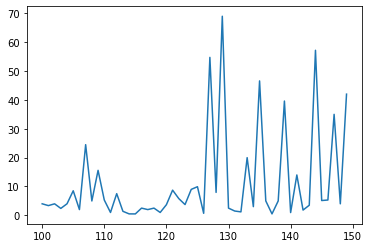

In [138]:
market["Shipping_Cost"][100:150].plot()
plt.show()

In [140]:
market.describe().to_csv("market_des.csv")

In [141]:
market.describe().to_excel("market_describe.xlsx")

# Cleaning data in Python 
![download.png](download.png)

* NaN : not a number -- special floating-point value
* Working with duplicates and missing values
    * isnull()
    * notnull()
    * dropna()
    * fillna()
    * replace()
* Which values should be replaced with missing values based on data identifying and eliminating outliers

* Dropping duplicate data



#### Identifying and Eliminating Outliers
* Outliers are observations that are significantly different from other data points
* Outliers can adversely affect the training process of a machine learning algorithm, resulting in a loss of accuracy.
* Need to use the mathematical formula and retrieve the outlier data.

     **interquartile range(IQR) = Q3(quantile(0.75)) − Q1(quantile(0.25))**
     ![boxplot](boxplot.png)

# Indentify missing data

In [145]:
titanic = pd.read_csv("https://raw.githubusercontent.com/APSSDC-Data-Analysis/Data-Analysis-batch8/main/Datasets/titanic.csv")
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [147]:
titanic.shape

(891, 11)

In [146]:
titanic.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

In [148]:
titanic.notnull().sum()

survived    891
pclass      891
name        891
sex         891
age         714
sibsp       891
parch       891
ticket      891
fare        891
cabin       204
embarked    889
dtype: int64

In [150]:
titanic["age"].isnull().sum()

177

In [152]:
# filling missing values with costant
titanic["age"].fillna(10)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    10.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [156]:
titanic["age"].fillna(method = "ffill")  # replaced forword one value ffill/ pad

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    19.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [155]:
titanic["age"].fillna(method = "bfill") # back word one value
# fillna --- it replcae only NaN values by given values 

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    26.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [158]:
titanic.replace( to_replace = 26 , value = 100)


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,100.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,100.0,0,0,111369,30.0000,C148,C


In [160]:
titanic_dummy = titanic.dropna()  # it drops record if any one missing value present
titanic_dummy.shape  # 

(183, 11)

In [161]:
titanic_dummy.isnull().sum()

survived    0
pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
cabin       0
embarked    0
dtype: int64

In [163]:
titanic.duplicated().sum()

0

In [174]:
# Create one df
di = {
    "Name" : ["sai","Teja","Pavani","Lavanya","sai kumar"],
    "frd'Name" : ["Lavanya","krishna","mounika","raghava","Lavanya"],
    "Number" : [23,345,56,67,np.nan]
}
df = pd.DataFrame(di)
df

,Name,frd'Name,Number
0,sai,Lavanya,23.0
1,Teja,krishna,345.0
2,Pavani,mounika,56.0
3,Lavanya,raghava,67.0
4,sai kumar,Lavanya,NaN


In [170]:
df.duplicated()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [171]:
df.drop_duplicates()  # more memory

,Name,frd'Name,Number
0,sai,Lavanya,23
1,Teja,krishna,345
2,Pavani,mounika,56
3,Lavanya,raghava,67
4,sai kumar,Lavanya,23


In [172]:
df.drop_duplicates(subset = "frd'Name")

,Name,frd'Name,Number
0,sai,Lavanya,23
1,Teja,krishna,345
2,Pavani,mounika,56
3,Lavanya,raghava,67


In [177]:
df.dropna(axis = 0) # drops records

,Name,frd'Name,Number
0,sai,Lavanya,23.0
1,Teja,krishna,345.0
2,Pavani,mounika,56.0
3,Lavanya,raghava,67.0


In [179]:
df.dropna(axis = 1)  # drops columns

,Name,frd'Name
0,sai,Lavanya
1,Teja,krishna
2,Pavani,mounika
3,Lavanya,raghava
4,sai kumar,Lavanya


In [180]:
df.isna().sum()

Name        0
frd'Name    0
Number      1
dtype: int64